## Library and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import re

In [2]:
lvt = pd.read_csv('lvt_metric.csv')

In [3]:
non_province = ['CẢ NƯỚC', 'Đồng bằng sông Hồng', 
                'Hà Tây', 'Trung du và miền núi phía Bắc', 
                'Bắc Trung Bộ và duyên hải miền Trung',
                'Tây Nguyên', 'Đông Nam Bộ', 'Đồng bằng sông Cửu Long']              
non_province_preprocessed = ['ca nuoc',
            'dong bang song hong',
            'ha tay',
            'trung du va mien nui phia bac',
            'bac trung bo va duyen hai mien trung',
            'tay nguyen',
            'dong nam bo',
            'dong bang song cuu long']

            
cluster_province = {
    'DBSH': ["Hà Nội", "Vĩnh Phúc","Bắc Ninh","Quảng Ninh","Hải Dương","Hải Phòng","Hưng Yên","Thái Bình","Hà Nam","Nam Định","Ninh Bình"],
    'TDMNPB': ["Hà Giang","Cao Bằng","Bắc Kạn","Tuyên Quang","Lào Cai","Yên Bái","Thái Nguyên","Lạng Sơn","Bắc Giang","Phú Thọ","Điện Biên","Lai Châu","Sơn La","Hòa Bình"],
    'BTBDHMT': ["Thanh Hóa", "Nghệ An", "Hà Tĩnh", "Quảng Bình", "Quảng Trị", "Thừa Thiên - Huế", "Đà Nẵng", "Quảng Nam", "Quảng Ngãi", "Bình Định", "Phú Yên", "Khánh Hòa", "Ninh Thuận", "Bình Thuận"],
    'TN': ["Kon Tum","Gia Lai","Đắk Lắk","Đắk Nông","Lâm Đồng"],
    'DNB': ["Bình Phước","Tây Ninh","Bình Dương","Đồng Nai","Bà Rịa - Vũng Tàu","TP. Hồ Chí Minh"],
    'DBSCL': ["Long An","Tiền Giang","Bến Tre","Trà Vinh","Vĩnh Long","Đồng Tháp","An Giang","Kiên Giang","Cần Thơ","Hậu Giang","Sóc Trăng","Bạc Liêu","Cà Mau"]
}
cluster_province_preprocessed = {
        'DBSH': ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong','hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh'],
        'TDMNPB': ['ha giang','cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son','bac giang','phu tho','dien bien','lai chau','son la','hoa binh'],
        'BTBDHMT': ['thanh hoa','nghe an','ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai','binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan'],
        'TN': ['kon tum', 'gia lai', 'dak lak', 'dak nong', 'lam dong'],
        'DNB': ['binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau','tp.ho chi minh'],
        'DBSCL': ['long an','tien giang','ben tre','tra vinh','vinh long','dong thap','an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']
        }


vung_mien_name = ['Đồng bằng sông Hồng', 
             'Trung du và miền núi phía Bắc', 
             'Bắc Trung Bộ và duyên hải miền Trung',
             'Tây Nguyên', 'Đông Nam Bộ', 'Đồng bằng sông Cửu Long']
vung_mien_name_preprocessed = ['dong bang song hong',
            'trung du va mien nui phia bac',
            'bac trung bo va duyen hai mien trung',
            'tay nguyen',
            'dong nam bo',
            'dong bang song cuu long']


province_name = ['Hà Nội', 'Vĩnh Phúc', 'Bắc Ninh', 'Quảng Ninh', 'Hải Dương',
       'Hải Phòng', 'Hưng Yên', 'Thái Bình', 'Hà Nam', 'Nam Định',
       'Ninh Bình', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Tuyên Quang',
       'Lào Cai', 'Yên Bái', 'Thái Nguyên', 'Lạng Sơn', 'Bắc Giang',
       'Phú Thọ', 'Điện Biên', 'Lai Châu', 'Sơn La', 'Hòa Bình',
       'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị',
       'Thừa Thiên Huế', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi',
       'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận',
       'Kon Tum', 'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng',
       'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai',
       'Bà Rịa - Vũng Tàu', 'TP.Hồ Chí Minh', 'Long An', 'Tiền Giang',
       'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp', 'An Giang',
       'Kiên Giang', 'Cần Thơ', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu',
       'Cà Mau']
province_name_preprocessed = ['ha noi','vinh phuc','bac ninh','quang ninh','hai duong',
        'hai phong','hung yen','thai binh','ha nam','nam dinh','ninh binh','ha giang',
        'cao bang','bac kan','tuyen quang','lao cai','yen bai','thai nguyen','lang son',
        'bac giang','phu tho','dien bien','lai chau','son la','hoa binh','thanh hoa','nghe an',
        'ha tinh','quang binh','quang tri','thua thien hue','da nang','quang nam','quang ngai',
        'binh dinh','phu yen','khanh hoa','ninh thuan','binh thuan','kon tum','gia lai','dak lak',
        'dak nong','lam dong','binh phuoc','tay ninh','binh duong','dong nai','ba ria vung tau',
        'tp.ho chi minh','long an','tien giang','ben tre','tra vinh','vinh long','dong thap',
        'an giang','kien giang','can tho','hau giang','soc trang','bac lieu','ca mau']


years = lvt.columns[3:]

In [4]:
# def preprocess_cluster_province(cluster_province):
#     processed_clusters = {}
#     for cluster, provinces in cluster_province.items():
#         processed_provinces = preprocess_list(provinces)
#         processed_clusters[cluster] = processed_provinces
#     return processed_clusters
# preprocess_cluster_province(cluster_province)

In [4]:
def clean_province(province):
    cleaned = re.sub(r'[-\s]+', ' ', province).strip()
    return cleaned

In [5]:
def preprocess_list(lst):
    lst = [unidecode(i).lower().strip() for i in lst]
    lst = [clean_province(i) for i in lst]
    return lst

In [6]:
## find cluster with province
def find_cluster(province):
    for key, value in cluster_province_preprocessed.items():
        if province in value:
            return key

In [7]:
# def preprocess_df(df, feature, vung_mien_name, province_name):
#     df = df[df.Main_Feature == feature]
#     lst_vm_p = vung_mien_name + province_name
#     lst_vm_p = [unidecode(i).lower().strip() for i in lst_vm_p]
#     lst_vm_p = [clean_province(i) for i in lst_vm_p]
#     df['Province'] = df['Province'].apply(lambda x: clean_province(x))
#     df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
#     df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
#     df = df[df.Province.isin(lst_vm_p)]
#     years = df.columns[3:]
#     # df[years] = df[years].replace(',', '.', regex=True)
#     df.loc[:, years] = df[years].apply(pd.to_numeric, errors='coerce', downcast='float')
#     df.drop_duplicates(inplace=True)
#     return df

def preprocess_df(df, feature, vung_mien_name, province_name):
    df = df[df.Main_Feature == feature]
    lst_vm_p = vung_mien_name + province_name
    lst_vm_p = [unidecode(i).lower().strip() for i in lst_vm_p]
    lst_vm_p = [clean_province(i) for i in lst_vm_p]
    df['Province'] = df['Province'].apply(lambda x: clean_province(x))
    df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
    df['Province'] = df['Province'].str.replace('tp. ho chi minh', 'tp.ho chi minh')
    df = df[df.Province.isin(lst_vm_p)]
    years = df.columns[3:]
    
    for year in years:
        df[year] = df[year].astype(str)
        if df[year].str.contains(',').any() and not df[year].str.contains('\.').any():
            # only contains ','
            df[year] = df[year].str.replace(',', '.', regex=True)
        elif df[year].str.contains(',').any() and df[year].str.contains('\.').any():
            # contains both ',' and '.'
            df[year] = df[year].str.replace('\.', '', regex=True).str.replace(',', '.', regex=True)
        df[year] = pd.to_numeric(df[year], errors='coerce')
    # df.loc[:, years] = df[years].apply(pd.to_numeric, errors='coerce')
    df.drop_duplicates(inplace=True)
    return df


def line_plot(df, sub_feature, years):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        province = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        province = df[df.Sub_Feature == sub_feature].Province
    plt.plot(province, value)
    ## rorate xlabel
    plt.legend(years)
    plt.xticks(rotation=90)


def describe_(df, sub_feature, years):
    col = years + ['Province']
    if sub_feature is None:
        return df[col].describe()
    else:
        return df[df.Sub_Feature == sub_feature][col].describe()


def province_with_max_value(df, sub_feature, years):
    if sub_feature is None:
        ids = df[years].idxmax()
    else:
        ids = df[df.Sub_Feature == sub_feature][years].idxmax()
    province = df.Province[ids]
    cluster = [find_cluster(p) for p in province]
    ## print year with province
    for i in range(len(years)):
        print(years[i], province.iloc[i], cluster[i])
    # return province


def top_k_province_best_sub_feature(df, sub_feature, years, topk=5):
    for year in years:
        i = 0
        if sub_feature is None:
            top_k = df[year].sort_values(ascending=False).head(topk)
        else:
            top_k = df[df.Sub_Feature == sub_feature][year].sort_values(ascending=False).head(topk)
        provinces = df.loc[top_k.index, 'Province']
        cluster = [find_cluster(p) for p in provinces]
        print(f"{year}:")
        for province, value in zip(provinces, top_k):
            print(f"{province}, {cluster[i]}: {value}")
            i +=1
        print('-'*30)


In [8]:
def stacked_bar_plot(df, sub_feature, years, title):
    plt.figure(figsize=(20, 10))
    if sub_feature is None:
        value = df[years]
        value.index = df.Province
    else:
        value = df[df.Sub_Feature == sub_feature][years]
        value.index = df[df.Sub_Feature == sub_feature].Province
    value.plot(kind='bar', stacked=True, figsize=(20,8))
    ## rorate xlabel
    plt.xlabel("")
    plt.title(title)
    plt.xticks(rotation=90);

In [9]:
def average_describe(df, is_Province, sub_feature, years):
    if is_Province:
        df = df[df.Province.isin(province_name_preprocessed)]
    else:
        df = df[df.Province.isin(vung_mien_name_preprocessed)]
    if sub_feature is not None:
        min_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmin()
        max_value = df[df.Sub_Feature == sub_feature][years].mean(axis=1).idxmax()
        print(df[df.Sub_Feature == sub_feature][years].mean(axis=1).describe())
        print(df.loc[min_value].Province, df.loc[max_value].Province)
    else:
        min_value = df[years].mean(axis=1).idxmin()
        max_value = df[years].mean(axis=1).idxmax()
        print(df[years].mean(axis=1).describe())
        print(df.loc[min_value].Province, " | ", df.loc[max_value].Province)

In [10]:
def pannel_bar_plot(df, show_value, sub_feature, years, title):
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('husl', len(years))
    one_year = True if len(years) == 1 else False
    for i, year in enumerate(years):
        if sub_feature is None:
            value = df[year]
            value.index = df.Province
            
        else:
            value = df[df.Sub_Feature == sub_feature][year]
            value.index = df[df.Sub_Feature == sub_feature].Province

        value = value[::-1]
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)

            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            # if i != 0:  # Add vertical line to separate years
            #     axs[i].axvline(x=0, color='k', linestyle='-')
            # Remove spines
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)

            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')

    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [11]:
def report(df, sub_feature, years, title):
    pannel_bar_plot(df[df.Province.isin(province_name_preprocessed)], False, sub_feature, years, title)
    pannel_bar_plot(df[df.Province.isin(vung_mien_name_preprocessed)], True, sub_feature, years, title)
    print(describe_(df[df.Province.isin(province_name_preprocessed)], sub_feature, years))
    print(describe_(df[df.Province.isin(vung_mien_name_preprocessed)], sub_feature, years))
    # province_with_max_value(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    top_k_province_best_sub_feature(df[df.Province.isin(province_name_preprocessed)], sub_feature, years)
    average_describe(df, True, sub_feature, years)
    average_describe(df, False, sub_feature, years)

In [12]:
import math
def box_plot(dfs, years_list):
    n = len(dfs)
    ncols = int(math.sqrt(n))
    nrows = n // ncols + (n % ncols > 0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(20, 20))
    axs = axs.flatten()  # to handle the case when n is not a perfect square
    sns.set_style('whitegrid')
    
    for i, df in enumerate(dfs):
        dfs = [df[df.Province.isin(province_name_preprocessed)] for df in dfs]
        #print(max([df.Province.nunique() for df in dfs]))
        valid_years = [year for year in years_list if year in df.columns]
        if df.Sub_Feature.nunique() == 0:
            value = df[valid_years]
            sns.boxplot(data=value, ax=axs[i], orient='h')
            sns.stripplot(data=value, ax=axs[i], orient='h')
            sns.despine(offset=10, trim=True, ax=axs[i]);
        else:
            col = ['Sub_Feature']
            col.extend(valid_years)
            value = df[col]
            value = pd.melt(value, id_vars='Sub_Feature', var_name='Year', value_name='Value')
            # value.Year = value.Year.astype('category')

            year_order = ['2018', '2019', '2020', '2021', 'Sơ bộ 2021', '2022', 'Sơ bộ 2022']
            sns.boxplot(x='Value', y='Year', hue='Sub_Feature', data=value, ax=axs[i], orient='h')
            
            sns.despine(offset=10, trim=True, ax=axs[i]);
        title = 'Feature_' + str(i)
        axs[i].set_title(title)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [13]:
def init_df(df, feature, vung_mien_name,province_name):
    new_df = preprocess_df(df, feature, vung_mien_name, province_name)
    print(new_df.Province.nunique())
    print(new_df.Sub_Feature.unique())
    print(new_df[years].isnull().sum())
    return new_df

In [14]:
def extract_feature(df, sub_feature, years):
    if sub_feature is not None:
        return df[(df.Province.isin(province_name_preprocessed)) & (df.Sub_Feature == sub_feature)][years].values
    else:
        return df[df.Province.isin(province_name_preprocessed)][years].values

In [15]:
years_model = ['2018', '2019', '2020', '2021']
years = ['2018', '2019', '2020', '2021', 'Sơ bộ 2021', 'Sơ bộ 2022']

In [41]:
lst_name = [df.Main_Feature.unique()[0] for df in lst_df]

In [44]:
import pickle
lst_df = [di_cu,nsld,tvl,tnbqdn,llld,ttbqdn_v1,tlld_15t,tlhn,tltn,gini,tlld_ct,tnbqdn_thapnhat,tnbq_motld,tnbqdn_caonhat,ld_cvl]
with open('lvt_dfs.pkl', 'wb') as f:
    pickle.dump(lst_df, f)

## EDA

In [16]:
features = lvt.Main_Feature.unique()
print(len(features))
# features

16


In [49]:
# for year in lvt.columns[3:]:
#     non_zero = np.count_nonzero(lvt.groupby("Main_Feature")[year].count().values)
#     print(year, "|Tổng số thuộc tính có:", non_zero)

### Tỷ suất nhập cư, xuất cư và di cư thuần phân theo địa phương chia theo Tỉnh-Thành phố, Tỷ suất và Năm

In [17]:
di_cu = init_df(lvt, features[0], vung_mien_name, province_name)

69
['Tỷ suất xuất cư' nan]
2018            0
2019           69
2020           69
2021           69
Sơ bộ 2021    138
Sơ bộ 2022     69
dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

#### Xử lý Province

#### Xử lý Sub_Feature

In [18]:
## rename nan in Sub_Feature with 'Tỷ suất nhập cư'
di_cu.loc[di_cu.Sub_Feature != 'Tỷ suất xuất cư', 'Sub_Feature'] = di_cu.loc[di_cu.Sub_Feature != 'Tỷ suất xuất cư', 'Sub_Feature'].replace(np.nan, 'Tỷ suất nhập cư')

In [19]:
di_cu.Sub_Feature.unique()

array(['Tỷ suất xuất cư', 'Tỷ suất nhập cư'], dtype=object)

In [196]:
# di_cu.loc[:, years] = di_cu[years].apply(pd.to_numeric, errors='coerce')

C:\Users\acer\AppData\Local\Temp\ipykernel_13384\810845407.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  di_cu.loc[:, years] = di_cu[years].apply(pd.to_numeric, errors='coerce')


In [20]:
di_cu[years].isnull().sum()

2018            0
2019           69
2020           69
2021           69
Sơ bộ 2021    138
Sơ bộ 2022     69
dtype: int64

#### Tỷ suất nhập cư

In [23]:
di_cu_province = di_cu[di_cu.Province.isin(province_name_preprocessed)]

In [16]:
di_cu_province[di_cu_province.Sub_Feature == 'Tỷ suất nhập cư'][['2017', '2018', '2019', '2020', '2021']].values.shape

(63, 5)

In [21]:
sc_0 = extract_feature(di_cu, 'Tỷ suất nhập cư', years)
sc_0_1 = extract_feature(di_cu, 'Tỷ suất xuất cư', years)

In [16]:
sc_0 = di_cu_province[di_cu_province.Sub_Feature == 'Tỷ suất nhập cư'][['2017', '2018', '2019', '2020', '2021']].mean(axis=1).tolist()
sc_0_1 = di_cu_province[di_cu_province.Sub_Feature == 'Tỷ suất xuất cư'][['2014','2015', '2016', '2017', '2018']].mean(axis=1).tolist()

In [27]:
sc_0_model = extract_feature(di_cu,'Tỷ suất nhập cư', years_model)
sc_0_model.shape

(63, 4)

In [28]:
sc_0_1_model = extract_feature(di_cu, 'Tỷ suất xuất cư', years_model)
sc_0_1_model.shape

(63, 4)

In [18]:
di_cu[di_cu.Sub_Feature == 'Tỷ suất nhập cư'].isna().sum()[3:]

2002          69
2003          69
2004          69
2005           0
2006          69
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
2022          69
Sơ bộ 2022     0
dtype: int64

In [18]:
di_cu_province = di_cu[di_cu.Province.isin(province_name_preprocessed)]
di_cu_vung_mien = di_cu[di_cu.Province.isin(vung_mien_name_preprocessed)]

In [19]:
average_describe(di_cu_province, 'Tỷ suất nhập cư', ['2017', '2018', '2019', '2020', '2021'])

count    63.000000
mean      3.867714
std       6.643449
min       0.422000
25%       1.437000
50%       1.806000
75%       3.102000
max      45.178000
dtype: float64
son la binh duong


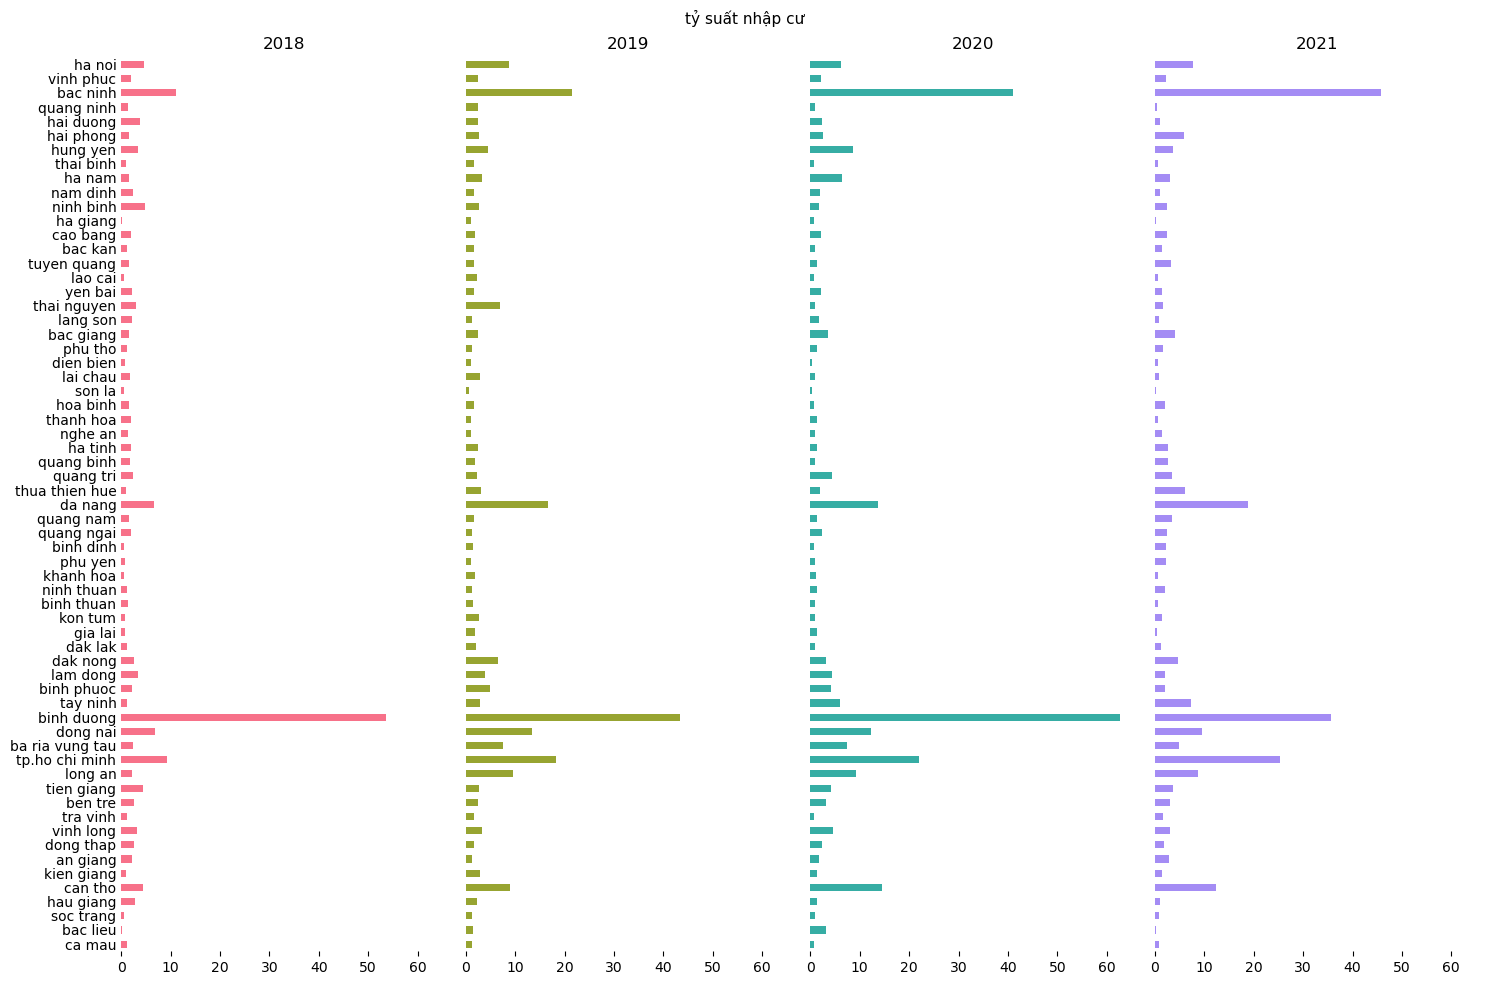

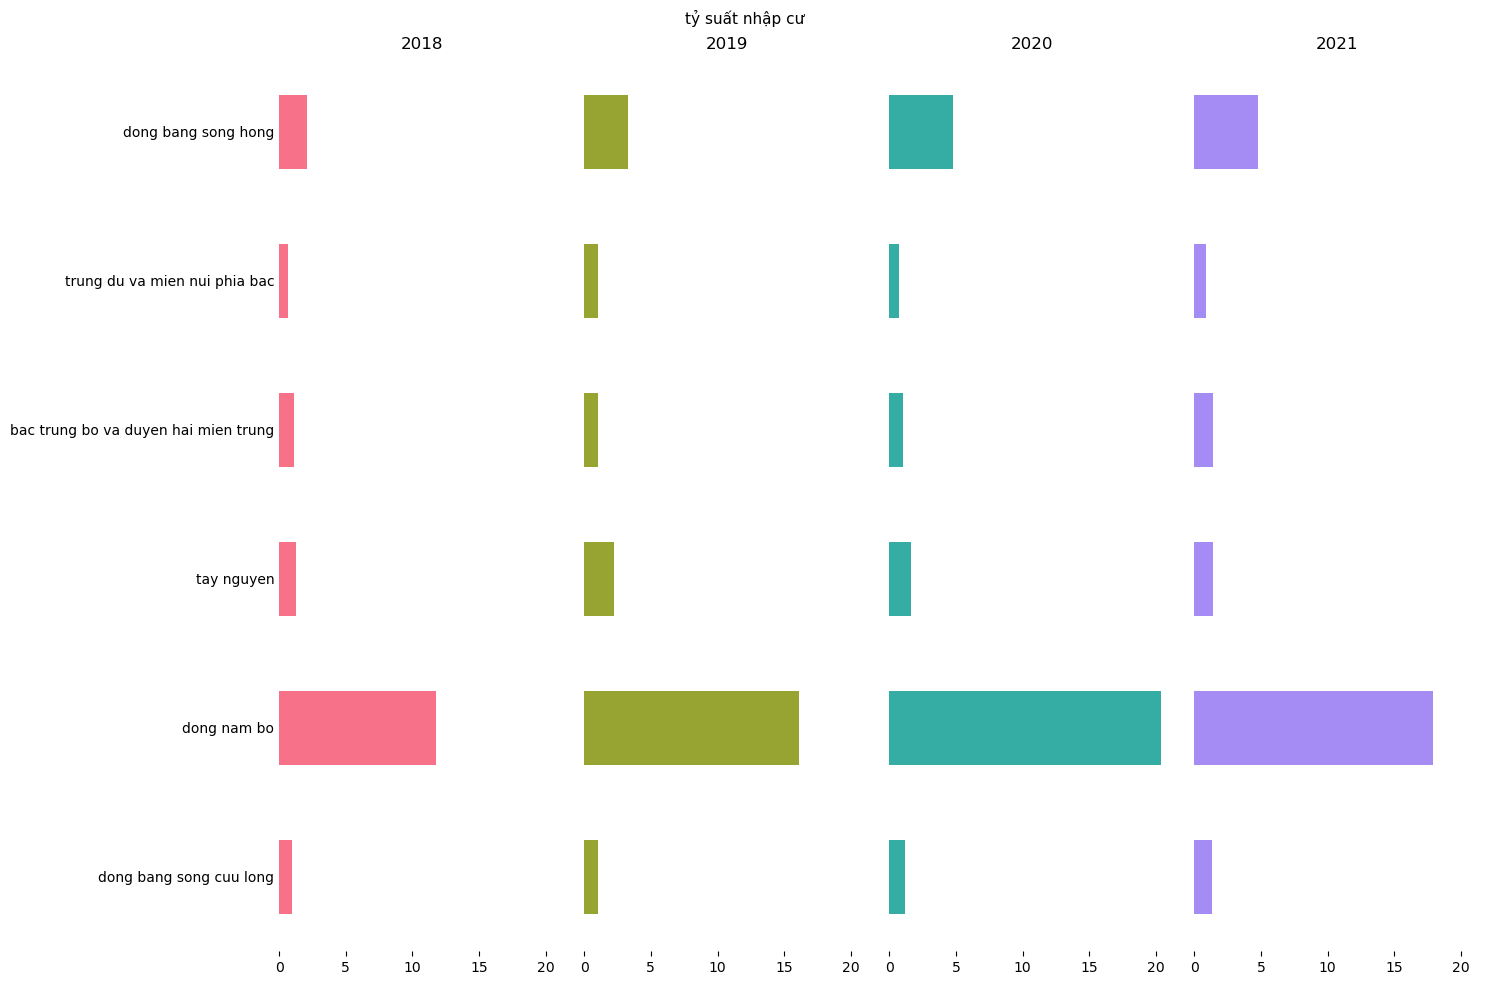

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean    3.085714   4.263492   4.757937   4.474286
std     6.769663   6.531840   9.635186   7.890892
min     0.100000   0.700000   0.240000   0.270000
25%     1.100000   1.500000   1.010000   1.025000
50%     1.800000   2.300000   1.800000   2.070000
75%     2.600000   3.200000   4.200000   3.560000
max    53.600000  43.400000  62.660000  45.660000
            2018       2019       2020       2021
count   6.000000   6.000000   6.000000   6.000000
mean    3.000000   4.100000   4.950000   4.616667
std     4.336819   5.951134   7.715893   6.663157
min     0.700000   1.000000   0.700000   0.900000
25%     1.025000   1.000000   1.050000   1.325000
50%     1.200000   1.600000   1.400000   1.400000
75%     1.900000   3.025000   4.000000   3.950000
max    11.800000  16.100000  20.400000  17.900000
2018:
binh duong, DNB: 53.6
bac ninh, DBSH: 11.1
tp.ho chi minh, DNB: 9.3
dong nai, DNB: 6.8
da nang

In [27]:
report(di_cu, 'Tỷ suất nhập cư', ['2018', '2019', '2020', '2021'], title='tỷ suất nhập cư')

#### Tỷ suất xuất cư

In [210]:
di_cu[di_cu.Sub_Feature == 'Tỷ suất xuất cư'].isna().sum()[3:]

2002          69
2003          69
2004          69
2005           0
2006          69
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019          69
2020          69
2021          69
Sơ bộ 2021    69
2022          69
Sơ bộ 2022    69
dtype: int64

<Figure size 2000x1000 with 0 Axes>

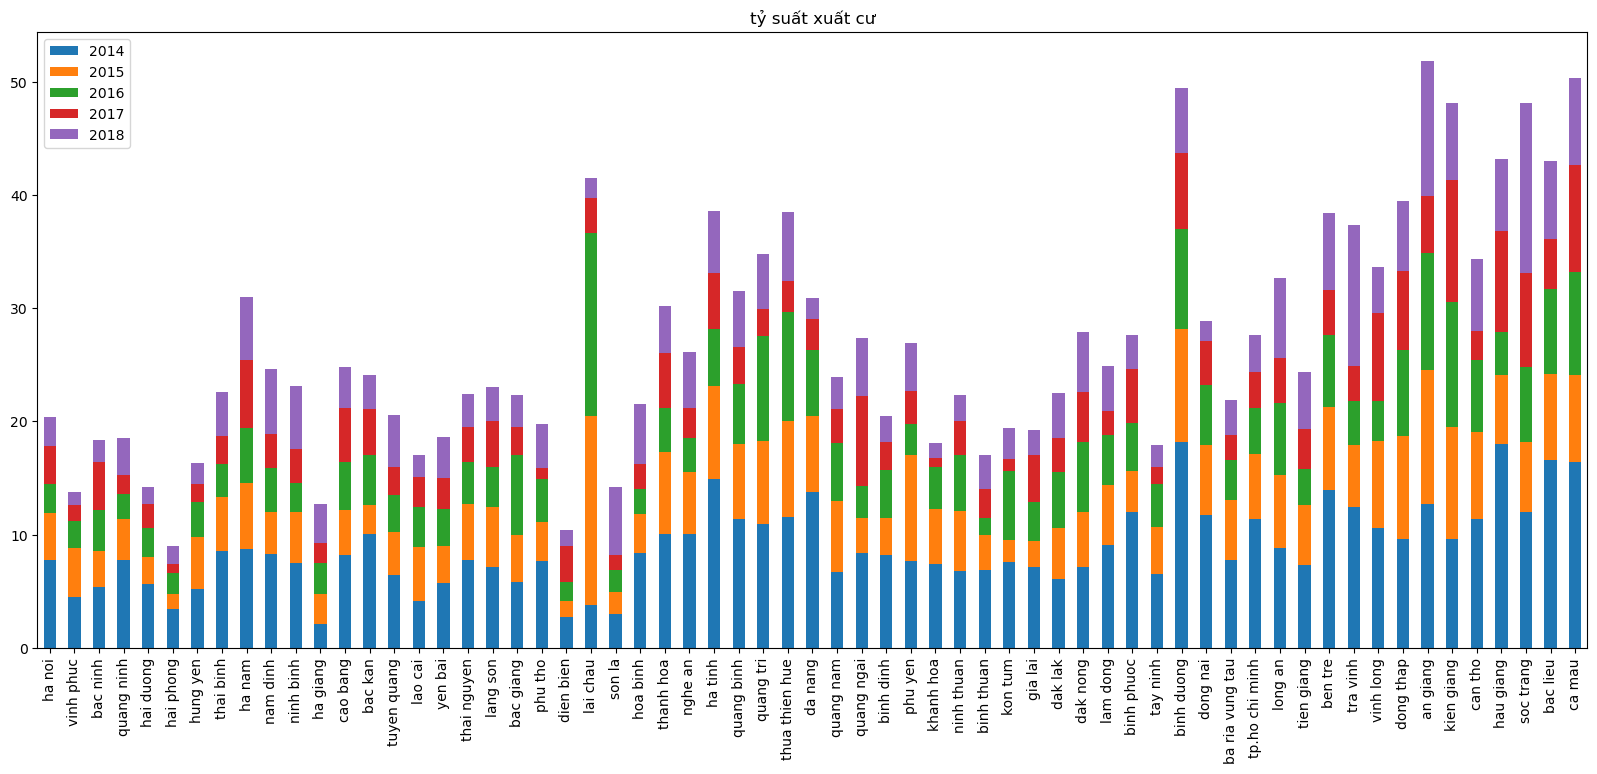

In [88]:
stacked_bar_plot(di_cu_province, 'Tỷ suất xuất cư', ['2014','2015', '2016', '2017', '2018'], title='tỷ suất xuất cư')

<Figure size 2000x1000 with 0 Axes>

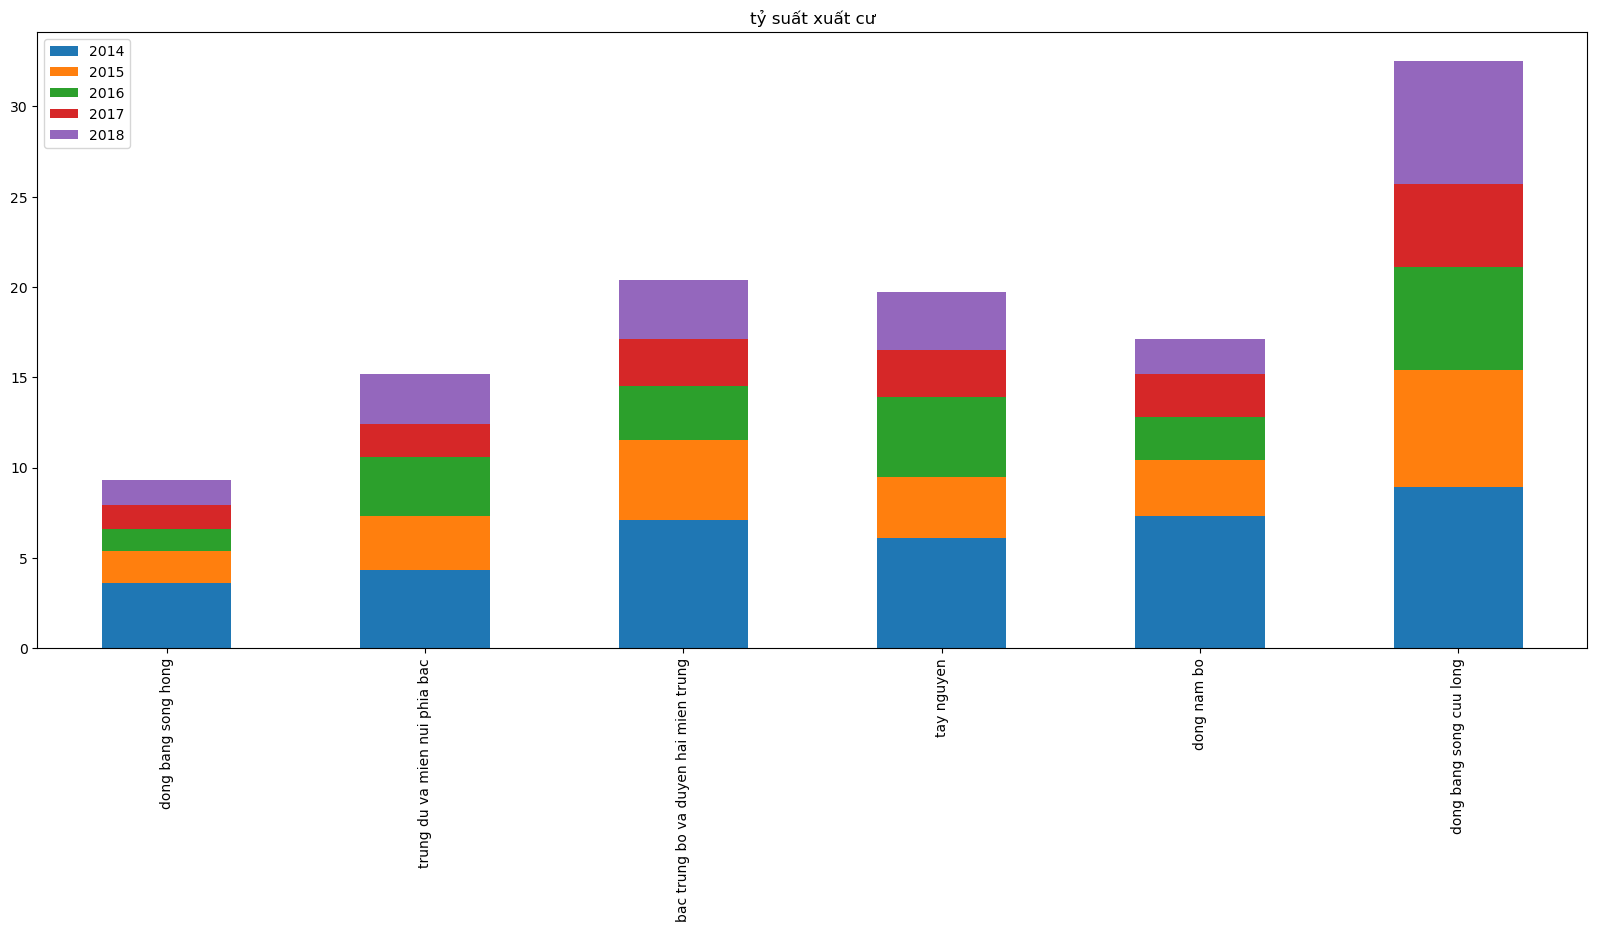

In [89]:
stacked_bar_plot(di_cu_vung_mien, 'Tỷ suất xuất cư', ['2014','2015', '2016', '2017', '2018'], title='tỷ suất xuất cư')

In [213]:
describe_(di_cu_province, 'Tỷ suất xuất cư', ['2014','2015', '2016', '2017', '2018'])

,2014,2015,2016,2017,2018
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,8.801587,5.433333,4.784127,3.657143,4.361905
std,3.585522,2.668756,2.634339,2.153595,2.628469
min,2.100000,1.400000,1.500000,0.800000,1.200000
25%,6.750000,3.600000,3.150000,2.500000,2.650000
50%,8.200000,4.900000,3.900000,3.000000,3.900000
75%,11.150000,6.650000,5.950000,4.300000,5.550000
max,18.200000,16.700000,16.100000,10.800000,15.000000


In [214]:
describe_(di_cu_vung_mien, 'Tỷ suất xuất cư', ['2014','2015', '2016', '2017', '2018'])

,2014,2015,2016,2017,2018
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,6.216667,3.700000,3.333333,2.550000,3.233333
std,1.984355,1.604992,1.566738,1.127386,1.900175
min,3.600000,1.800000,1.200000,1.300000,1.400000
25%,4.750000,3.025000,2.550000,1.950000,2.125000
50%,6.600000,3.250000,3.150000,2.500000,3.000000
75%,7.250000,4.150000,4.125000,2.600000,3.275000
max,8.900000,6.500000,5.700000,4.600000,6.800000


In [215]:
province_with_max_value(di_cu_province, 'Tỷ suất xuất cư', ['2014','2015', '2016', '2017', '2018'])

2014 Bình Dương DNB
2015 Lai Châu TDMNPB
2016 Lai Châu TDMNPB
2017 Kiên Giang DBSCL
2018 Sóc Trăng DBSCL


In [178]:
top_k_province_best_sub_feature(di_cu_v1, 'Tỷ suất xuất cư', ['2014','2015', '2016', '2017', '2018'], topk=10)

2014:
Bình Dương, DNB: 18.2
Hậu Giang, DBSCL: 18.0
Bạc Liêu, DBSCL: 16.6
Cà Mau, DBSCL: 16.4
Hà Tĩnh, BTBDHMT: 14.9
Bến Tre, DBSCL: 13.9
Đà Nẵng, BTBDHMT: 13.8
An Giang, DBSCL: 12.7
Trà Vinh, DBSCL: 12.4
Bình Phước, DNB: 12.0
------------------------------
2015:
Lai Châu, TDMNPB: 16.7
An Giang, DBSCL: 11.8
Bình Dương, DNB: 10.0
Kiên Giang, DBSCL: 9.9
Phú Yên, BTBDHMT: 9.3
Đồng Tháp, DBSCL: 9.1
Thừa Thiên - Huế, BTBDHMT: 8.4
Hà Tĩnh, BTBDHMT: 8.2
Cà Mau, DBSCL: 7.7
Cần Thơ, DBSCL: 7.7
------------------------------
2016:
Lai Châu, TDMNPB: 16.1
Kiên Giang, DBSCL: 11.0
An Giang, DBSCL: 10.4
Thừa Thiên - Huế, BTBDHMT: 9.7
Quảng Trị, BTBDHMT: 9.2
Cà Mau, DBSCL: 9.1
Bình Dương, DNB: 8.8
Đồng Tháp, DBSCL: 7.6
Bạc Liêu, DBSCL: 7.5
Bắc Giang, TDMNPB: 7.0
------------------------------
2017:
Kiên Giang, DBSCL: 10.8
Cà Mau, DBSCL: 9.4
Hậu Giang, DBSCL: 8.9
Sóc Trăng, DBSCL: 8.3
Quảng Ngãi, BTBDHMT: 7.9
Vĩnh Long, DBSCL: 7.8
Đồng Tháp, DBSCL: 7.0
Bình Dương, DNB: 6.7
Hà Nam, DBSH: 6.0
An Giang, DB

### Năng suất lao động phân theo địa phương. Đơn vị tính Triệu đồngngười

In [24]:
nsld = preprocess_df(lvt.copy(), features[1], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [25]:
nsld[years].isnull().sum()

2018          69
2019          69
2020          69
2021          69
Sơ bộ 2021     0
Sơ bộ 2022     0
dtype: int64

In [26]:
sc_1 = extract_feature(nsld, None, years)
sc_1.shape

(63, 6)

In [19]:
nsld_province = nsld[nsld.Province.isin(province_name_preprocessed)]
nsld_vung_mien = nsld[nsld.Province.isin(vung_mien_name_preprocessed)]

In [20]:
sc_1 = nsld_province[['Sơ bộ 2021', 'Sơ bộ 2022']].mean(axis=1).tolist()

In [31]:
sc_1_model = extract_feature(nsld, None, years_model)
sc_1_model.shape

(63, 4)

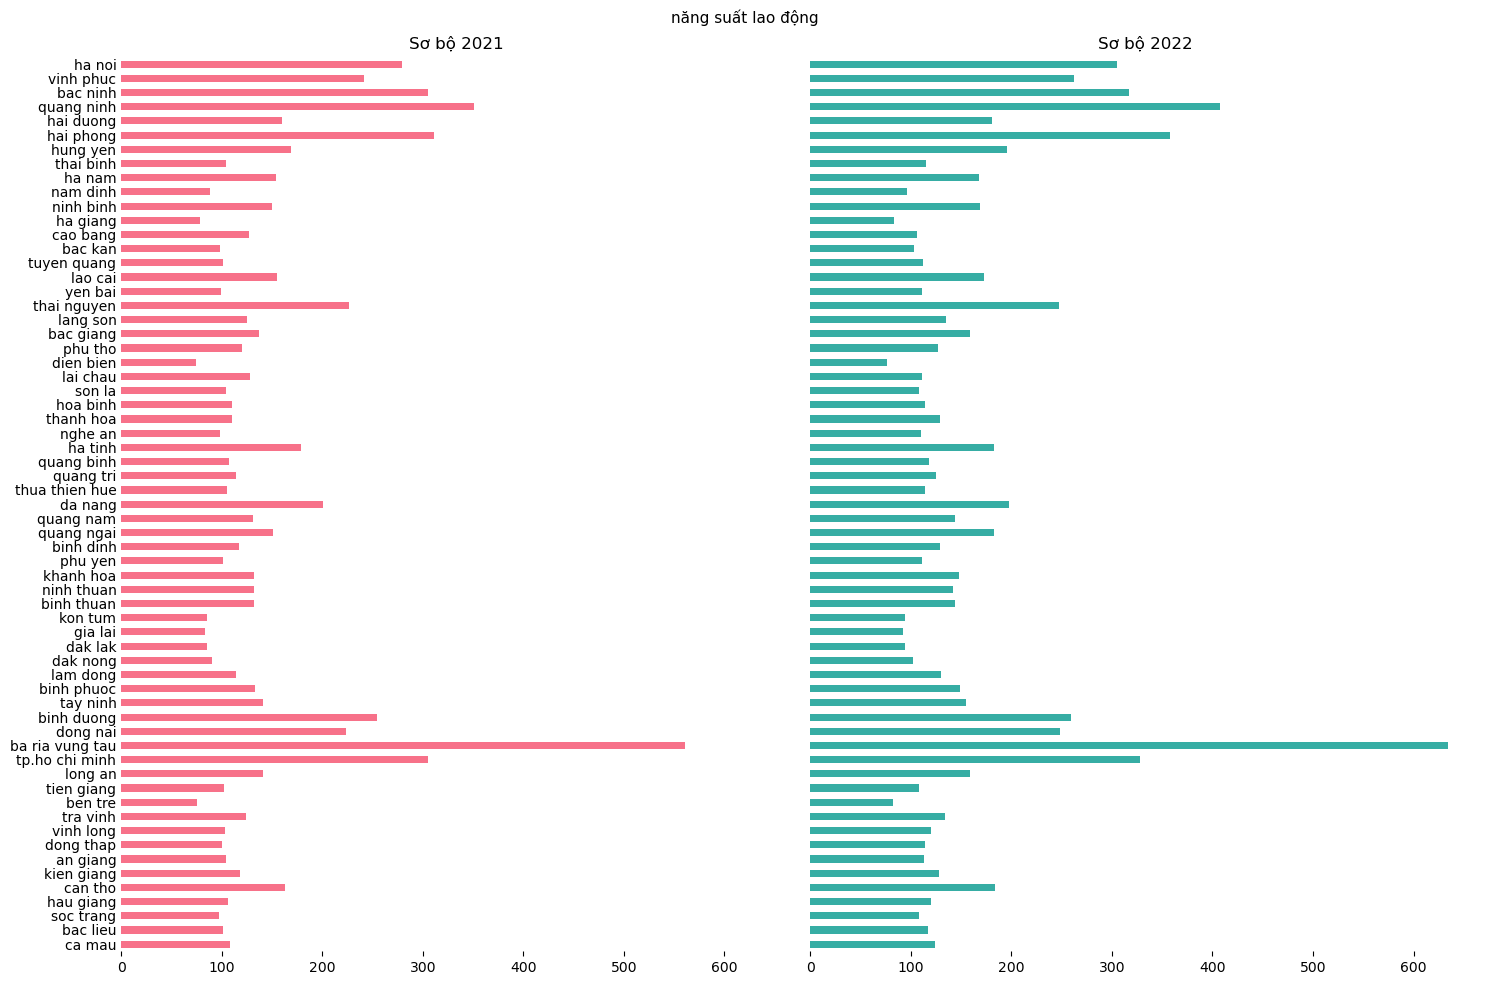

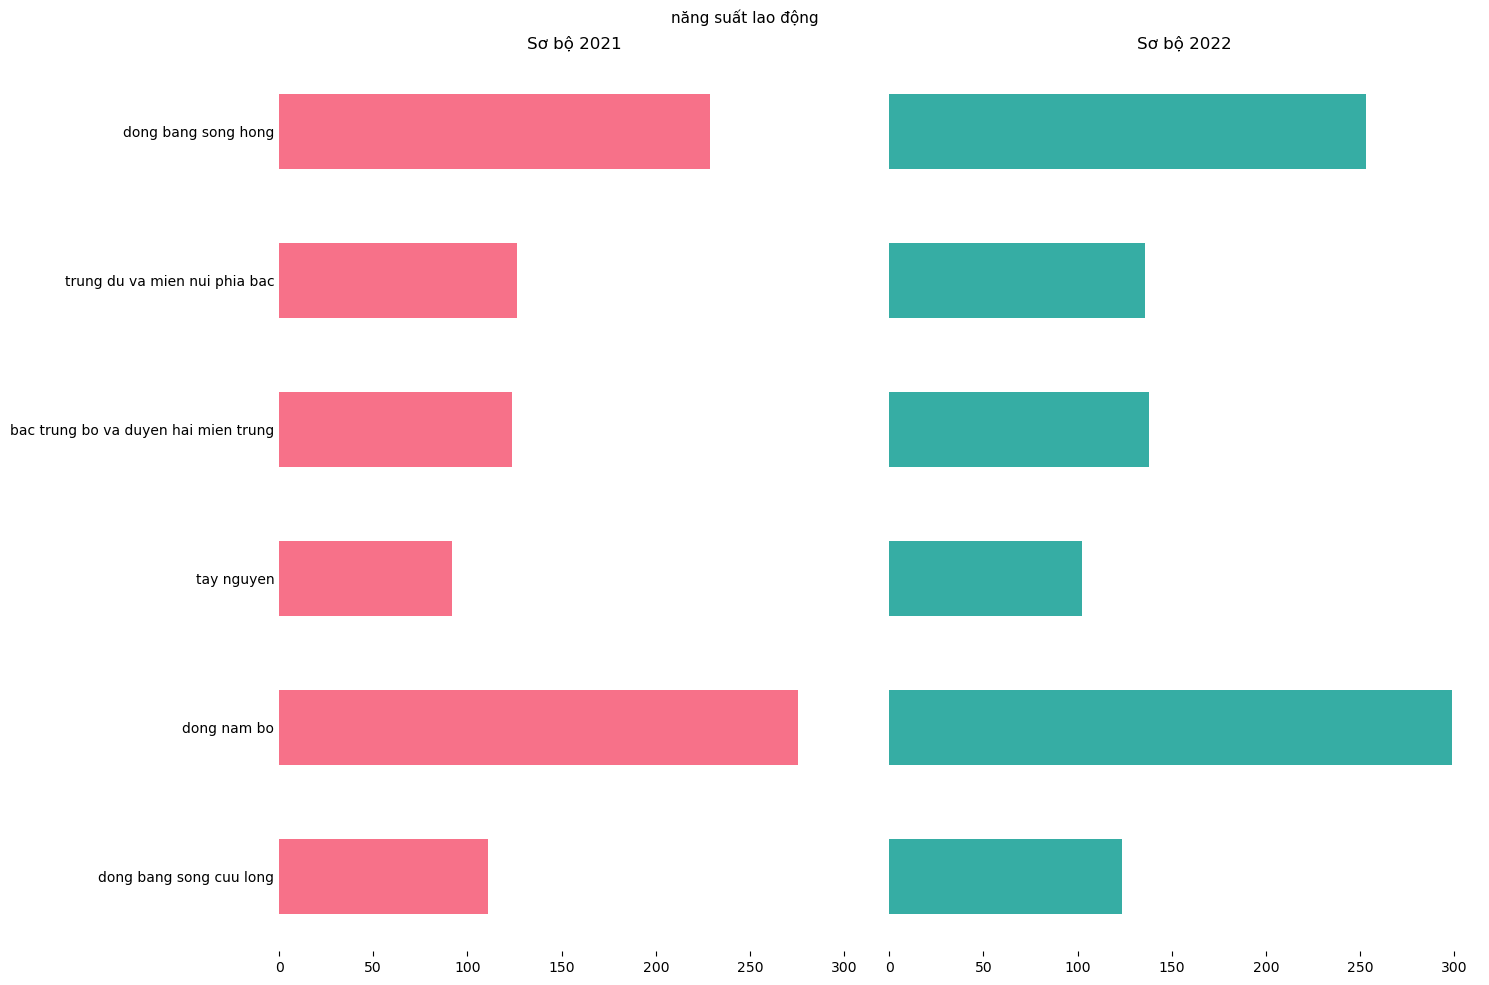

       Sơ bộ 2021  Sơ bộ 2022
count   63.000000   63.000000
mean   148.066190  162.146190
std     82.615304   92.690148
min     73.880000   76.380000
25%    101.530000  111.325000
50%    120.290000  128.770000
75%    154.355000  176.885000
max    561.180000  634.390000
       Sơ bộ 2021  Sơ bộ 2022
count    6.000000    6.000000
mean   159.518333  175.120000
std     74.208236   80.287772
min     91.800000  102.400000
25%    114.122500  126.457500
50%    125.155000  136.690000
75%    203.170000  224.075000
max    275.380000  298.690000
Sơ bộ 2021:
ba ria vung tau, DNB: 561.18
quang ninh, DBSH: 350.83
hai phong, DBSH: 311.54
tp.ho chi minh, DNB: 305.54
bac ninh, DBSH: 305.03
------------------------------
Sơ bộ 2022:
ba ria vung tau, DNB: 634.39
quang ninh, DBSH: 407.83
hai phong, DBSH: 357.59
tp.ho chi minh, DNB: 328.17
bac ninh, DBSH: 317.14
------------------------------
count     63.000000
mean     155.106190
std       87.540479
min       75.130000
25%      106.962500
50%      122.950

In [31]:
report(nsld, None, ['Sơ bộ 2021', 'Sơ bộ 2022'], title='năng suất lao động')

### Chỉ số phát triển con người hdi

In [19]:
hdi = preprocess_df(lvt.copy(), features[2], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_2520\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_2520\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_2520\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [20]:
hdi.Province.nunique()

63

In [23]:
import pickle
with open('hdi_df.pkl', 'wb') as f:
    pickle.dump(hdi, f)

In [22]:
sc_2 = hdi[['2018', '2019', '2020', '2021']].mean(axis=1).tolist()

<Figure size 2000x1000 with 0 Axes>

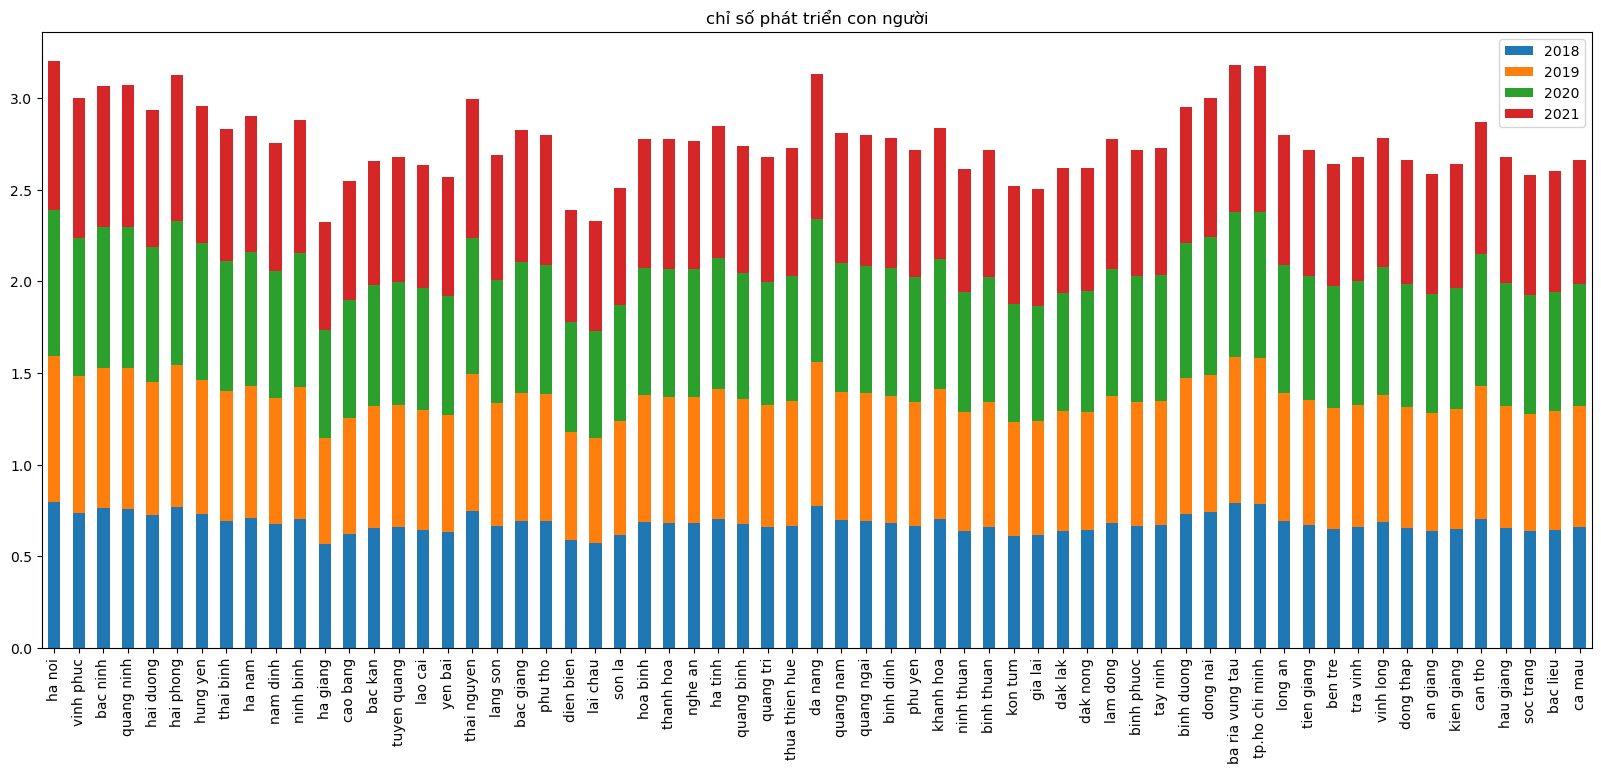

In [100]:
stacked_bar_plot(hdi, None, ['2018', '2019', '2020', '2021'], title='chỉ số phát triển con người')

In [484]:
describe_(hdi, None, ['2018', '2019', '2020', '2021'])

,2018,2019,2020,2021
count,63.000000,63.000000,63.000000,63.000000
mean,0.679714,0.688603,0.693032,0.701667
std,0.050513,0.050932,0.048181,0.047864
min,0.565000,0.576000,0.582000,0.591000
25%,0.650000,0.658000,0.663500,0.674000
50%,0.676000,0.685000,0.690000,0.697000
75%,0.703500,0.715500,0.716500,0.722500
max,0.794000,0.799000,0.799000,0.809000


In [483]:
province_with_max_value(hdi, None, ['2018', '2019', '2020', '2021'])

2018 ha noi DBSH
2019 ha noi DBSH
2020 ha noi DBSH
2021 ha noi DBSH


In [482]:
top_k_province_best_sub_feature(hdi, None, ['2018', '2019', '2020', '2021'], topk=10)

2018:
ha noi, DBSH: 0.794
ba ria vung tau, DNB: 0.789
tp.ho chi minh, DNB: 0.786
da nang, BTBDHMT: 0.773
hai phong, DBSH: 0.769
bac ninh, DBSH: 0.762
quang ninh, DBSH: 0.757
thai nguyen, TDMNPB: 0.745
dong nai, DNB: 0.742
vinh phuc, DBSH: 0.736
------------------------------
2019:
ha noi, DBSH: 0.799
ba ria vung tau, DNB: 0.799
tp.ho chi minh, DNB: 0.798
da nang, BTBDHMT: 0.788
hai phong, DBSH: 0.777
quang ninh, DBSH: 0.769
bac ninh, DBSH: 0.764
dong nai, DNB: 0.749
vinh phuc, DBSH: 0.749
thai nguyen, TDMNPB: 0.748
------------------------------
2020:
ha noi, DBSH: 0.799
tp.ho chi minh, DNB: 0.795
ba ria vung tau, DNB: 0.793
hai phong, DBSH: 0.782
da nang, BTBDHMT: 0.779
quang ninh, DBSH: 0.769
bac ninh, DBSH: 0.768
dong nai, DNB: 0.753
vinh phuc, DBSH: 0.751
hung yen, DBSH: 0.745
------------------------------
2021:
ha noi, DBSH: 0.809
ba ria vung tau, DNB: 0.799
hai phong, DBSH: 0.797
tp.ho chi minh, DNB: 0.797
da nang, BTBDHMT: 0.79
quang ninh, DBSH: 0.778
bac ninh, DBSH: 0.771
vinh

### Tỷ lệ thiếu việc làm trong độ tuổi lao động phân theo địa phương

In [28]:
tvl = preprocess_df(lvt.copy(), features[3], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [29]:
tvl.Sub_Feature.unique()

array([nan], dtype=object)

In [34]:
sc_3 = extract_feature(tvl, None, years)
sc_3.shape

(63, 6)

In [32]:
sc_3 = tvl[tvl.Province.isin(province_name_preprocessed)]['2021'].tolist()

In [33]:
sc_3_model = extract_feature(tvl, None, years_model)
sc_3_model.shape

(63, 4)

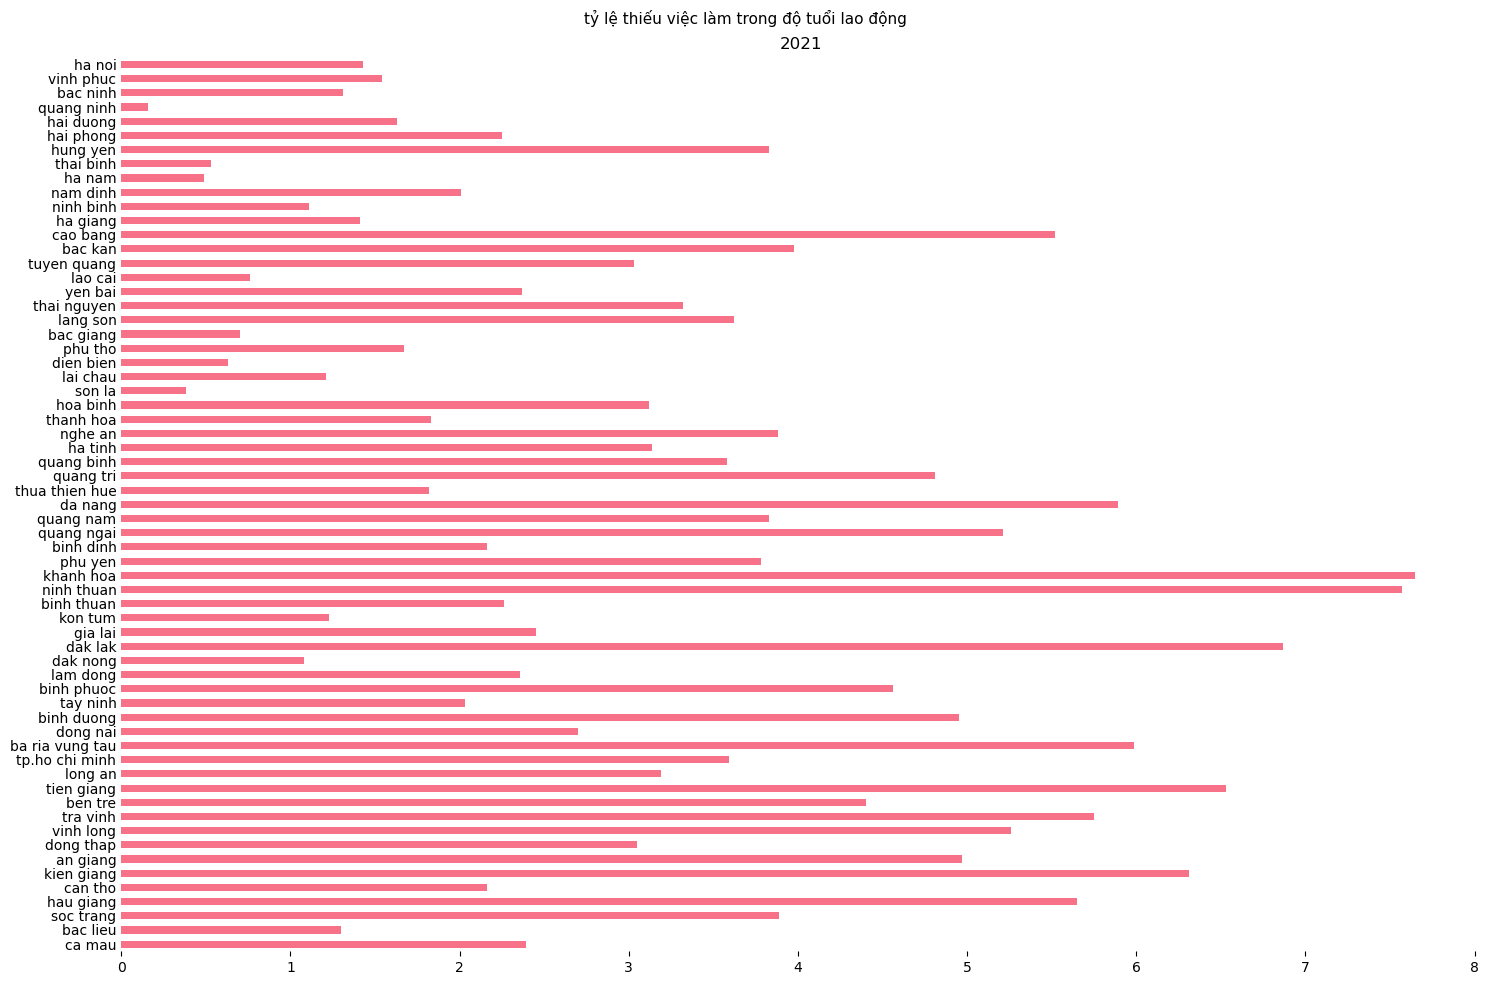

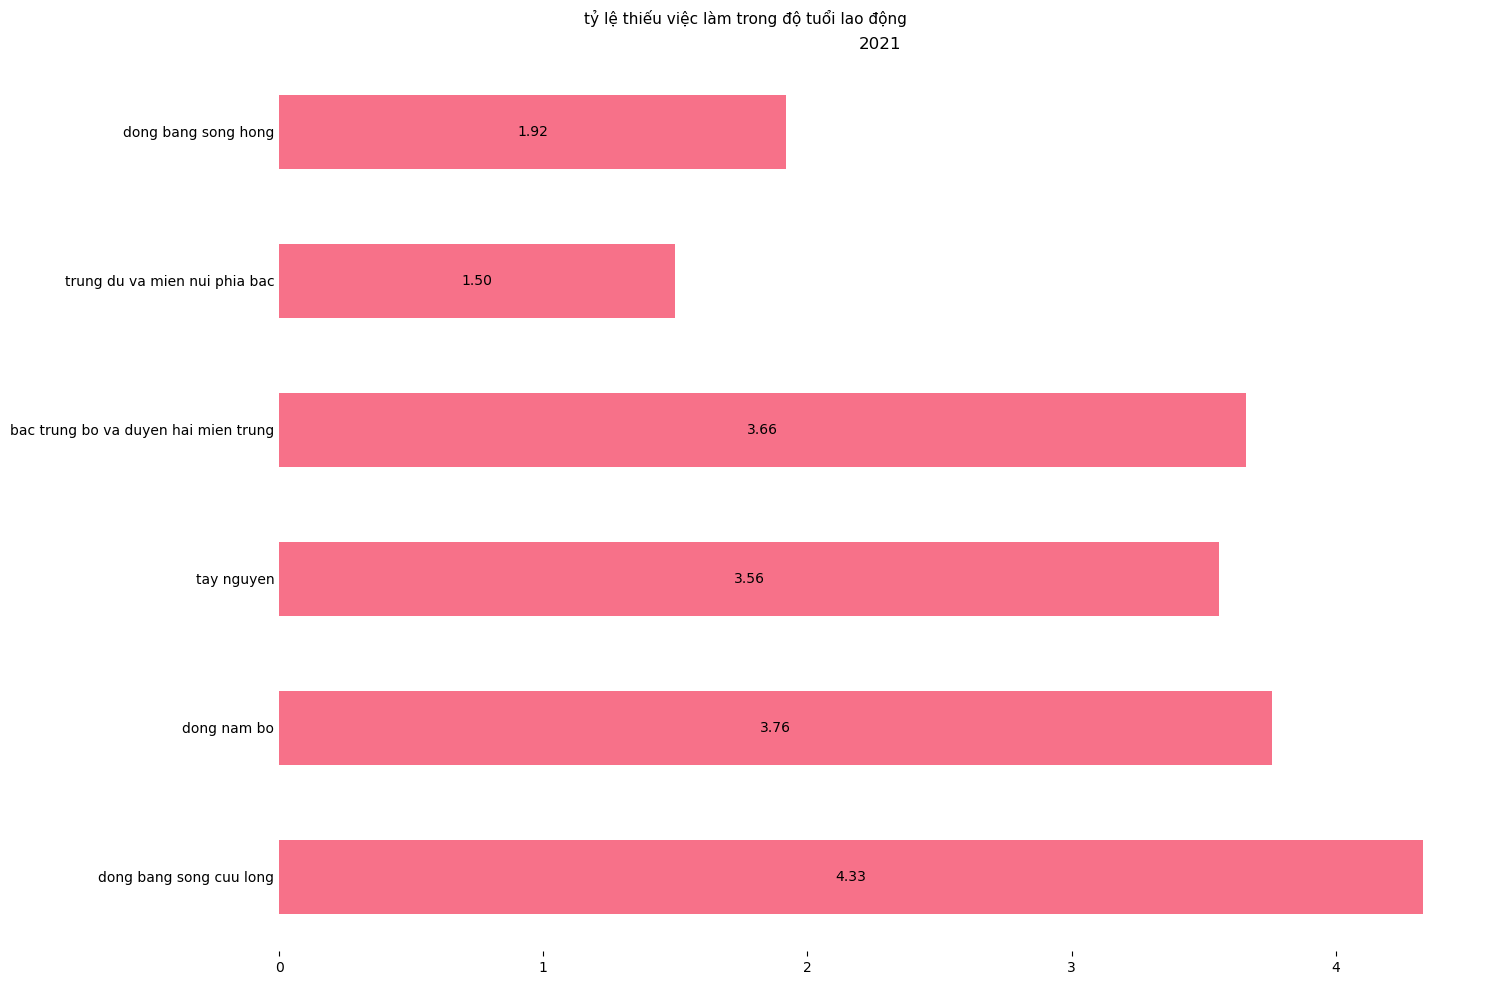

            2021
count  63.000000
mean    3.144127
std     1.930507
min     0.160000
25%     1.585000
50%     3.030000
75%     4.480000
max     7.650000
           2021
count  6.000000
mean   3.121667
std    1.133427
min    1.500000
25%    2.330000
50%    3.610000
75%    3.735000
max    4.330000
2021:
khanh hoa, BTBDHMT: 7.65
ninh thuan, BTBDHMT: 7.57
dak lak, TN: 6.87
tien giang, DBSCL: 6.53
kien giang, DBSCL: 6.31
------------------------------
count    63.000000
mean      3.144127
std       1.930507
min       0.160000
25%       1.585000
50%       3.030000
75%       4.480000
max       7.650000
dtype: float64
quang ninh  |  khanh hoa
count    6.000000
mean     3.121667
std      1.133427
min      1.500000
25%      2.330000
50%      3.610000
75%      3.735000
max      4.330000
dtype: float64
trung du va mien nui phia bac  |  dong bang song cuu long


In [64]:
report(tvl, None, ['2021'], title='tỷ lệ thiếu việc làm trong độ tuổi lao động')

### Thu nhập bình quân đầu người một tháng theo giá hiện hành phân theo địa phương chia theo Địa phương

In [35]:
tnbqdn = preprocess_df(lvt.copy(), features[4], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [107]:
tnbqdn.Province.nunique()

69

In [36]:
sc_4 = extract_feature(tnbqdn, None, years)
sc_4.shape

(63, 6)

In [26]:
sc_4 = tnbqdn[tnbqdn.Province.isin(province_name_preprocessed)][['2018', '2019', '2020', '2021']].mean(axis=1).tolist()

In [35]:
sc_4_model = extract_feature(tnbqdn, None, years_model)
sc_4_model.shape

(63, 4)

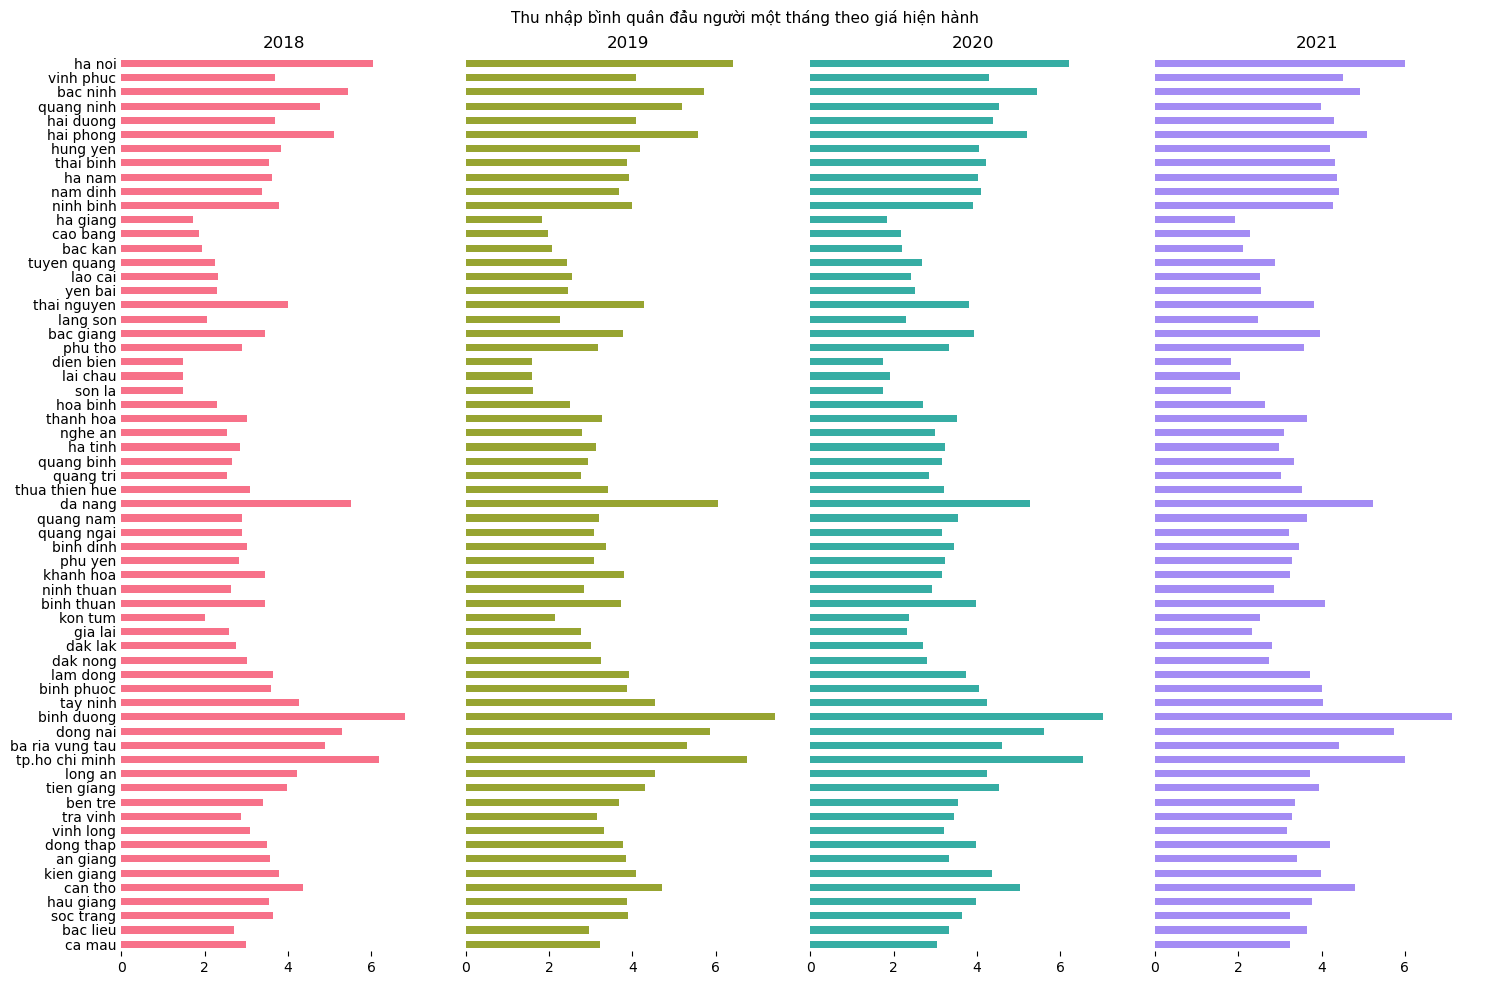

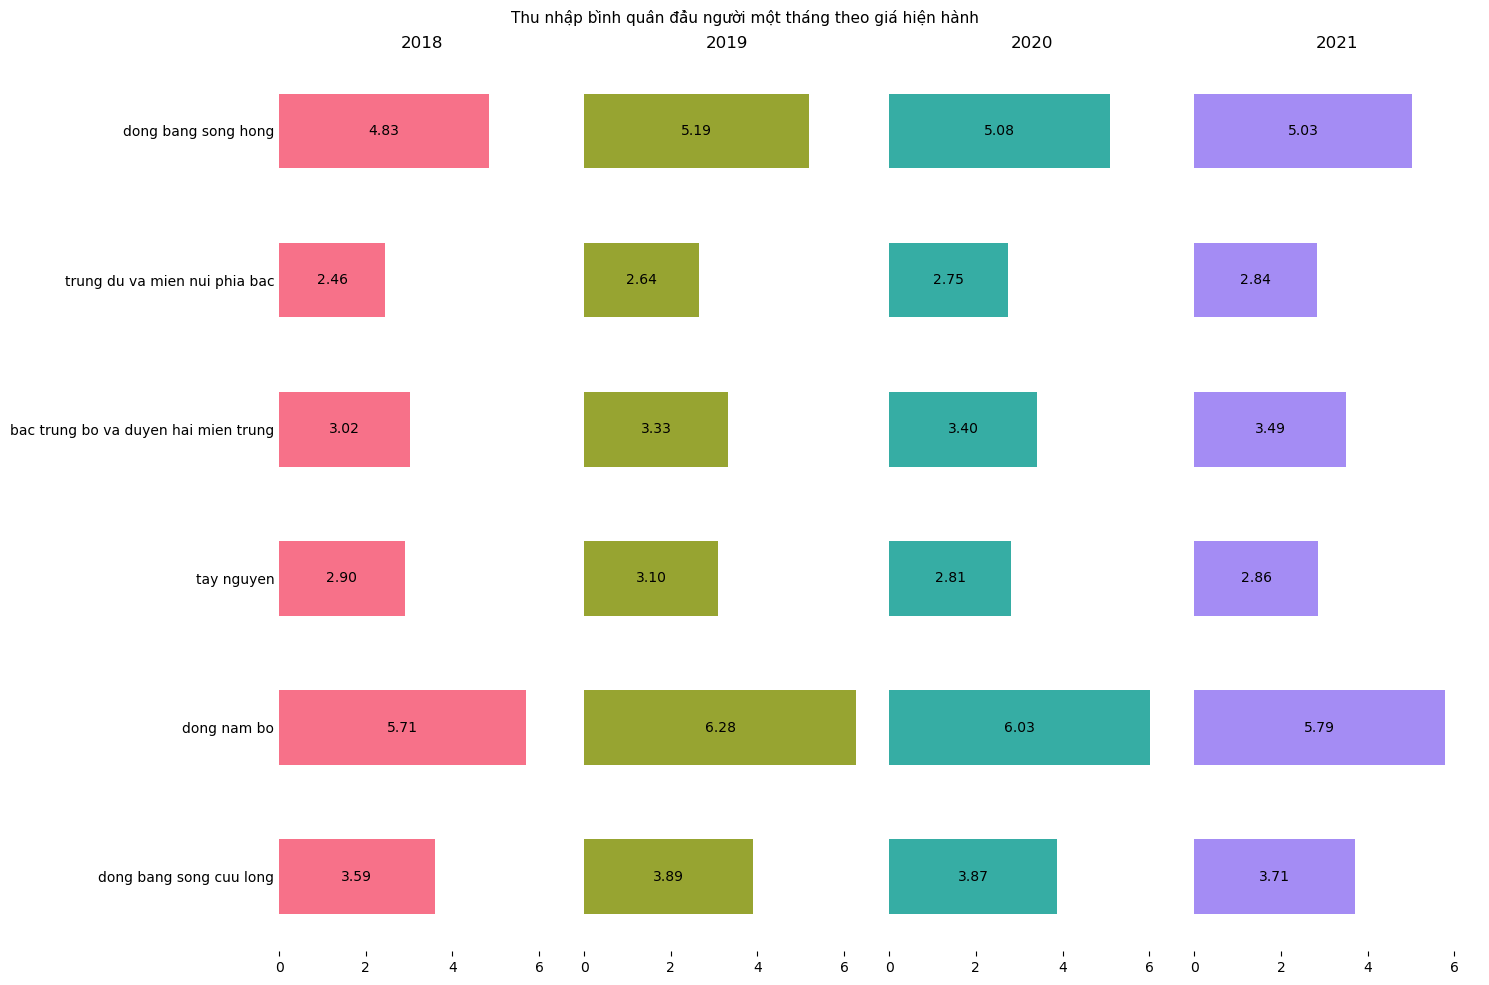

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean    3.374841   3.657556   3.634746   3.630635
std     1.159382   1.257615   1.133592   1.062312
min     1.477000   1.583000   1.737000   1.821000
25%     2.648500   2.881000   2.885500   2.926500
50%     3.384000   3.684000   3.510000   3.589000
75%     3.778500   4.088500   4.220500   4.195500
max     6.823000   7.433000   7.034000   7.123000
           2018      2019      2020      2021
count  6.000000  6.000000  6.000000  6.000000
mean   3.749500  4.070500  3.990833  3.953167
std    1.263768  1.394004  1.313888  1.204880
min    2.455000  2.640000  2.745000  2.837000
25%    2.925750  3.154000  2.961250  3.015250
50%    3.301500  3.608500  3.638000  3.603000
75%    4.522500  4.864750  4.782000  4.697750
max    5.709000  6.280000  6.025000  5.794000
2018:
binh duong, DNB: 6.823
tp.ho chi minh, DNB: 6.177
ha noi, DBSH: 6.054
da nang, BTBDHMT: 5.506
bac ninh, DBSH: 5.446
--------------

In [66]:
report(tnbqdn, None, ['2018', '2019', '2020', '2021'], 'Thu nhập bình quân đầu người một tháng theo giá hiện hành')

### Lực lượng lao động từ 15 tuổi trở lên phân theo địa phương chia theo Địa phương và Năm

In [37]:
llld = preprocess_df(lvt.copy(), features[5], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [110]:
llld.Province.nunique()

69

In [34]:
llld.Sub_Feature.unique()

array([nan], dtype=object)

In [35]:
llld[years].isnull().sum()

2002          69
2003          69
2004          69
2005           0
2006          69
2007           0
2008           0
2009           0
2010           0
2011           0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
2022          69
Sơ bộ 2022     0
dtype: int64

In [38]:
sc_5 = extract_feature(llld, None, years)
sc_5.shape

(63, 6)

In [28]:
sc_5 = llld[llld.Province.isin(province_name_preprocessed)][['2017', '2018', '2019', '2020', '2021']].mean(axis=1).tolist()
len(sc_5)

63

In [38]:
sc_5_model = extract_feature(llld, None, years_model)
sc_5_model.shape

(63, 4)

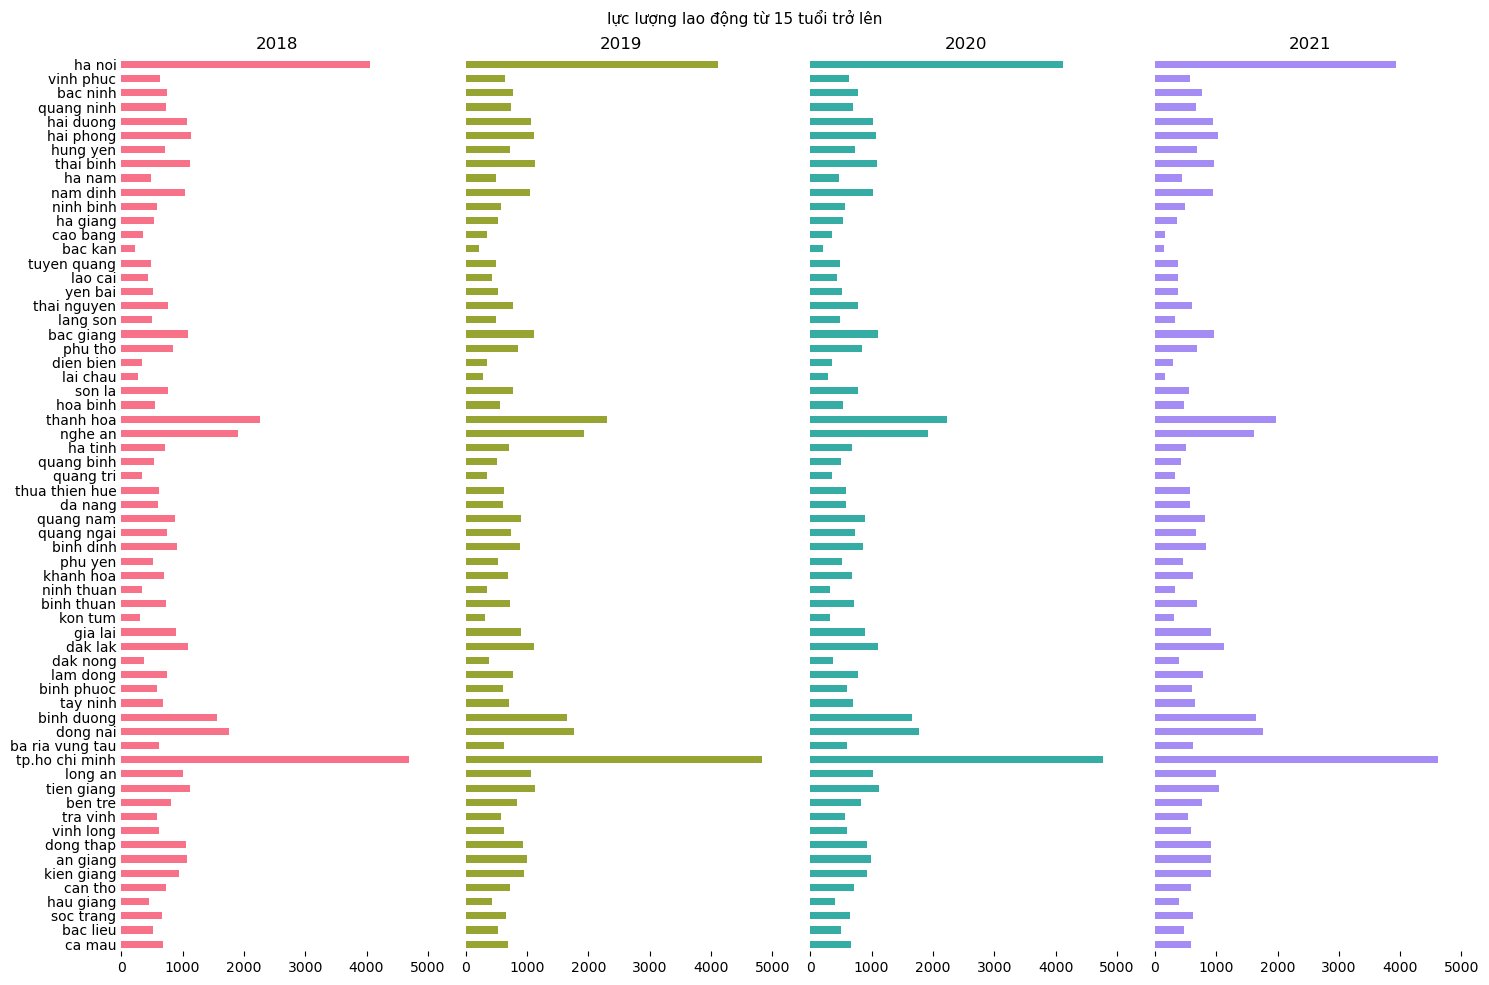

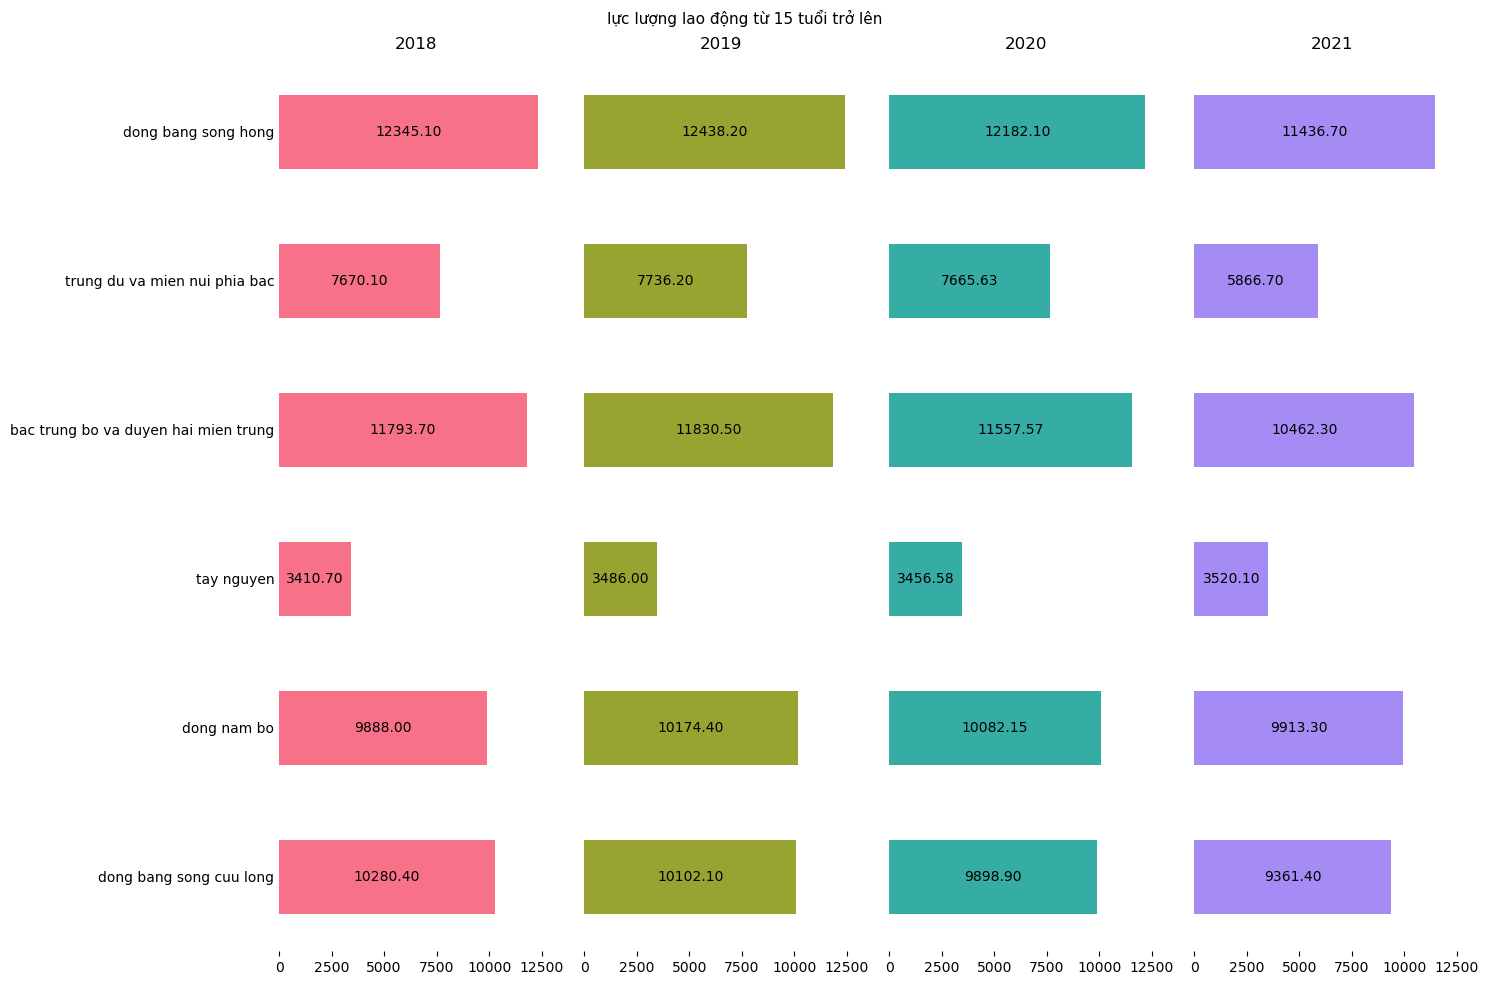

              2018         2019         2020         2021
count    63.000000    63.000000    63.000000    63.000000
mean    879.174603   885.196825   870.523175   802.549206
std     744.480382   761.752759   757.380047   734.644061
min     216.500000   211.000000   205.970000   144.600000
25%     526.100000   520.750000   515.945000   452.300000
50%     707.000000   707.200000   692.830000   614.100000
75%     976.450000   941.000000   920.665000   916.600000
max    4684.900000  4826.000000  4769.630000  4622.500000
               2018          2019          2020          2021
count      6.000000      6.000000      6.000000      6.000000
mean    9231.333333   9294.566667   9140.488333   8426.750000
std     3289.688122   3283.521237   3194.921636   3063.192275
min     3410.700000   3486.000000   3456.580000   3520.100000
25%     8224.575000   8327.675000   8223.947500   6740.375000
50%    10084.200000  10138.250000   9990.525000   9637.350000
75%    11415.375000  11416.475000  11188.715

In [68]:
report(llld, None, ['2018', '2019', '2020', '2021'], 'lực lượng lao động từ 15 tuổi trở lên')

### Thu nhập bình quân đầu người một tháng theo giá hiện hành phân theo trungn bình 5 nhóm thu nhập và phân theo địa phương chia theo Địa phương, Nhóm thu nhập và Năm

In [39]:
ttbqdn_v1 = preprocess_df(lvt.copy(), features[6], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [38]:
ttbqdn_v1.Province.nunique()

69

In [39]:
ttbqdn_v1.Sub_Feature.unique()

array([nan], dtype=object)

In [40]:
ttbqdn_v1[years].isnull().sum()

2002          69
2003          69
2004          69
2005          69
2006          69
2007          69
2008          69
2009          69
2010           0
2011          69
2012           0
2013          69
2014           0
2015          69
2016           0
2017          69
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
2022          69
Sơ bộ 2022     0
dtype: int64

In [40]:
sc_6 = extract_feature(ttbqdn_v1, None, years)
sc_6.shape

(63, 6)

In [30]:
sc_6 = ttbqdn_v1[ttbqdn_v1.Province.isin(province_name_preprocessed)][['2018', '2019', '2020', '2021']].mean(axis=1).tolist()
len(sc_6)

63

In [40]:
sc_6_model = extract_feature(ttbqdn_v1, None, years_model)
sc_6_model.shape

(63, 4)

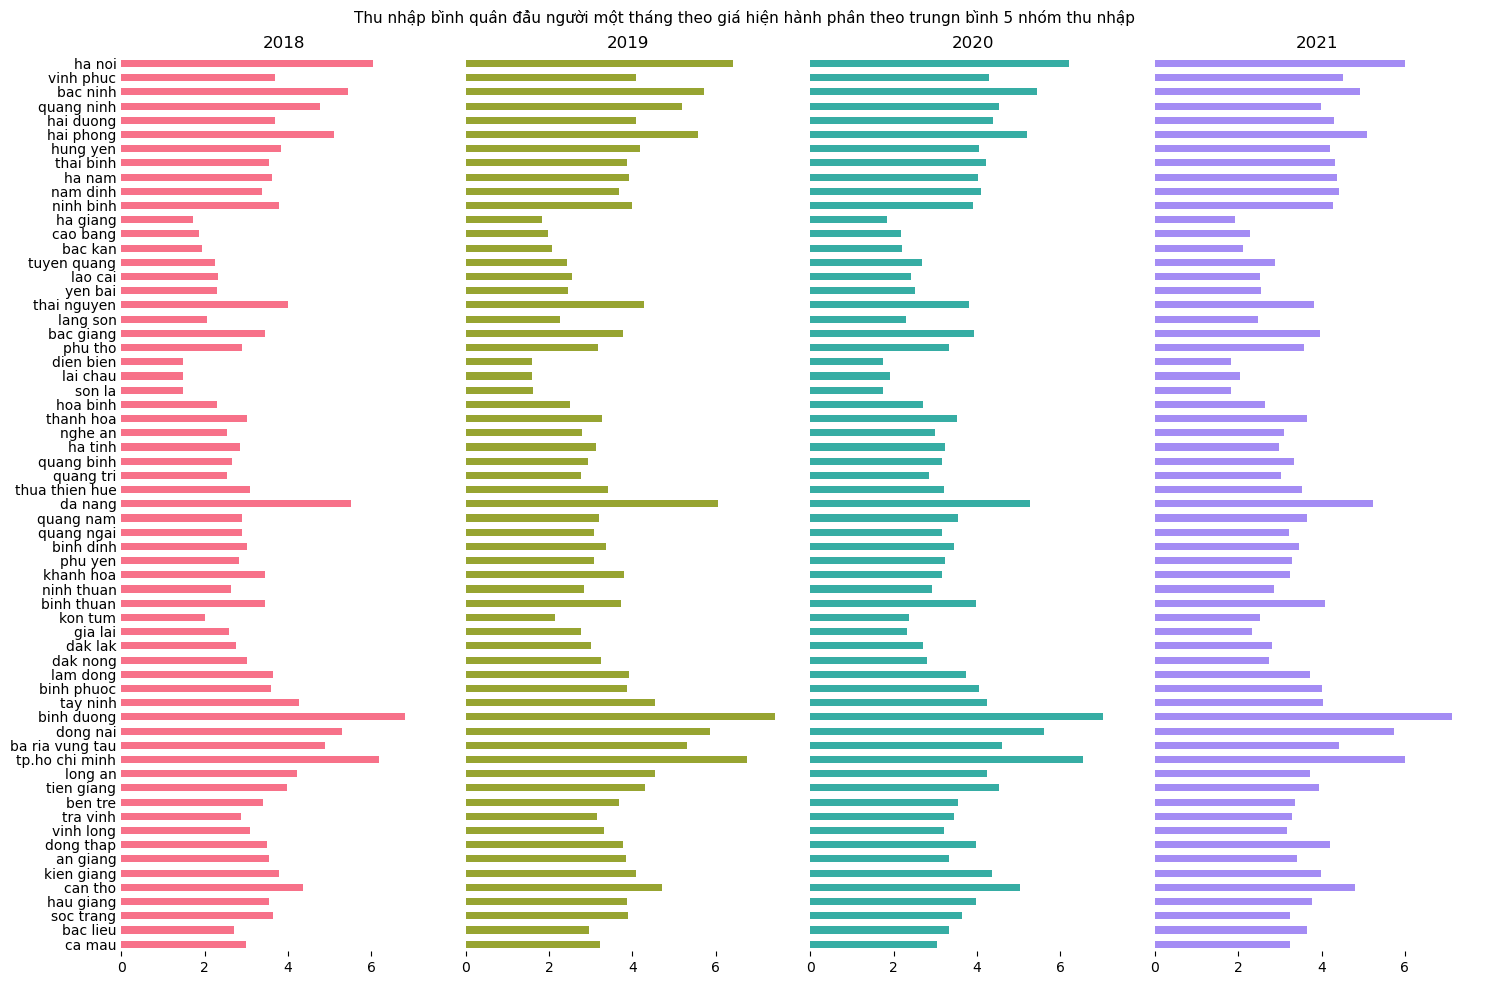

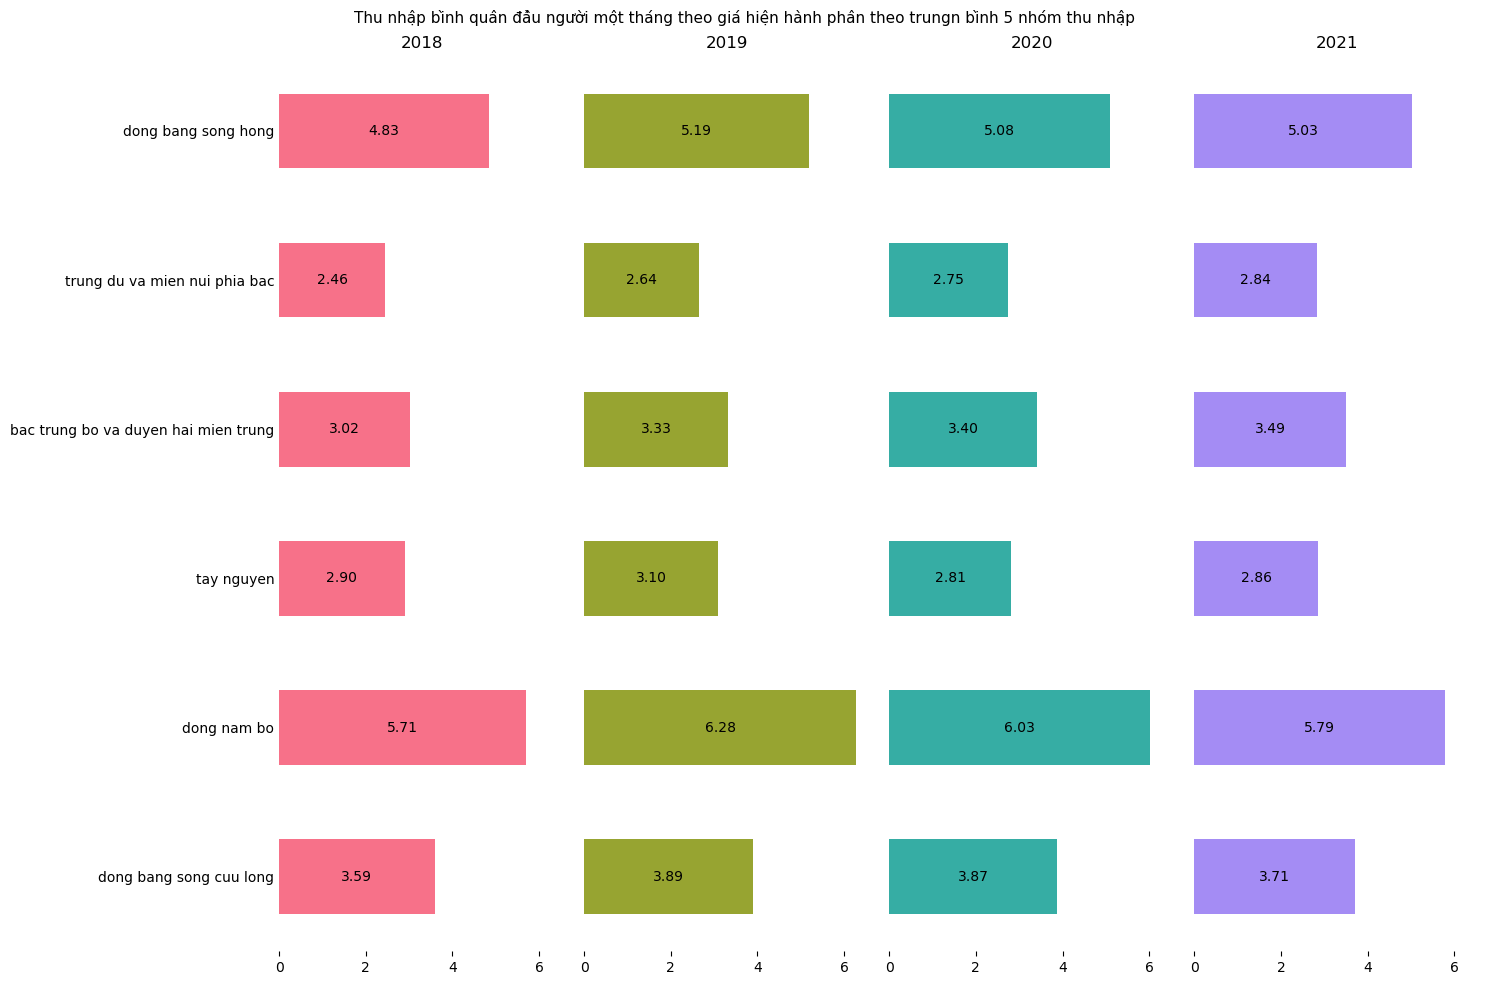

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean    3.374460   3.657556   3.634746   3.630635
std     1.159394   1.257615   1.133592   1.062312
min     1.477000   1.583000   1.737000   1.821000
25%     2.648500   2.881000   2.885500   2.926500
50%     3.383000   3.684000   3.510000   3.589000
75%     3.778000   4.088500   4.220500   4.195500
max     6.823000   7.433000   7.034000   7.123000
           2018      2019      2020      2021
count  6.000000  6.000000  6.000000  6.000000
mean   3.749500  4.070500  3.990833  3.953167
std    1.263768  1.394004  1.313888  1.204880
min    2.455000  2.640000  2.745000  2.837000
25%    2.925750  3.154000  2.961250  3.015250
50%    3.301500  3.608500  3.638000  3.603000
75%    4.522500  4.864750  4.782000  4.697750
max    5.709000  6.280000  6.025000  5.794000
2018:
binh duong, DNB: 6.823
tp.ho chi minh, DNB: 6.177
ha noi, DBSH: 6.054
da nang, BTBDHMT: 5.506
bac ninh, DBSH: 5.445
--------------

In [70]:
report(ttbqdn_v1, None, ['2018', '2019', '2020', '2021'], 'Th       bình quân đầu người một tháng theo giá hiện hành phân theo trungn bình 5 nhóm thu nhập')

### Tỷ lệ lao động từ 15 tuổi trở lên đã qua đào tạo phân theo địa phương

In [41]:
tlld_15t = preprocess_df(lvt.copy(), features[7], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [43]:
tlld_15t.Province.nunique()

69

In [44]:
tlld_15t.Sub_Feature.unique()

array([nan], dtype=object)

In [45]:
tlld_15t[years].isnull().sum()

2002          69
2003          69
2004          69
2005          69
2006          69
2007          69
2008          69
2009          69
2010          69
2011          69
2012          69
2013          69
2014          69
2015          69
2016          69
2017          69
2018          69
2019          69
2020          69
2021           0
Sơ bộ 2021    69
2022          69
Sơ bộ 2022     0
dtype: int64

In [42]:
sc_7 = extract_feature(tlld_15t, None, years)
sc_7.shape

(63, 6)

In [32]:
sc_7 = tlld_15t[tlld_15t.Province.isin(province_name_preprocessed)]['2021'].tolist()
len(sc_7)

63

In [42]:
sc_7_model = extract_feature(tlld_15t, None, years_model)
sc_7_model.shape

(63, 4)

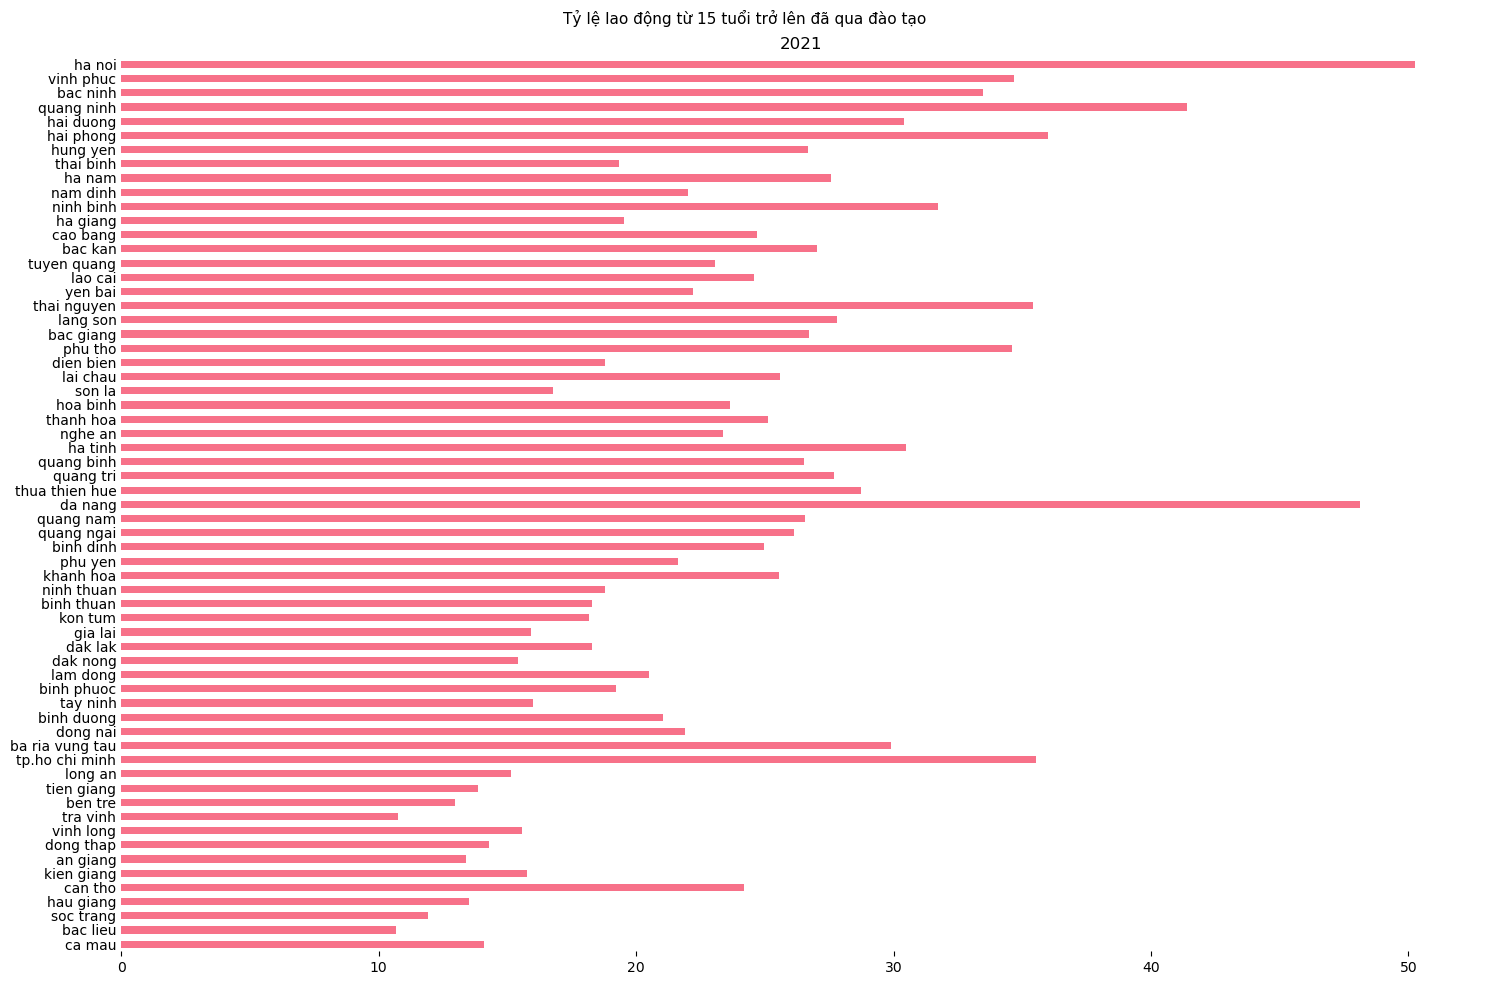

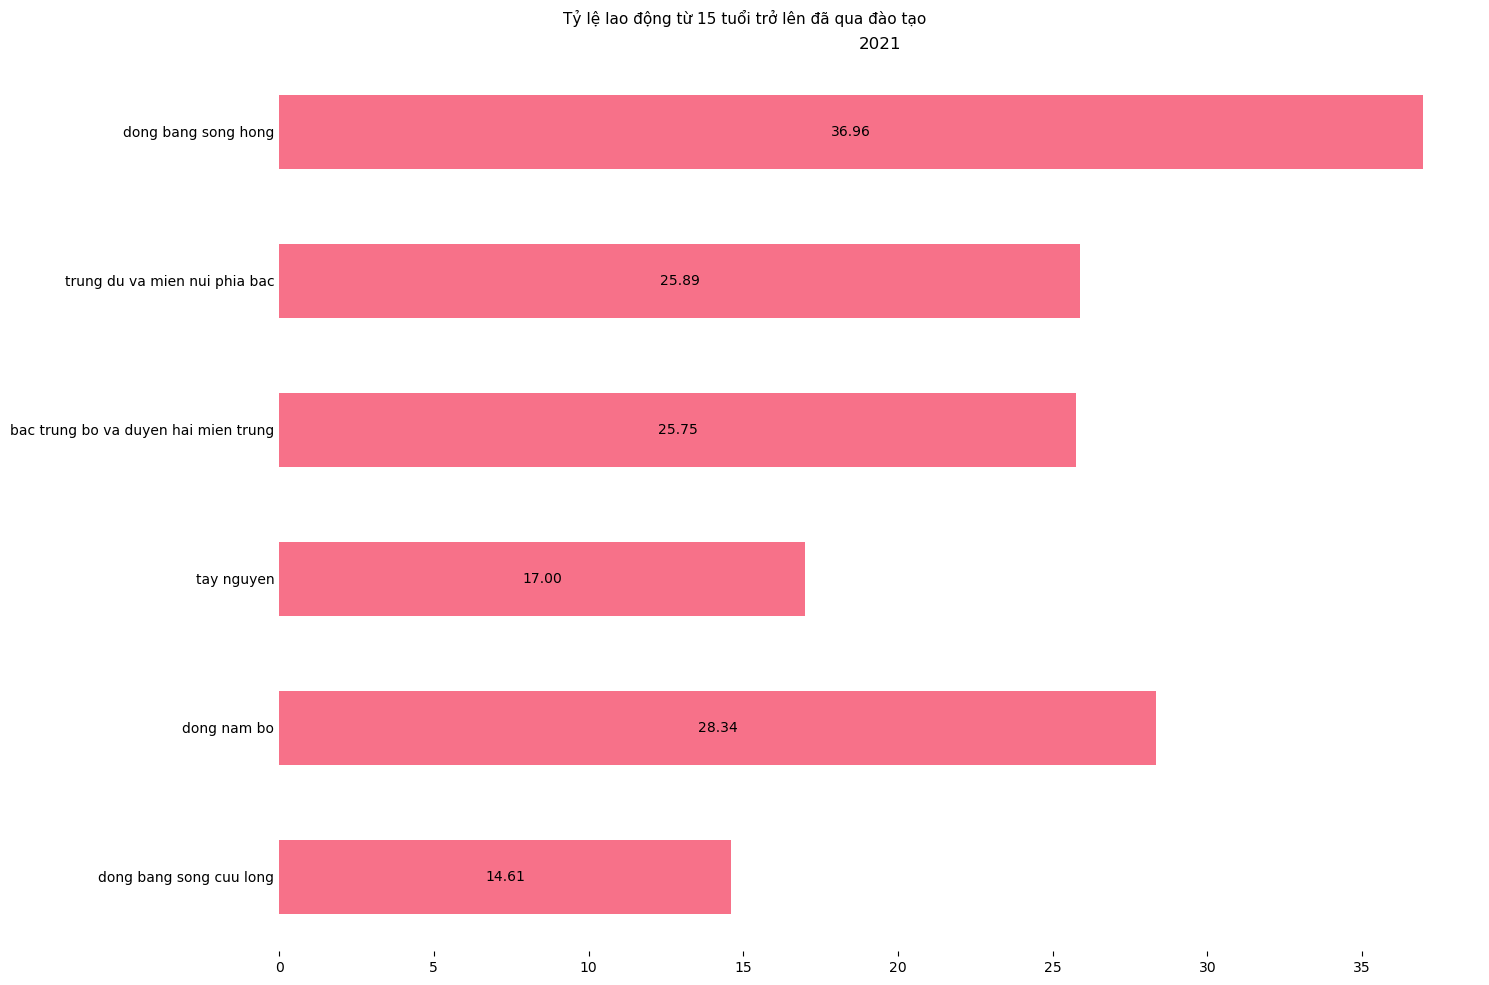

            2021
count  63.000000
mean   23.711111
std     8.477877
min    10.660000
25%    17.475000
50%    23.370000
75%    27.635000
max    50.270000
            2021
count   6.000000
mean   24.758333
std     8.088924
min    14.610000
25%    19.187500
50%    25.820000
75%    27.727500
max    36.960000
2021:
ha noi, DBSH: 50.27
da nang, BTBDHMT: 48.14
quang ninh, DBSH: 41.39
hai phong, DBSH: 36.01
tp.ho chi minh, DNB: 35.55
------------------------------
count    63.000000
mean     23.711111
std       8.477877
min      10.660000
25%      17.475000
50%      23.370000
75%      27.635000
max      50.270000
dtype: float64
bac lieu  |  ha noi
count     6.000000
mean     24.758333
std       8.088924
min      14.610000
25%      19.187500
50%      25.820000
75%      27.727500
max      36.960000
dtype: float64
dong bang song cuu long  |  dong bang song hong


In [72]:
report(tlld_15t, None, ['2021'], 'Tỷ lệ lao động từ 15 tuổi trở lên đã qua đào tạo')

### Tỷ lệ hộ nghèo phân theo địa phương chia theo Địa phương và Năm

In [43]:
tlhn = preprocess_df(lvt.copy(), features[8], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [74]:
print(tlhn.Province.nunique())
print(tlhn.Sub_Feature.unique())

69
[nan]


In [75]:
tlhn[years].isnull().sum()

2002          69
2003          69
2004          69
2005          69
2006           0
2007          69
2008           0
2009          69
2010           0
2011          69
2012           0
2013           0
2014           0
2015           0
2016           1
2017          69
2018          69
2019          69
2020          69
2021          69
Sơ bộ 2021    69
2022          69
Sơ bộ 2022    69
dtype: int64

In [44]:
sc_8 = extract_feature(tlhn, None, years)
sc_8.shape

(63, 6)

In [34]:
sc_8 = tlhn[tlhn.Province.isin(province_name_preprocessed)][['2012', '2013', '2014', '2015', '2016']].mean(axis=1).tolist()
len(sc_8)

63

In [44]:
sc_8_model = extract_feature(tlhn, None, years_model)
sc_8_model.shape

(63, 4)

            2012       2013       2014       2015       2016
count  63.000000  63.000000  63.000000  63.000000  62.000000
mean   14.614286  13.090476  11.068254   9.355556   7.901613
std    10.067127   9.327115   8.083213   7.194931   6.415772
min     0.100000   0.000000   0.000000   0.000000   0.000000
25%     7.500000   6.200000   4.950000   3.850000   3.175000
50%    12.900000  11.900000   9.700000   8.000000   6.350000
75%    19.850000  17.600000  15.050000  12.400000  10.550000
max    43.500000  40.600000  35.300000  31.500000  27.900000
            2012       2013       2014       2015       2016
count   6.000000   6.000000   6.000000   6.000000   6.000000
mean   12.516667  11.216667   9.483333   7.916667   6.516667
std     8.272706   7.655434   6.450556   5.597648   4.808499
min     1.300000   1.100000   1.000000   0.700000   0.600000
25%     7.025000   5.975000   4.975000   4.025000   3.100000
50%    13.100000  11.600000   9.850000   8.150000   6.600000
75%    17.375000  15.650

<Figure size 2000x1000 with 0 Axes>

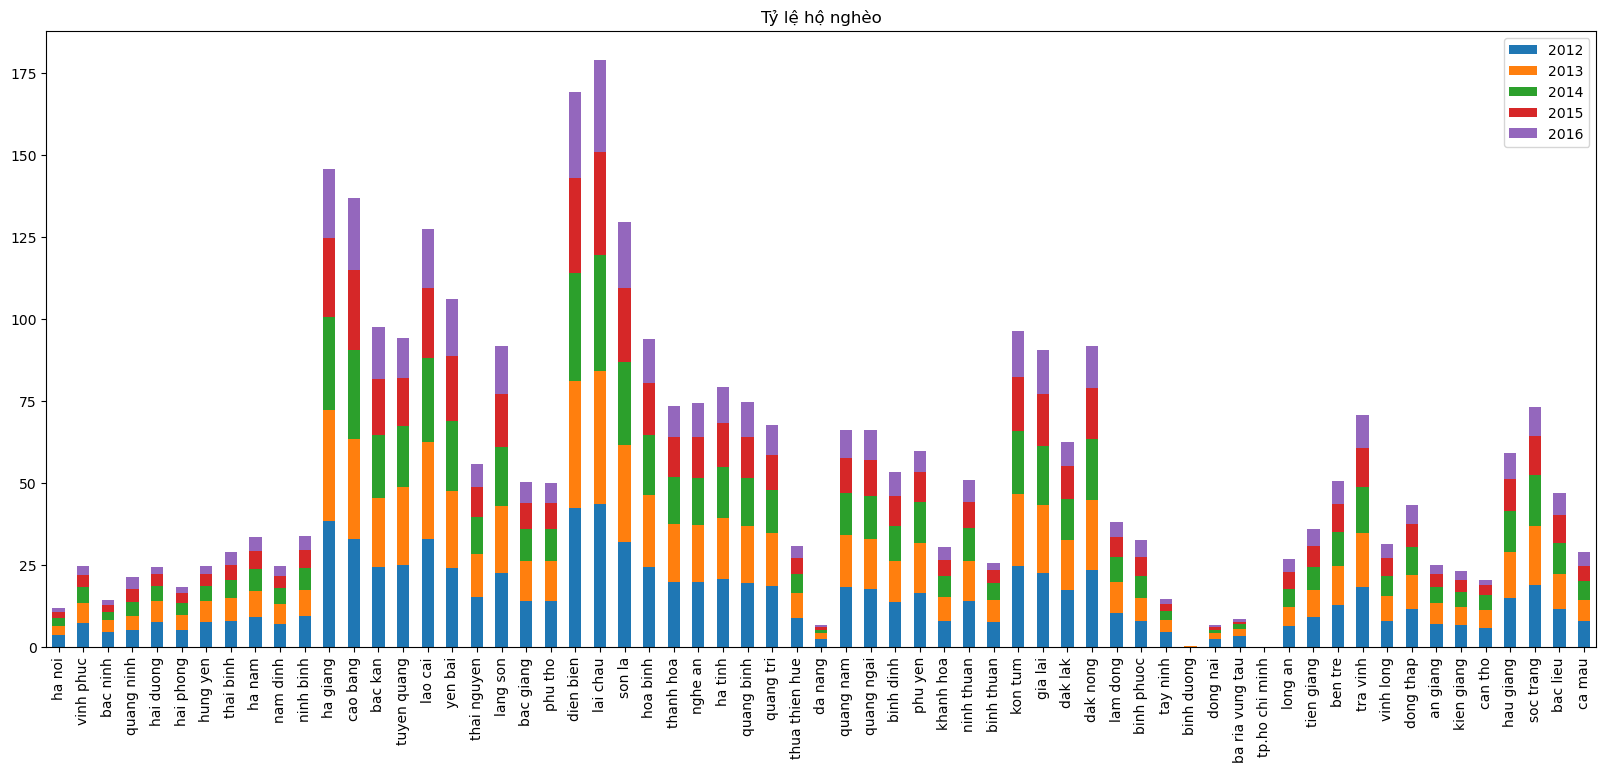

<Figure size 2000x1000 with 0 Axes>

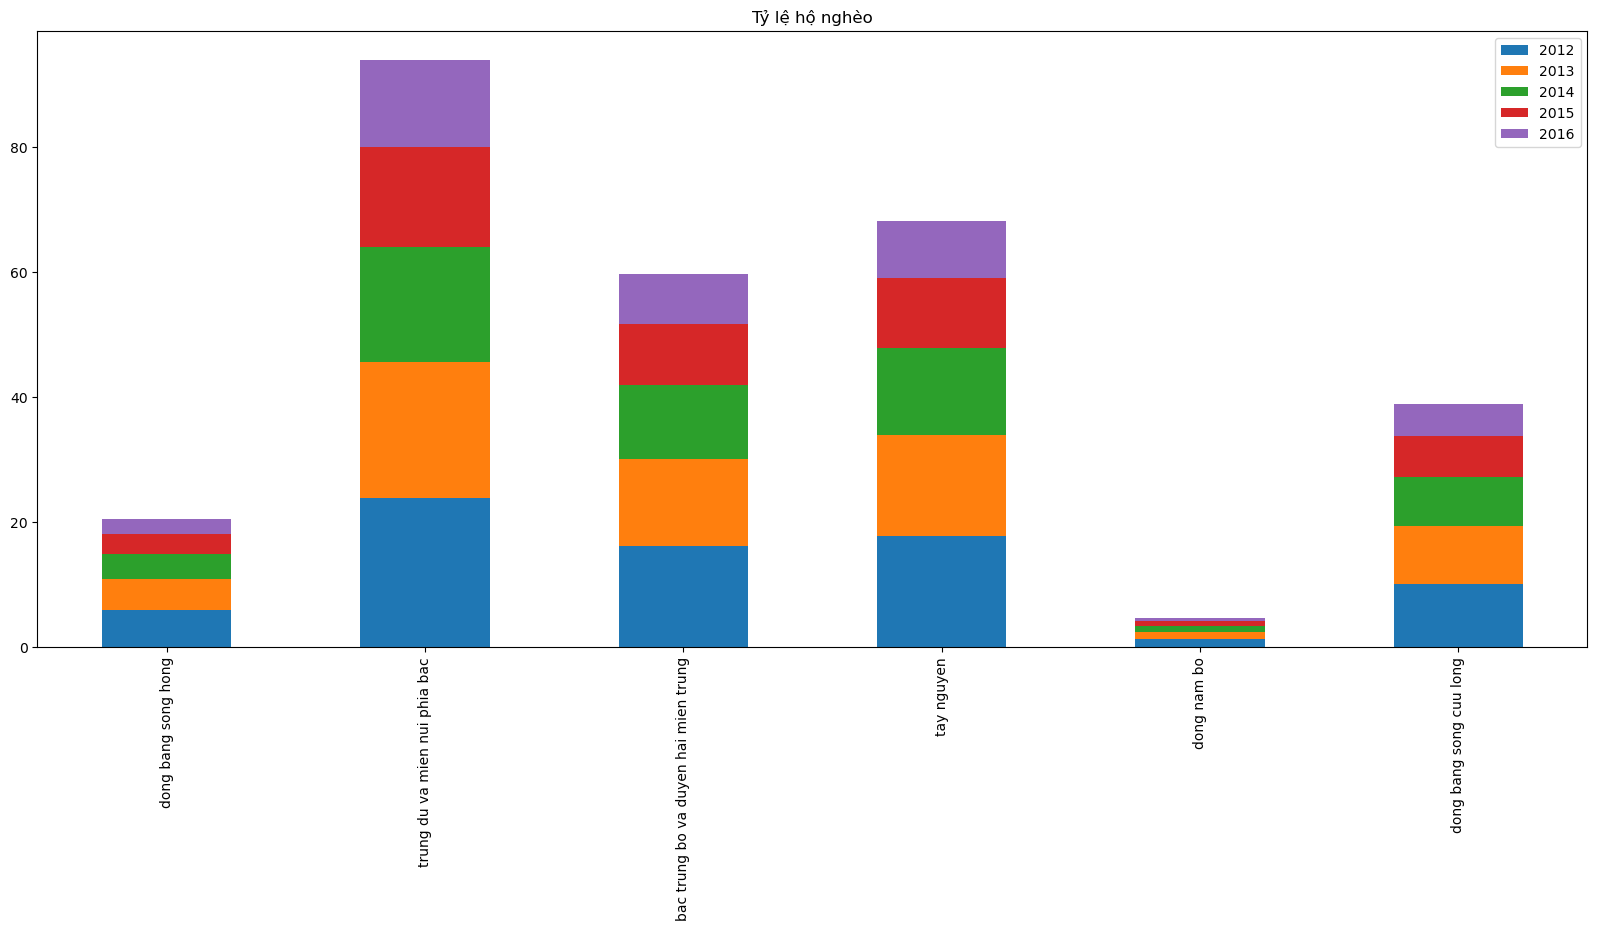

In [118]:
report(tlhn, None, ['2012', '2013', '2014', '2015', '2016'], 'Tỷ lệ hộ nghèo')

### Tỷ lệ thất nghiệp trong độ tuổi lao động phân theo địa phương

In [45]:
tltn = preprocess_df(lvt.copy(), features[9], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [52]:
print(tltn.Province.nunique())
print(tltn.Sub_Feature.unique())

69
[nan]


In [53]:
tltn[years].isnull().sum()

2002          69
2003          69
2004          69
2005          69
2006          69
2007          69
2008          69
2009          69
2010          69
2011          69
2012          69
2013          69
2014          69
2015          69
2016          69
2017          69
2018          69
2019          69
2020          69
2021           0
Sơ bộ 2021    69
2022          69
Sơ bộ 2022     0
dtype: int64

In [46]:
sc_9 = extract_feature(tltn, None, years)
sc_9.shape

(63, 6)

In [36]:
sc_9 = tltn[tltn.Province.isin(province_name_preprocessed)]['2021'].tolist()
len(sc_9)

63

In [46]:
sc_9_model = extract_feature(tltn, None, years_model)
sc_9_model.shape

(63, 4)

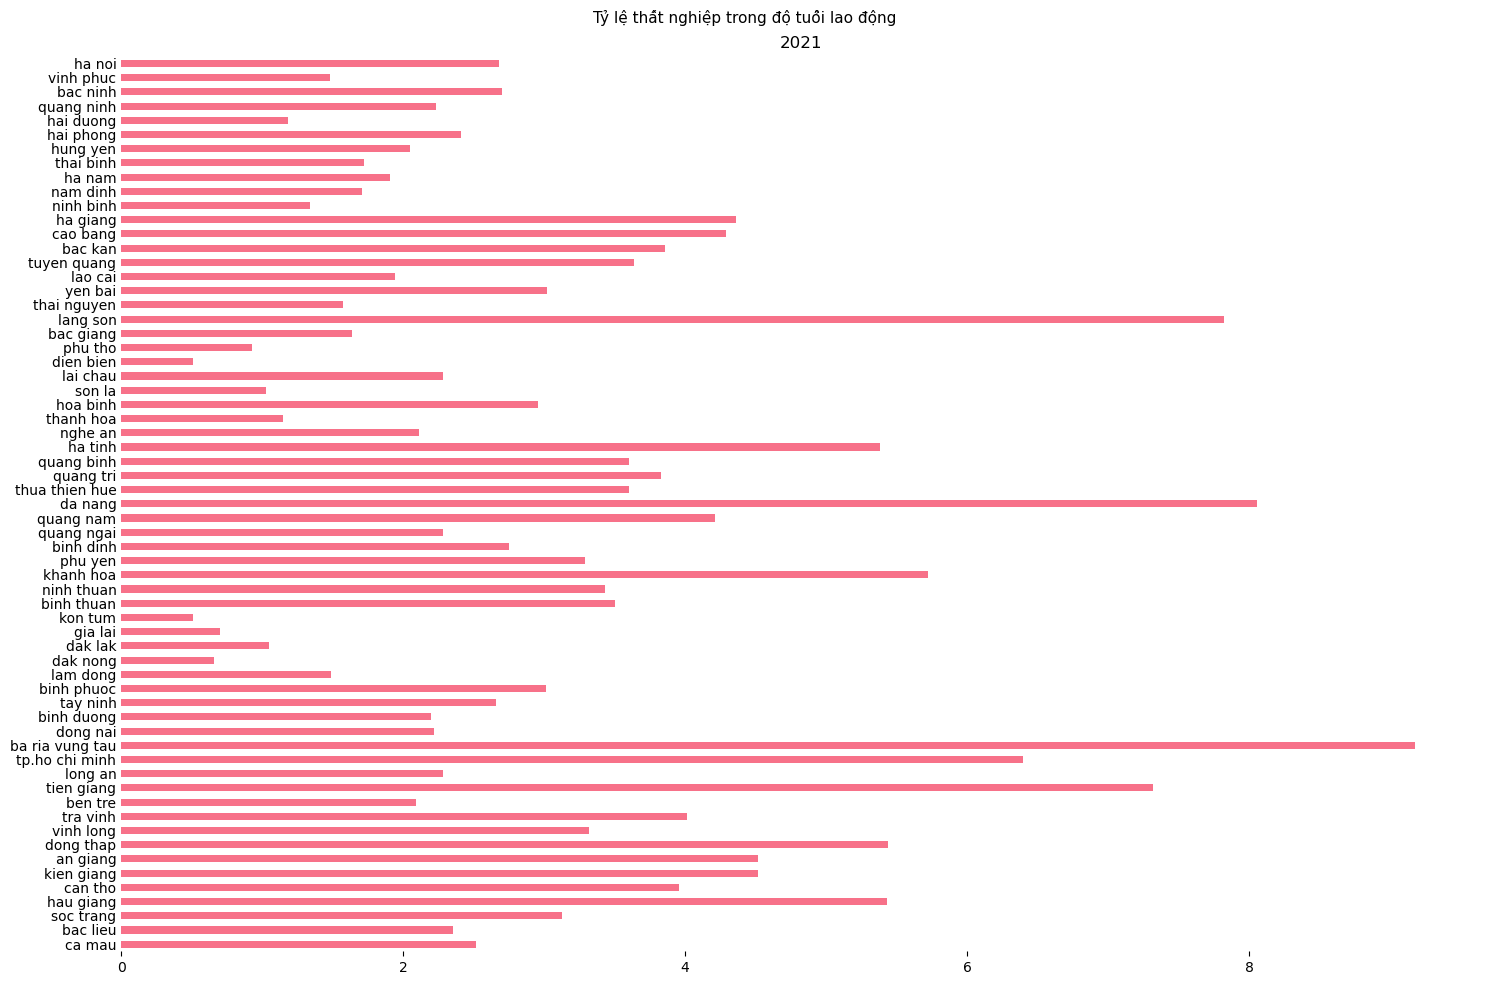

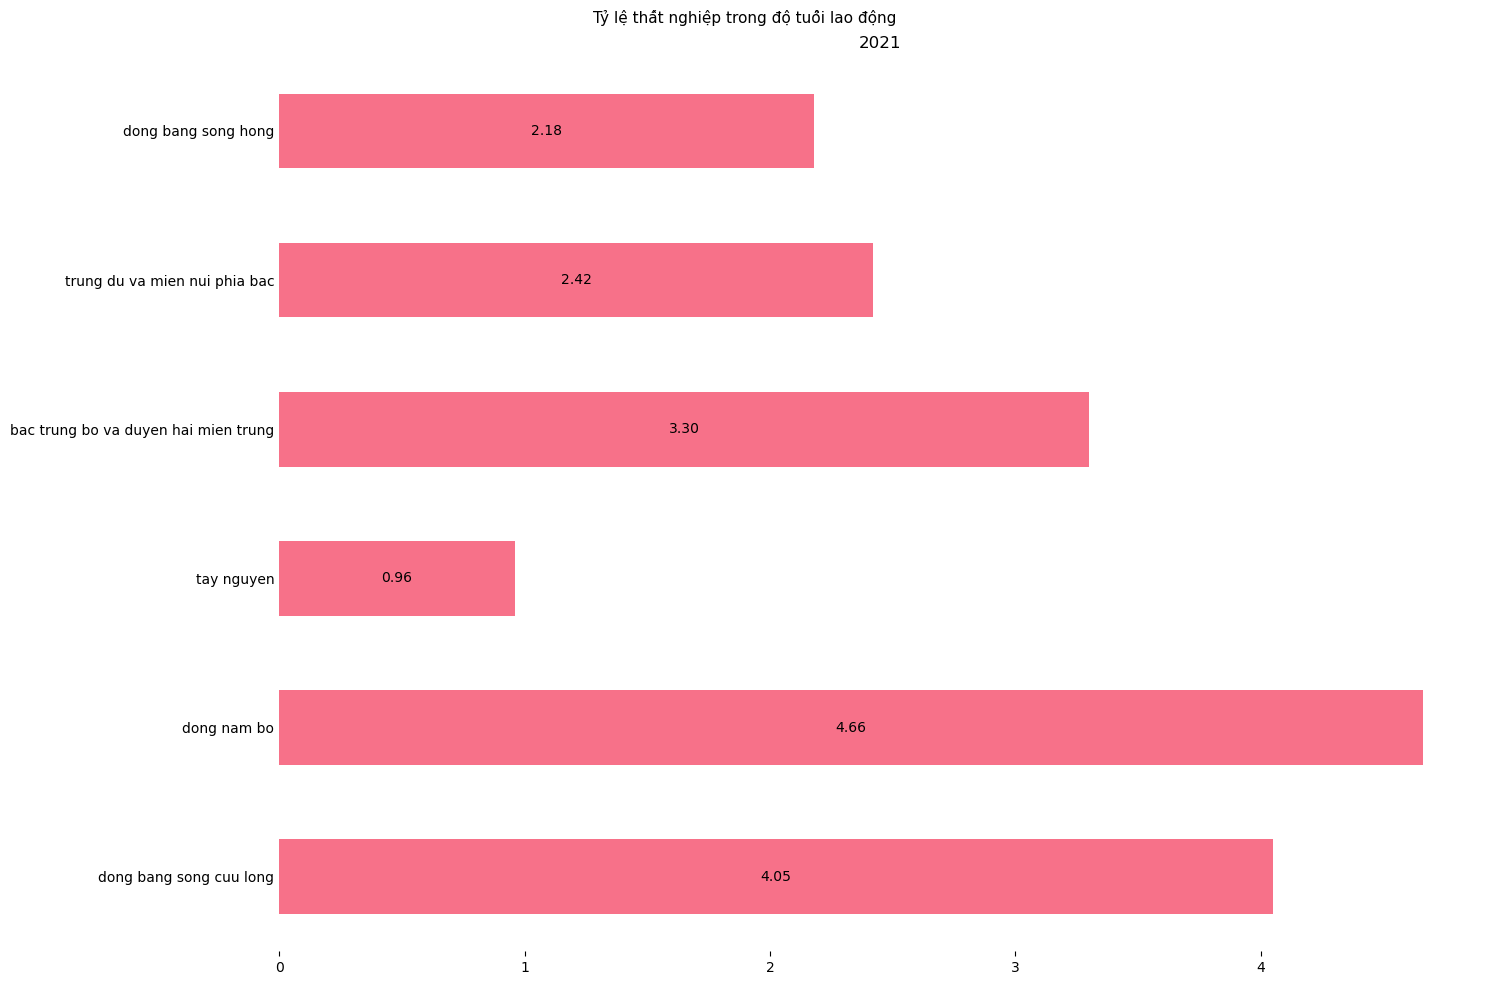

            2021
count  63.000000
mean    3.097460
std     1.893652
min     0.510000
25%     1.815000
50%     2.680000
75%     3.910000
max     9.180000
           2021
count  6.000000
mean   2.928333
std    1.348160
min    0.960000
25%    2.240000
50%    2.860000
75%    3.862500
max    4.660000
2021:
ba ria vung tau, DNB: 9.18
da nang, BTBDHMT: 8.06
lang son, TDMNPB: 7.82
tien giang, DBSCL: 7.32
tp.ho chi minh, DNB: 6.4
------------------------------
count    63.000000
mean      3.097460
std       1.893652
min       0.510000
25%       1.815000
50%       2.680000
75%       3.910000
max       9.180000
dtype: float64
dien bien  |  ba ria vung tau
count    6.000000
mean     2.928333
std      1.348160
min      0.960000
25%      2.240000
50%      2.860000
75%      3.862500
max      4.660000
dtype: float64
tay nguyen  |  dong nam bo


In [77]:
report(tltn, None, ['2021'], 'Tỷ lệ thất nghiệp trong độ tuổi lao động')

### GINI

In [73]:
gini = preprocess_df(lvt.copy(), features[10], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [56]:
print(gini.Province.nunique())
print(gini.Sub_Feature.unique())

69
[nan]


In [122]:
gini[years].isnull().sum()

2002          69
2003          69
2004          69
2005          69
2006          69
2007          69
2008          69
2009          69
2010          69
2011          69
2012          69
2013          69
2014          69
2015          69
2016          69
2017          69
2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
2022           0
Sơ bộ 2022    69
dtype: int64

In [48]:
sc_10 = extract_feature(gini, None, years)
sc_10.shape

(63, 6)

In [38]:
sc_10 = gini[gini.Province.isin(province_name_preprocessed)][['2018', '2019', '2020', '2021', '2022']].mean(axis=1).tolist()
len(sc_10)

63

In [48]:
sc_10_model = extract_feature(gini, None, years_model)
sc_10_model.shape

(63, 4)

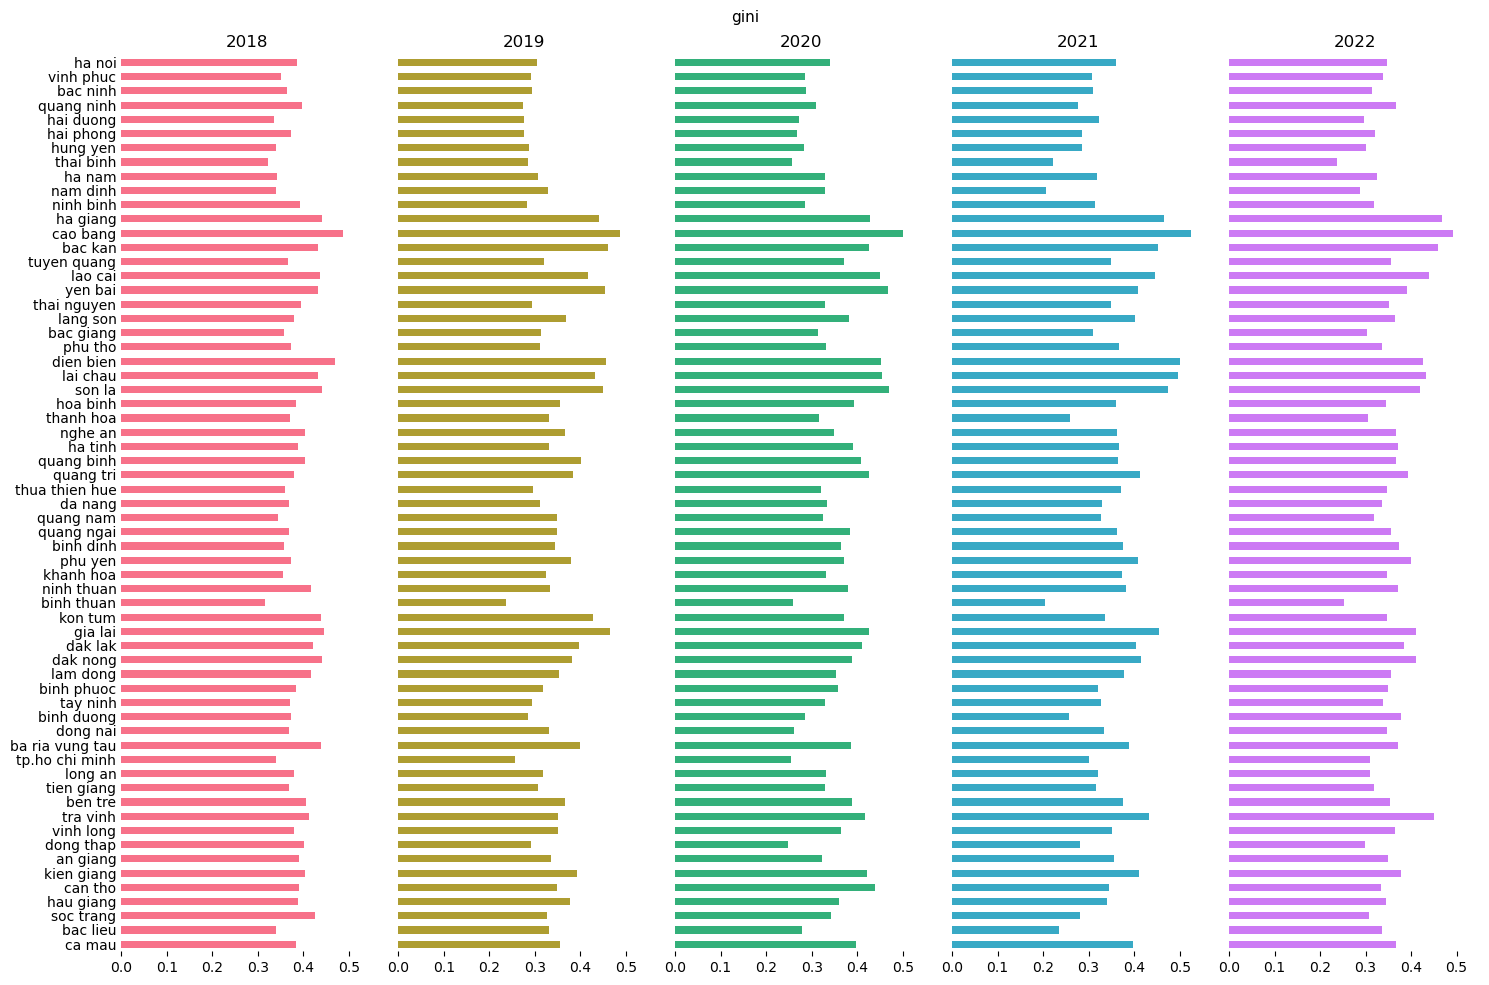

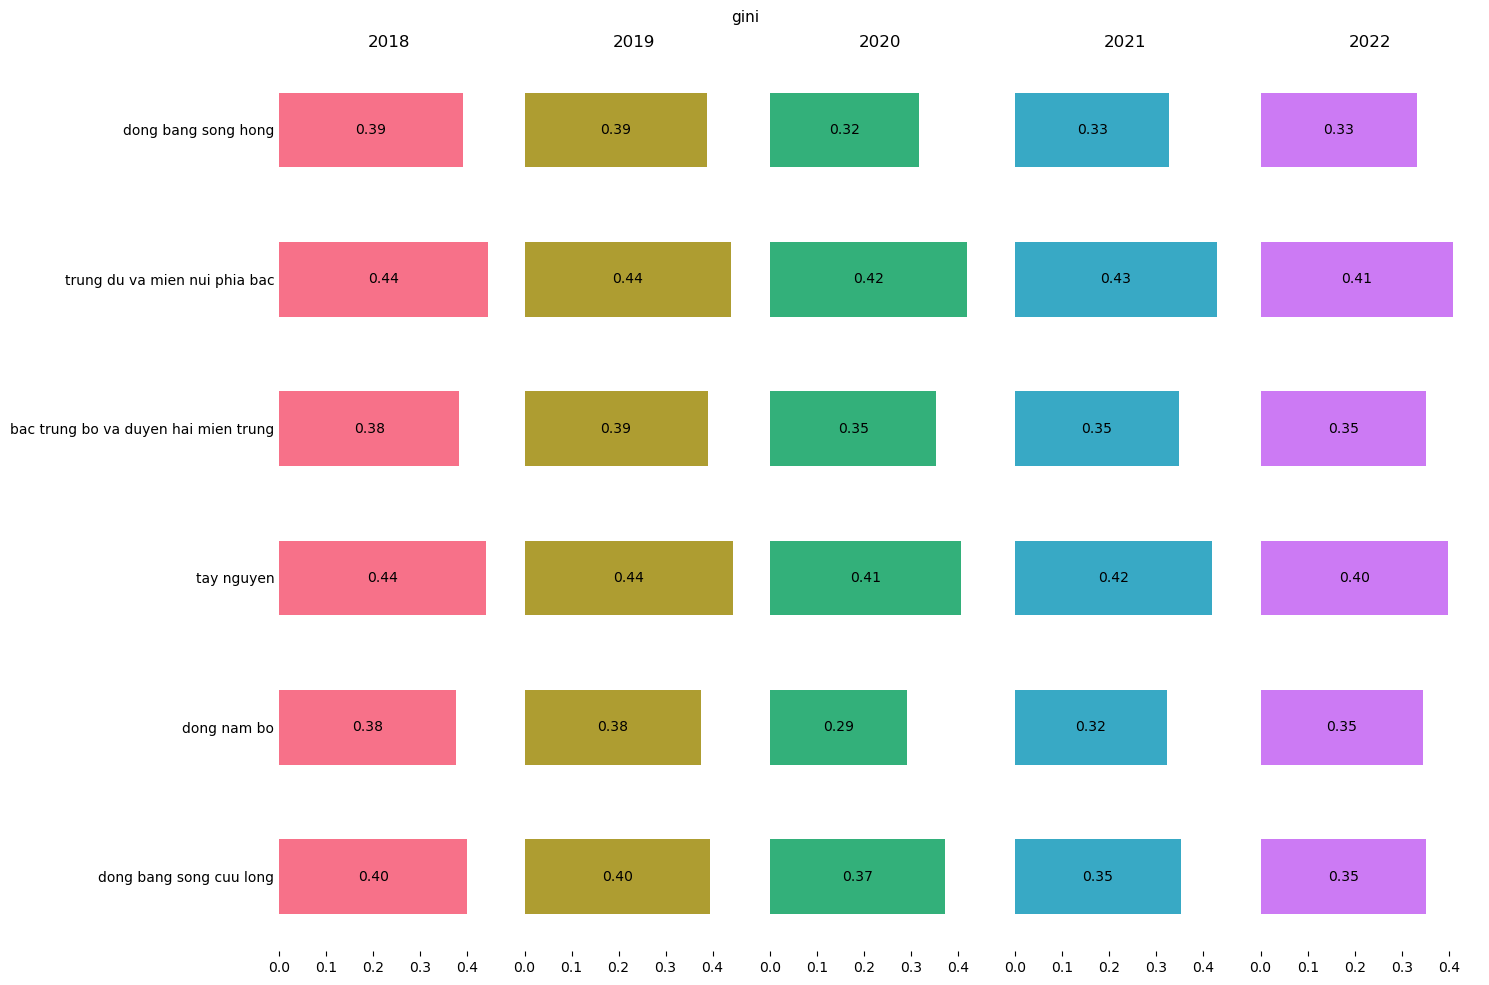

            2018       2019       2020       2021       2022
count  63.000000  63.000000  63.000000  63.000000  63.000000
mean    0.388635   0.347254   0.356095   0.354873   0.356254
std     0.036553   0.057649   0.061680   0.069686   0.049095
min     0.315000   0.236000   0.249000   0.203000   0.236000
25%     0.367500   0.306000   0.318500   0.314000   0.322000
50%     0.384000   0.334000   0.354000   0.356000   0.350000
75%     0.415000   0.380500   0.394500   0.399000   0.375500
max     0.487000   0.488000   0.501000   0.525000   0.493000
           2018      2019      2020      2021      2022
count  6.000000  6.000000  6.000000  6.000000  6.000000
mean   0.405333  0.404500  0.360000  0.365667  0.364833
std    0.029595  0.028676  0.050012  0.045959  0.030838
min    0.375000  0.375000  0.291000  0.322000  0.333000
25%    0.384750  0.387500  0.326250  0.332000  0.347250
50%    0.395000  0.392000  0.363000  0.349500  0.351500
75%    0.430000  0.427250  0.397500  0.401500  0.387250
max

In [74]:
report(gini, None, ['2018', '2019', '2020', '2021', '2022'], 'gini')

### Tỷ lệ lao động có việc làm phi chính thức phân theo địa phương

In [71]:
tlld_ct = preprocess_df(lvt.copy(), features[11], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [60]:
print(tlld_ct.Province.nunique())
print(tlld_ct.Sub_Feature.unique())

69
[nan]


In [61]:
tlld_ct[years].isnull().sum()

2002          69
2003          69
2004          69
2005          69
2006          69
2007          69
2008          69
2009          69
2010          69
2011          69
2012          69
2013          69
2014          69
2015          69
2016          69
2017          69
2018          69
2019          69
2020          69
2021           0
Sơ bộ 2021    69
2022          69
Sơ bộ 2022     0
dtype: int64

In [50]:
sc_11 = extract_feature(tlld_ct, None, years)
sc_11.shape

(63, 6)

In [40]:
sc_11 = tlld_ct[tlld_ct.Province.isin(province_name_preprocessed)]['2021'].tolist()
len(sc_11)

63

In [50]:
sc_11_model = extract_feature(tlld_ct, None, years_model)
sc_11_model.shape

(63, 4)

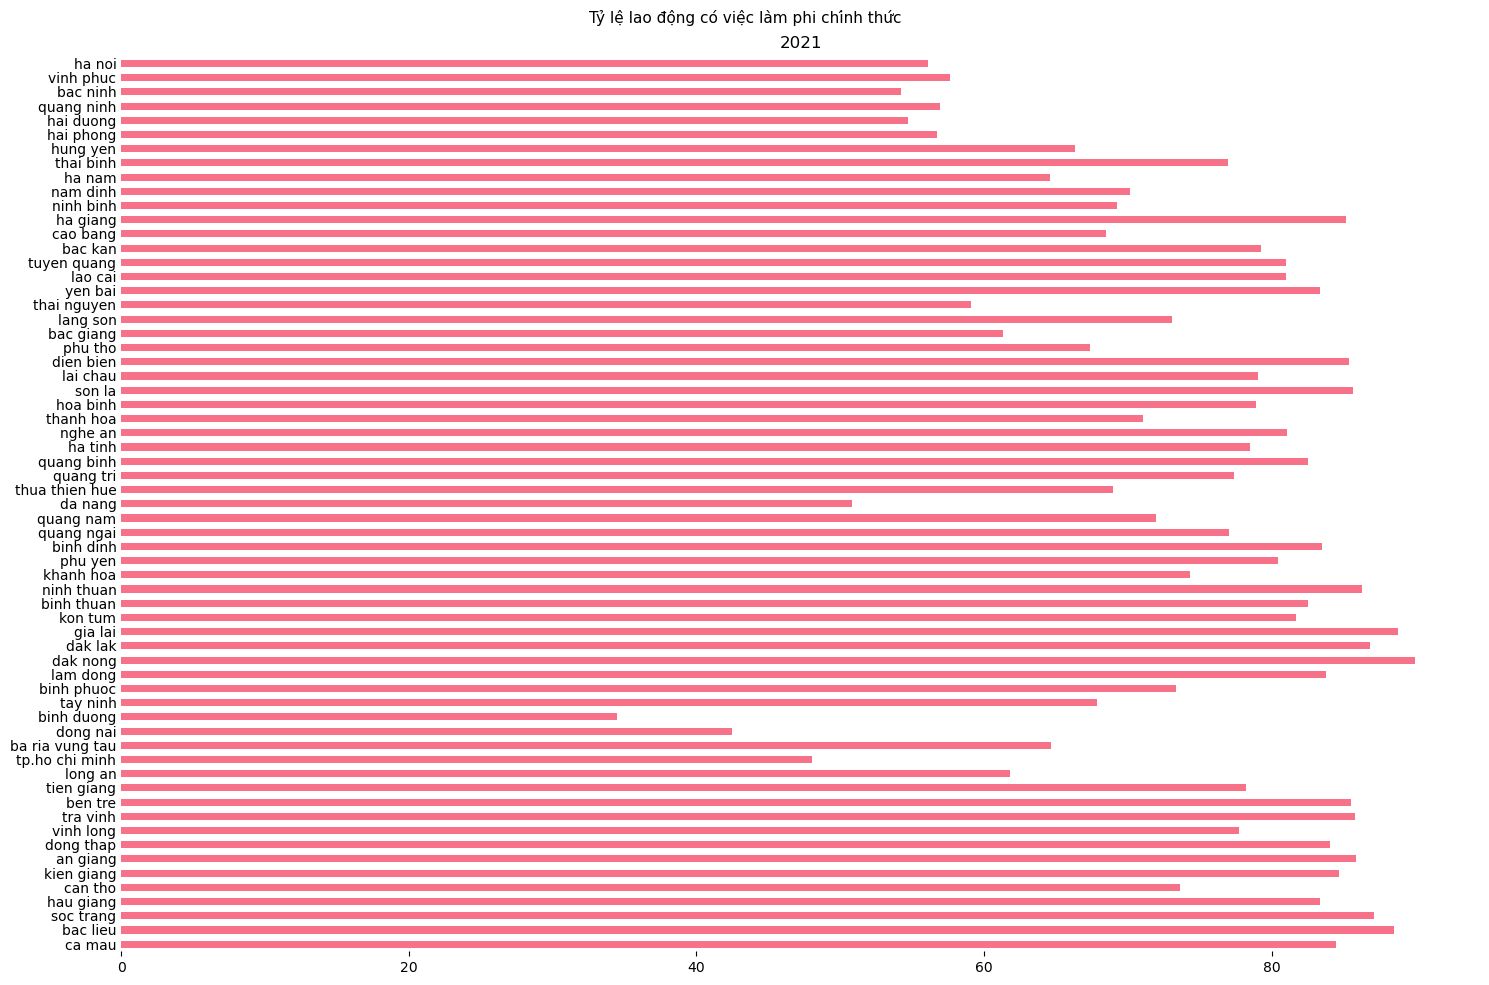

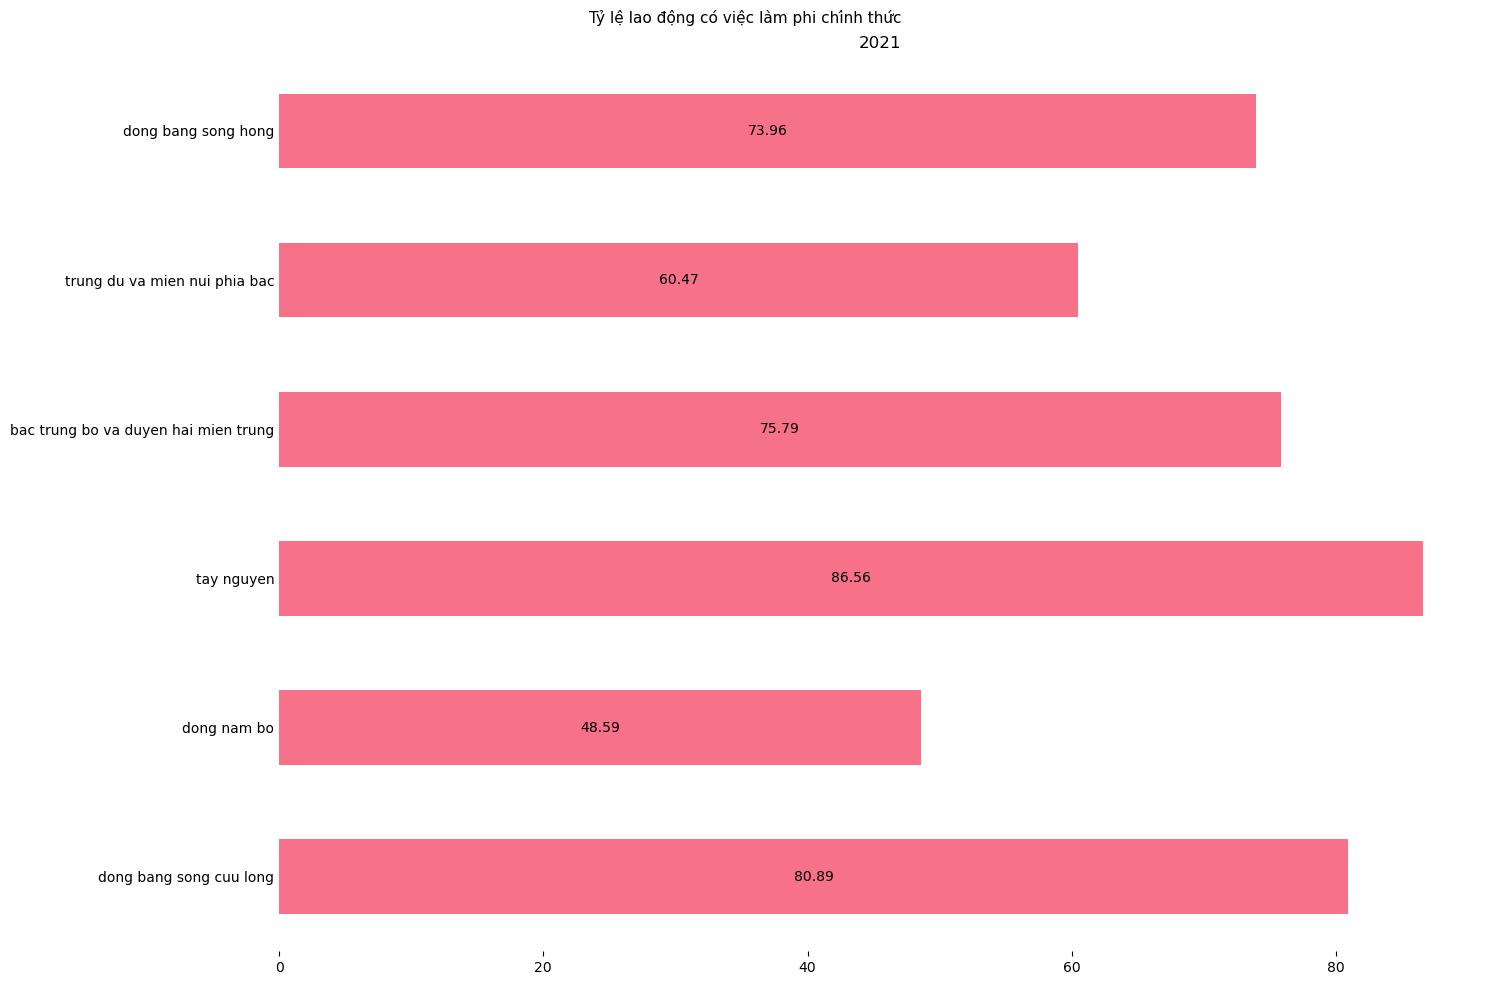

            2021
count  63.000000
mean   73.675556
std    12.627115
min    34.490000
25%    66.845000
50%    77.760000
75%    83.670000
max    90.000000
            2021
count   6.000000
mean   71.043333
std    14.033596
min    48.590000
25%    63.842500
50%    74.875000
75%    79.615000
max    86.560000
2021:
dak nong, TN: 90.0
gia lai, TN: 88.78
bac lieu, DBSCL: 88.52
soc trang, DBSCL: 87.14
dak lak, TN: 86.82
------------------------------
count    63.000000
mean     73.675556
std      12.627115
min      34.490000
25%      66.845000
50%      77.760000
75%      83.670000
max      90.000000
dtype: float64
binh duong  |  dak nong
count     6.000000
mean     71.043333
std      14.033596
min      48.590000
25%      63.842500
50%      74.875000
75%      79.615000
max      86.560000
dtype: float64
dong nam bo  |  tay nguyen


In [72]:
report(tlld_ct, None, ['2021'], 'Tỷ lệ lao động có việc làm phi chính thức')

### Thu nhập bình quân đầu người một tháng (Nghìn đồng) - Nhóm thu nhập thấp nhất

In [51]:
tnbqdn_thapnhat = preprocess_df(lvt.copy(), features[12], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [52]:
print(tnbqdn_thapnhat.Province.nunique())
print(tnbqdn_thapnhat.Sub_Feature.unique())

69
[nan]


In [53]:
tnbqdn_thapnhat[years].isnull().sum()

2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64

In [54]:
for col in ['2018', '2019', '2020', '2021', 'Sơ bộ 2021', 'Sơ bộ 2022']:
    tnbqdn_thapnhat[col] = tnbqdn_thapnhat[col].apply(lambda x: x if re.match(r'^\d\.\d+$', str((x))) else x/1000)

In [55]:
sc_12 = extract_feature(tnbqdn_thapnhat, None, years)
sc_12.shape

(63, 6)

In [43]:
sc_12 = tnbqdn_thapnhat[tnbqdn_thapnhat.Province.isin(province_name_preprocessed)][['2018', '2019', '2020', '2021']].mean(axis=1).tolist()
len(sc_12)

63

In [53]:
sc_12_model = extract_feature(tnbqdn_thapnhat, None, years_model)
sc_12_model.shape

(63, 4)

In [ ]:
sc

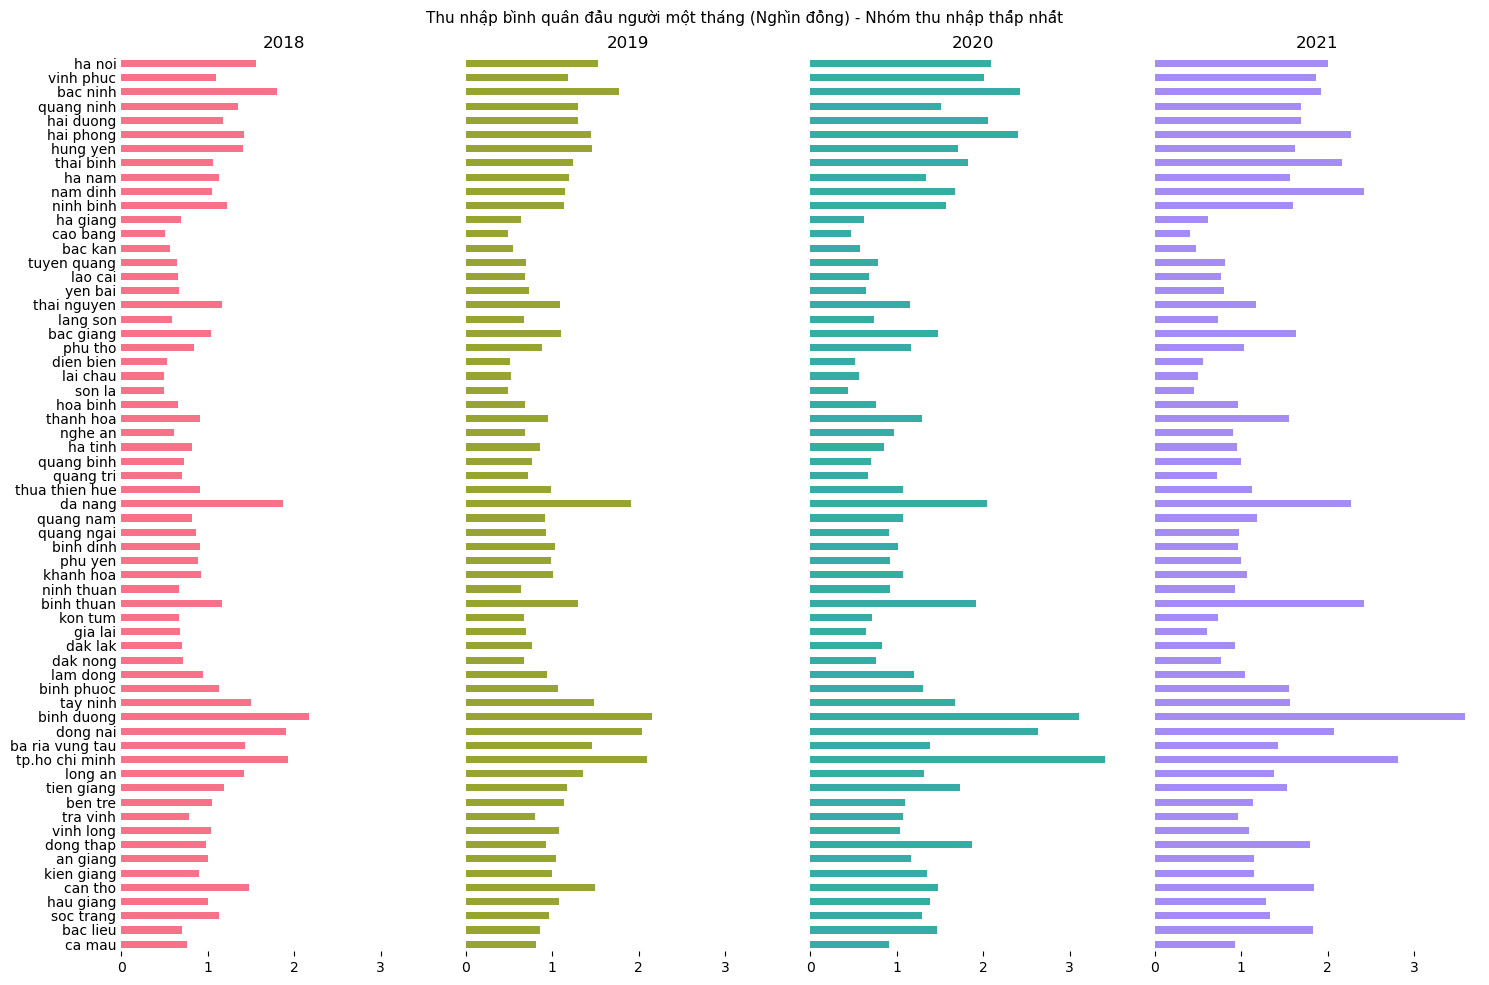

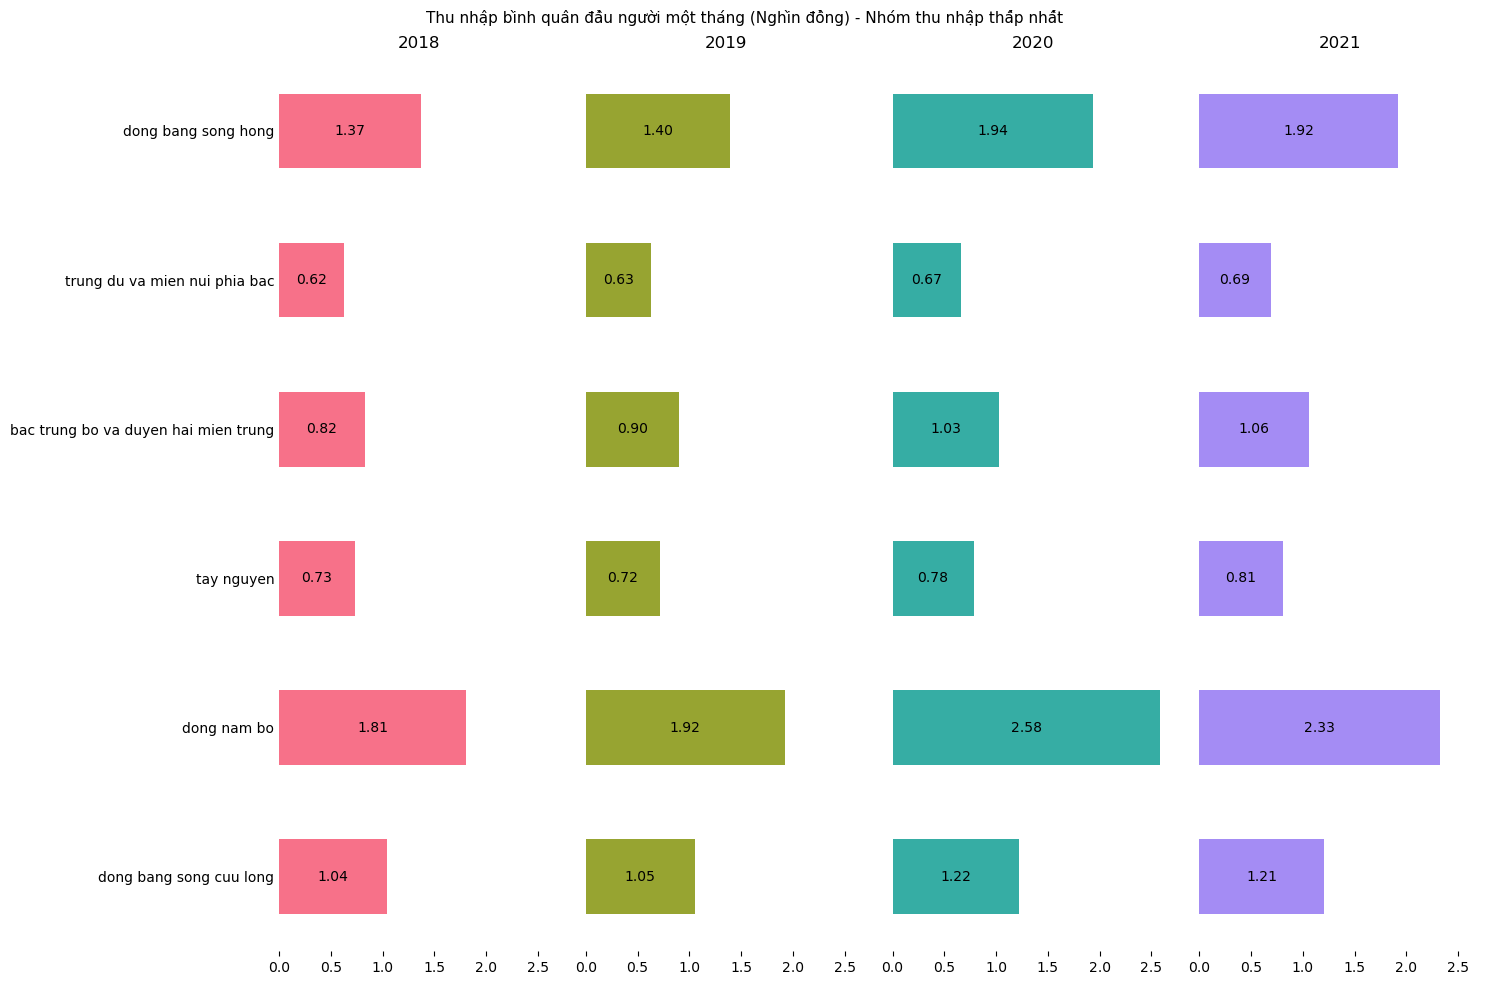

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean    1.012286   1.045698   1.292238   1.320889
std     0.388785   0.393178   0.631121   0.625498
min     0.494000   0.484000   0.439000   0.410000
25%     0.703500   0.725500   0.808000   0.924000
50%     0.924000   0.980000   1.164000   1.141000
75%     1.167500   1.218500   1.619000   1.665500
max     2.177000   2.152000   3.406000   3.581000
           2018      2019      2020      2021
count  6.000000  6.000000  6.000000  6.000000
mean   1.066667  1.102500  1.370167  1.334833
std    0.450710  0.485074  0.744480  0.650008
min    0.622000  0.626000  0.665000  0.691000
25%    0.753750  0.765000  0.844000  0.869000
50%    0.932500  0.975000  1.127000  1.133000
75%    1.290500  1.309500  1.759500  1.741250
max    1.809000  1.923000  2.582000  2.327000
2018:
binh duong, DNB: 2.177
tp.ho chi minh, DNB: 1.928
dong nai, DNB: 1.902
da nang, BTBDHMT: 1.871
bac ninh, DBSH: 1.802
-------------

In [85]:
report(tnbqdn_thapnhat, None, ['2018', '2019', '2020', '2021'], 'Thu nhập bình quân đầu người một tháng (Nghìn đồng) - Nhóm thu nhập thấp nhất')

### Thu nhập bình quân một lao động đang làm việc

In [56]:
tnbq_motld = preprocess_df(lvt.copy(), features[13], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [69]:
print(tnbq_motld.Province.nunique())
print(tnbq_motld.Sub_Feature.unique())

69
[nan]


In [57]:
tnbq_motld[years].isnull().sum()

2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64

In [58]:
sc_13 = extract_feature(tnbq_motld, None, years)
sc_13.shape

(63, 6)

In [45]:
sc_13 = tnbq_motld[tnbq_motld.Province.isin(province_name_preprocessed)][['2018', '2019', '2020', '2021']].mean(axis=1).tolist()
len(sc_13)

63

In [55]:
sc_13_model = extract_feature(tnbq_motld, None, years_model)
sc_13_model.shape

(63, 4)

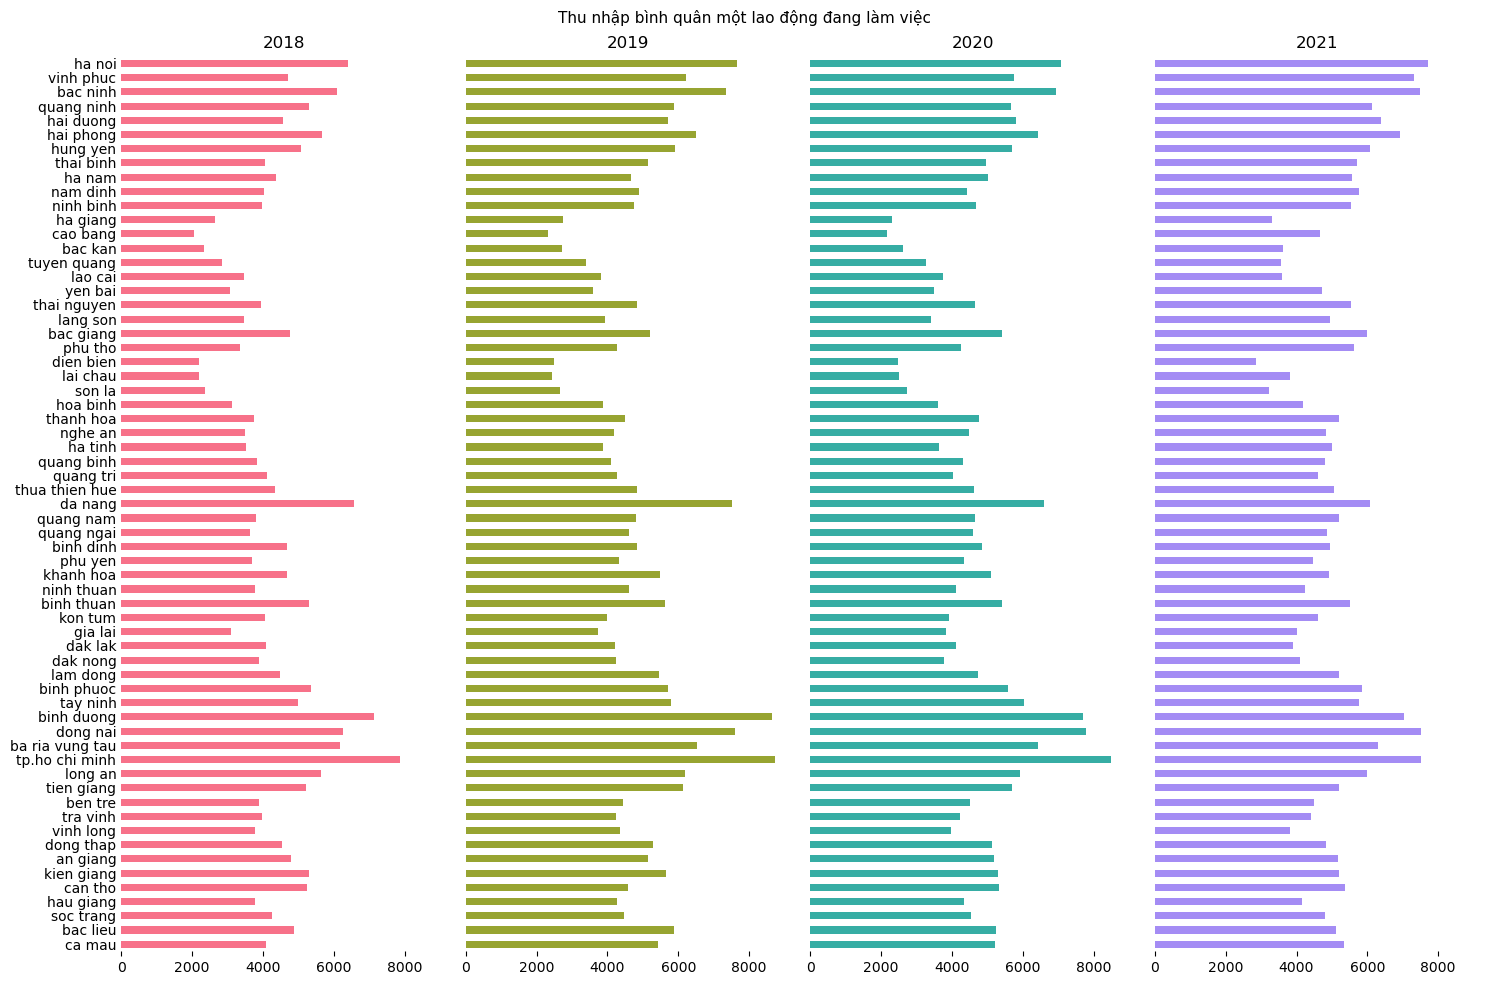

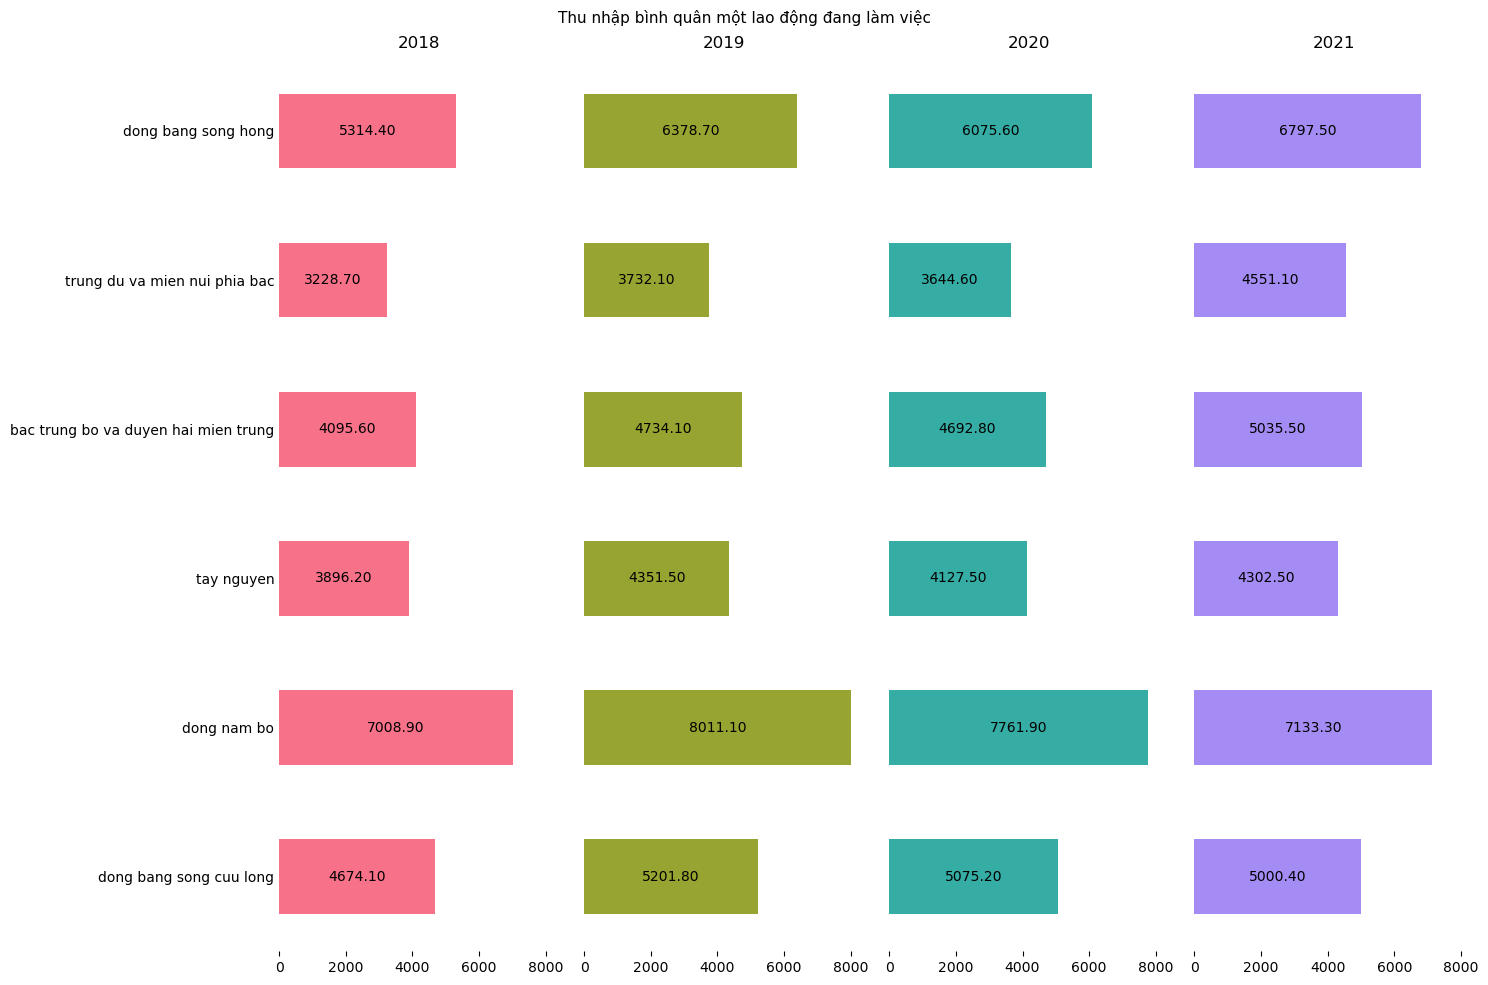

              2018         2019         2020         2021
count    63.000000    63.000000    63.000000    63.000000
mean   4318.430159  4940.034921  4785.987302  5168.053968
std    1206.789565  1407.132547  1323.109794  1115.611814
min    2059.800000  2329.900000  2166.400000  2847.600000
25%    3662.300000  4195.150000  4001.050000  4476.350000
50%    4091.100000  4751.700000  4643.100000  5112.400000
75%    5031.500000  5716.200000  5494.500000  5758.600000
max    7858.700000  8743.000000  8486.300000  7711.700000
              2018         2019         2020         2021
count     6.000000     6.000000     6.000000     6.000000
mean   4702.983333  5401.550000  5229.600000  5470.050000
std    1333.059749  1558.180426  1494.463268  1195.455645
min    3228.700000  3732.100000  3644.600000  4302.500000
25%    3946.050000  4447.150000  4268.825000  4663.425000
50%    4384.850000  4967.950000  4884.000000  5017.950000
75%    5154.325000  6084.475000  5825.500000  6357.000000
max    7008.90

In [87]:
report(tnbq_motld, None, ['2018', '2019', '2020', '2021'], 'Thu nhập bình quân một lao động đang làm việc')

### Thu nhập bình quân đầu người một tháng (Nghìn đồng) - Nhóm thu nhập cao nhất

In [59]:
tnbqdn_caonhat = preprocess_df(lvt.copy(), features[14], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [60]:
print(tnbqdn_caonhat.Province.nunique())
print(tnbqdn_caonhat.Sub_Feature.unique())

69
[nan]


In [61]:
tnbqdn_caonhat[years].isnull().sum()

2018           0
2019           0
2020           0
2021           0
Sơ bộ 2021    69
Sơ bộ 2022     0
dtype: int64

In [62]:
sc_14 = extract_feature(tnbqdn_caonhat, None, years)
sc_14.shape

(63, 6)

In [47]:
sc_14 = tnbqdn_caonhat[tnbqdn_caonhat.Province.isin(province_name_preprocessed)][['2018', '2019', '2020', '2021']].mean(axis=1).tolist()
len(sc_14)

63

In [57]:
sc_14_model = extract_feature(tnbqdn_caonhat, None, years_model)
sc_14_model.shape

(63, 4)

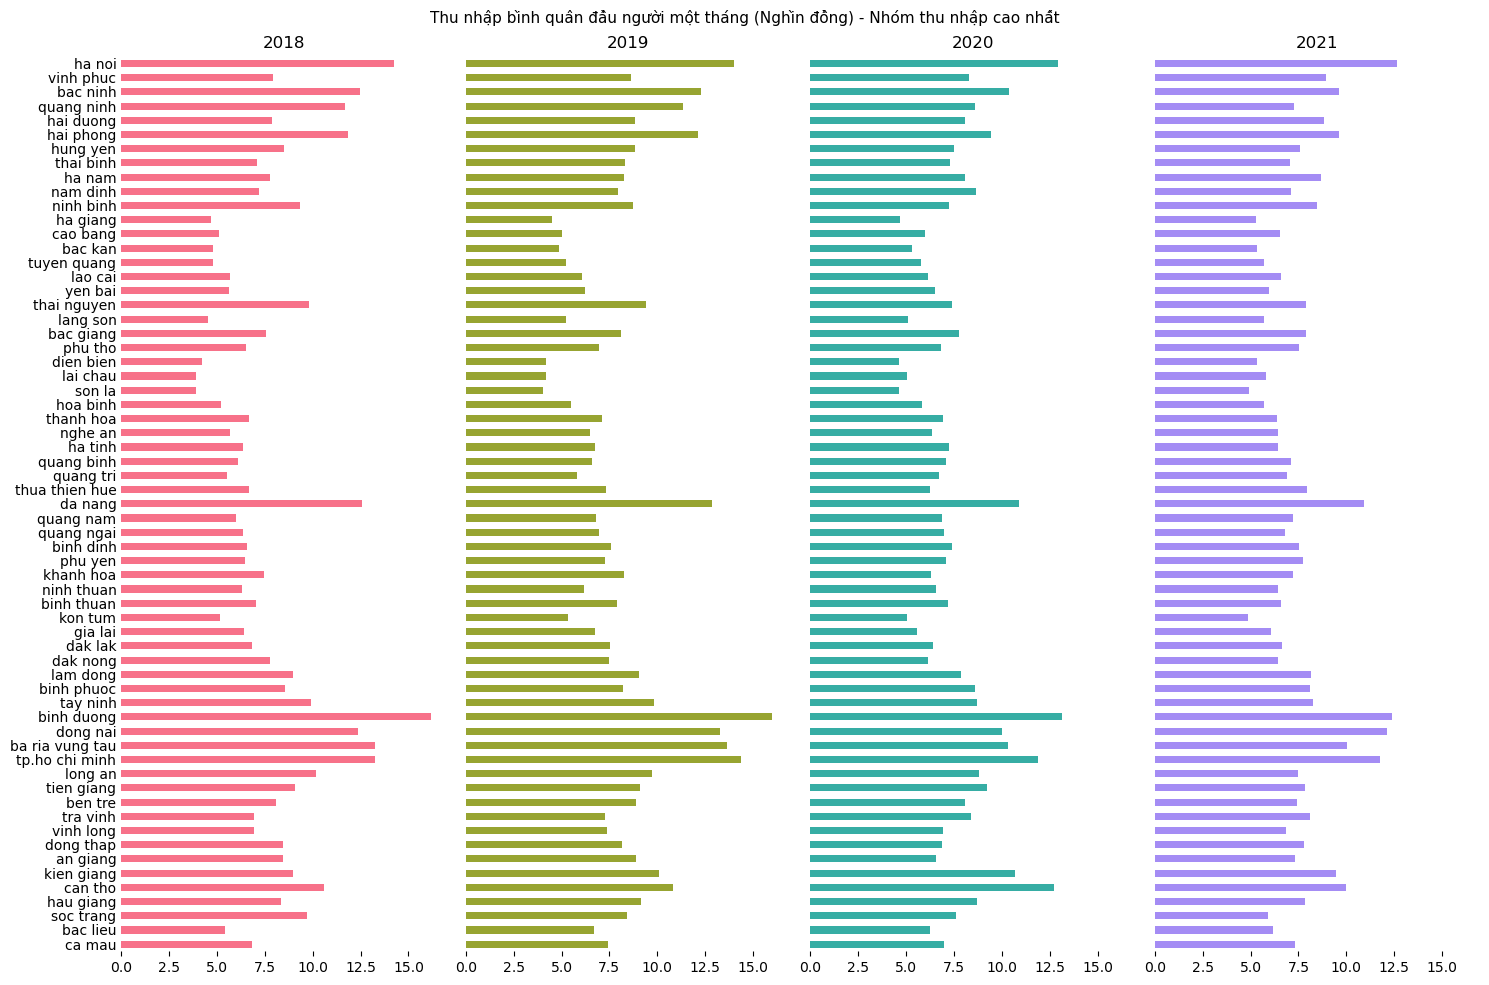

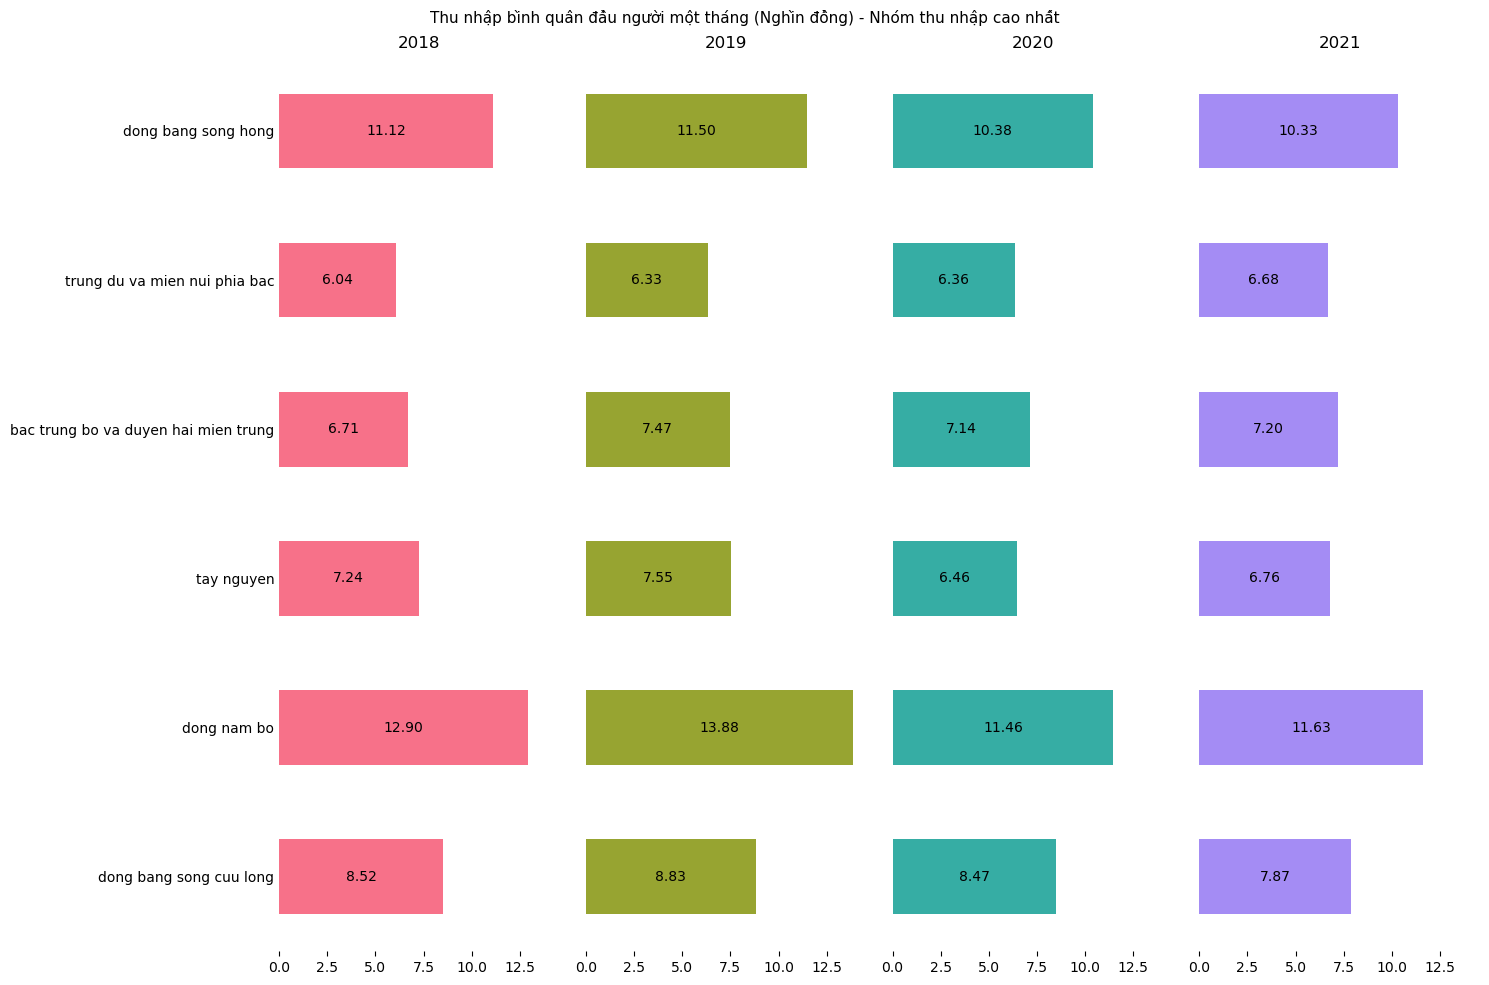

            2018       2019       2020       2021
count  63.000000  63.000000  63.000000  63.000000
mean    7.849270   8.193317   7.610222   7.582698
std     2.716302   2.642870   1.983576   1.775755
min     3.890000   4.014000   4.624000   4.886000
25%     6.058500   6.630500   6.317500   6.429500
50%     7.090000   7.883000   7.193000   7.292000
75%     9.029000   9.073000   8.600500   8.118500
max    16.171000  15.993000  13.119000  12.631000
            2018       2019       2020       2021
count   6.000000   6.000000   6.000000   6.000000
mean    8.754833   9.259167   8.379333   8.412333
std     2.707298   2.872741   2.135870   2.075253
min     6.044000   6.327000   6.360000   6.682000
25%     6.842750   7.488250   6.632000   6.870000
50%     7.878000   8.190000   7.804000   7.534000
75%    10.468750  10.836500   9.906000   9.717500
max    12.899000  13.875000  11.460000  11.630000
2018:
binh duong, DNB: 16.171
ha noi, DBSH: 14.225
ba ria vung tau, DNB: 13.276
tp.ho chi minh, DNB:

In [89]:
report(tnbqdn_caonhat, None, ['2018', '2019', '2020', '2021'], 'Thu nhập bình quân đầu người một tháng (Nghìn đồng) - Nhóm thu nhập cao nhất')

### Số lao động có việc làm trong nền kinh tế phân theo địa phương. Đơn vị tính Nghìn người

In [63]:
ld_cvl = preprocess_df(lvt.copy(), features[15], vung_mien_name, province_name)

C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: clean_province(x))
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].apply(lambda x: unidecode(x).lower())
C:\Users\acer\AppData\Local\Temp\ipykernel_5508\691901521.py:23: FutureWarning: The default value of regex will change from True to False in a future ver

In [77]:
print(ld_cvl.Province.nunique())
print(ld_cvl.Sub_Feature.unique())

69
[nan]


In [78]:
ld_cvl[years].isna().sum()

2002          69
2003          69
2004          69
2005          69
2006          69
2007          69
2008          69
2009          69
2010          69
2011          69
2012          69
2013          69
2014          69
2015          69
2016          69
2017          69
2018          69
2019          69
2020          69
2021           0
Sơ bộ 2021    69
2022          69
Sơ bộ 2022     0
dtype: int64

In [64]:
sc_15 = ld_cvl[ld_cvl.Province.isin(province_name_preprocessed)]['2021'].tolist()
len(sc_15)

63

In [65]:
sc_15 = extract_feature(ld_cvl, None, years)
sc_15.shape

(63, 6)

In [59]:
sc_15_model = extract_feature(ld_cvl, None, years_model)
sc_15_model.shape

(63, 4)

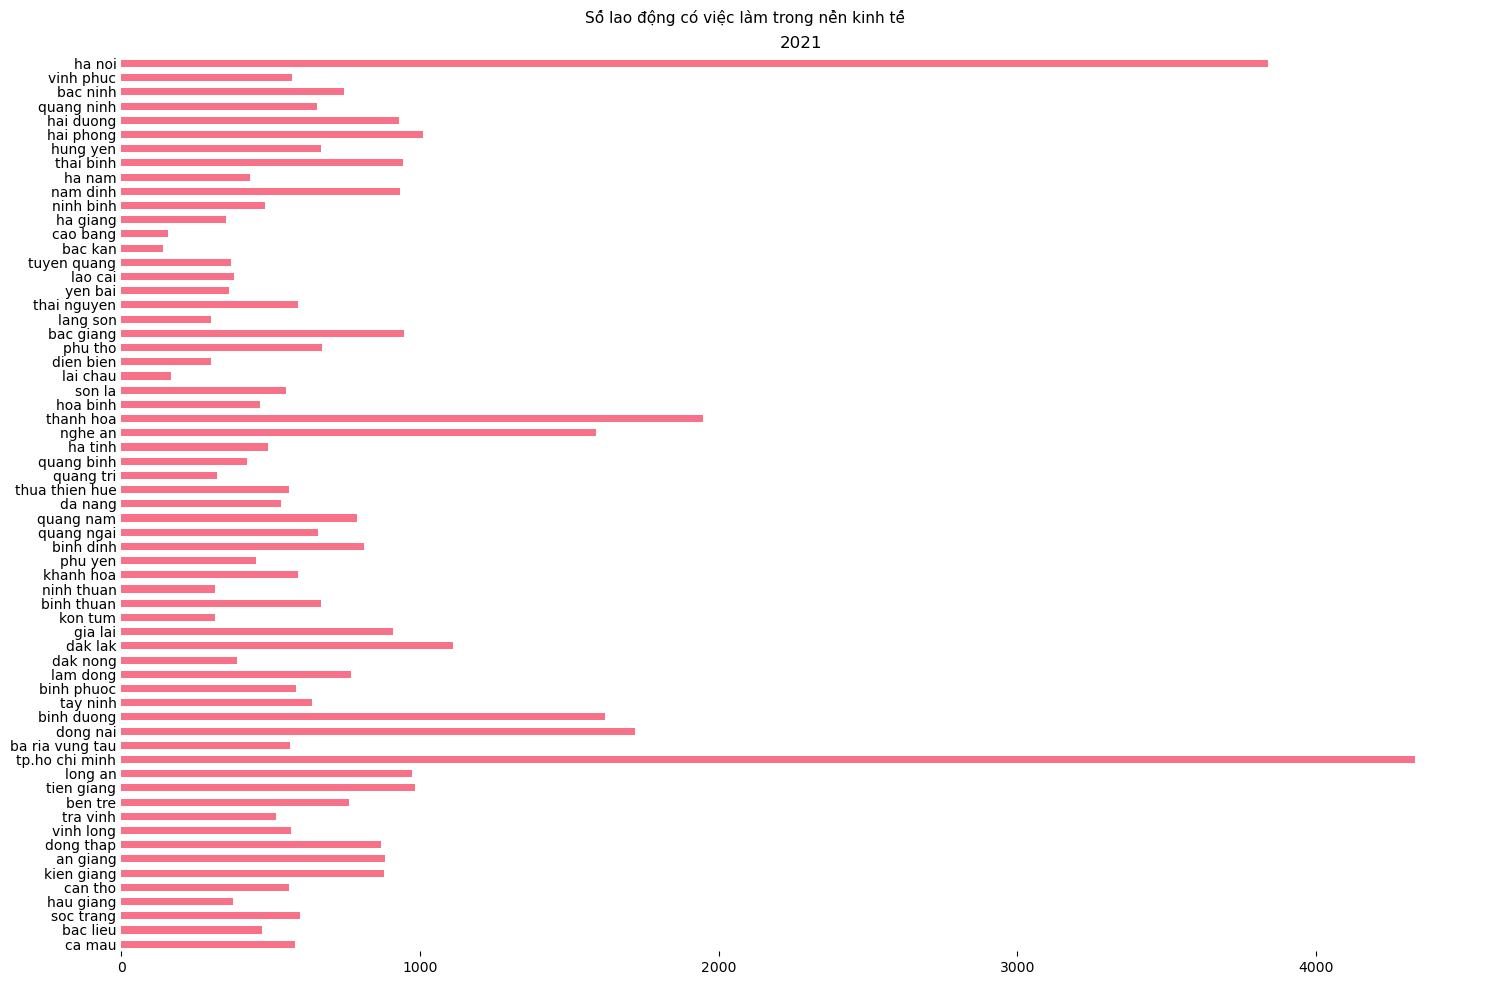

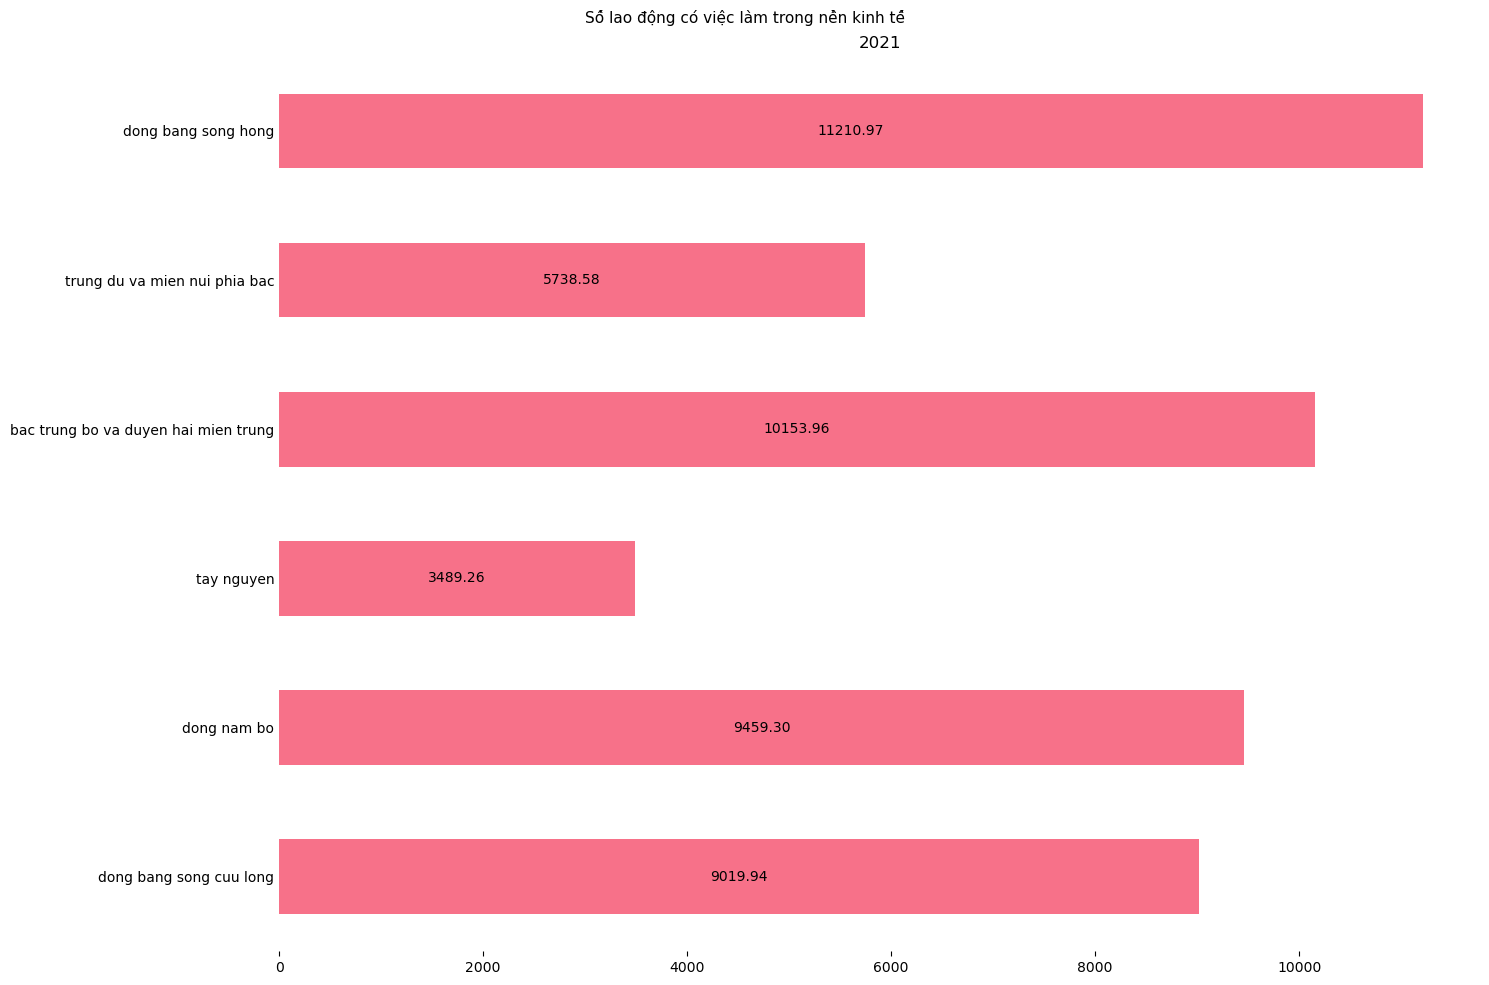

              2021
count    63.000000
mean    778.920476
std     703.432005
min     140.080000
25%     441.755000
50%     590.140000
75%     880.895000
max    4331.540000
               2021
count      6.000000
mean    8178.668333
std     2945.809486
min     3489.260000
25%     6558.920000
50%     9239.620000
75%     9980.295000
max    11210.970000
2021:
tp.ho chi minh, DNB: 4331.54
ha noi, DBSH: 3839.69
thanh hoa, BTBDHMT: 1947.97
dong nai, DNB: 1719.64
binh duong, DNB: 1620.42
------------------------------
count      63.000000
mean      778.920476
std       703.432005
min       140.080000
25%       441.755000
50%       590.140000
75%       880.895000
max      4331.540000
dtype: float64
bac kan  |  tp.ho chi minh
count        6.000000
mean      8178.668333
std       2945.809486
min       3489.260000
25%       6558.920000
50%       9239.620000
75%       9980.295000
max      11210.970000
dtype: float64
tay nguyen  |  dong bang song hong


In [92]:
report(ld_cvl, None, ['2021'], 'Số lao động có việc làm trong nền kinh tế')

## Create metrics for model

In [66]:
features_corr = [sc_0,sc_0_1,sc_1,sc_3,sc_4,sc_5,sc_6,sc_7,sc_9,sc_10,sc_11,sc_12,sc_13,sc_14,sc_15]

In [67]:
mean_features = [np.nanmean(i, axis=1) for i in features_corr]

In [68]:
def find_nan_indices(yte_mean):
    nan_indices = [idx for idx, arr in enumerate(yte_mean) if np.all(np.isnan(arr))]
    return nan_indices

find_nan_indices(mean_features)

[]

In [70]:
import pickle
with open('lvt_corr.pkl', 'wb') as f:
    pickle.dump(mean_features, f)

In [60]:
features_model = [sc_0_model,sc_0_1_model,sc_1_model,sc_3_model,sc_4_model,sc_5_model,sc_6_model,sc_7_model,sc_8_model,sc_9_model,sc_10_model,sc_11_model,sc_12_model,sc_13_model,sc_14_model,sc_15_model]
len(features_model)

16

In [ ]:
import pickle
with open('lvt_features.pkl', 'wb') as f:
    pickle.dump(features_model, f)

### Create metric

In [58]:
score = []
for i in range(16):
    var = 'sc_' + str(i)
    score.append(locals()[var])
score.insert(1, sc_0_1)

In [59]:
name_col = ['fea_' + str(i) for i in range(16)]
name_col.insert(1, 'fea_0_1')

In [60]:
lvt_metric_df = pd.DataFrame(score).transpose()
lvt_metric_df.columns = name_col
lvt_metric_df['Province'] = province_name_preprocessed

In [292]:
1/16

0.0625

In [84]:
weights = [
    0.0625, #1.0
    -0.0625, #1.1
    0.0625,
    0.0625,
    -0.0625,
    0.0625,
    0.0625,
    0.0625,
    0.0625,
    -0.0625,
    -0.0625,
    -0.0625,
    -0.0625,
    0.0625,
    0.0625,
    0.0625,
    0.0625
]

In [53]:
from sklearn.preprocessing import MinMaxScaler
col_fea = lvt_metric_df.columns.drop('Province')
# lvt_metric_df[col_fea] = lvt_metric_df[col_fea] * weights
scaler = MinMaxScaler(feature_range=(0, 1))
lvt_metric_df[col_fea] = scaler.fit_transform(lvt_metric_df[col_fea])

In [61]:
lvt_metric_df.set_index('Province', inplace=True)

In [64]:
lvt_metric_df.reset_index().to_csv("lvt_metric_for_model.csv", index=False)

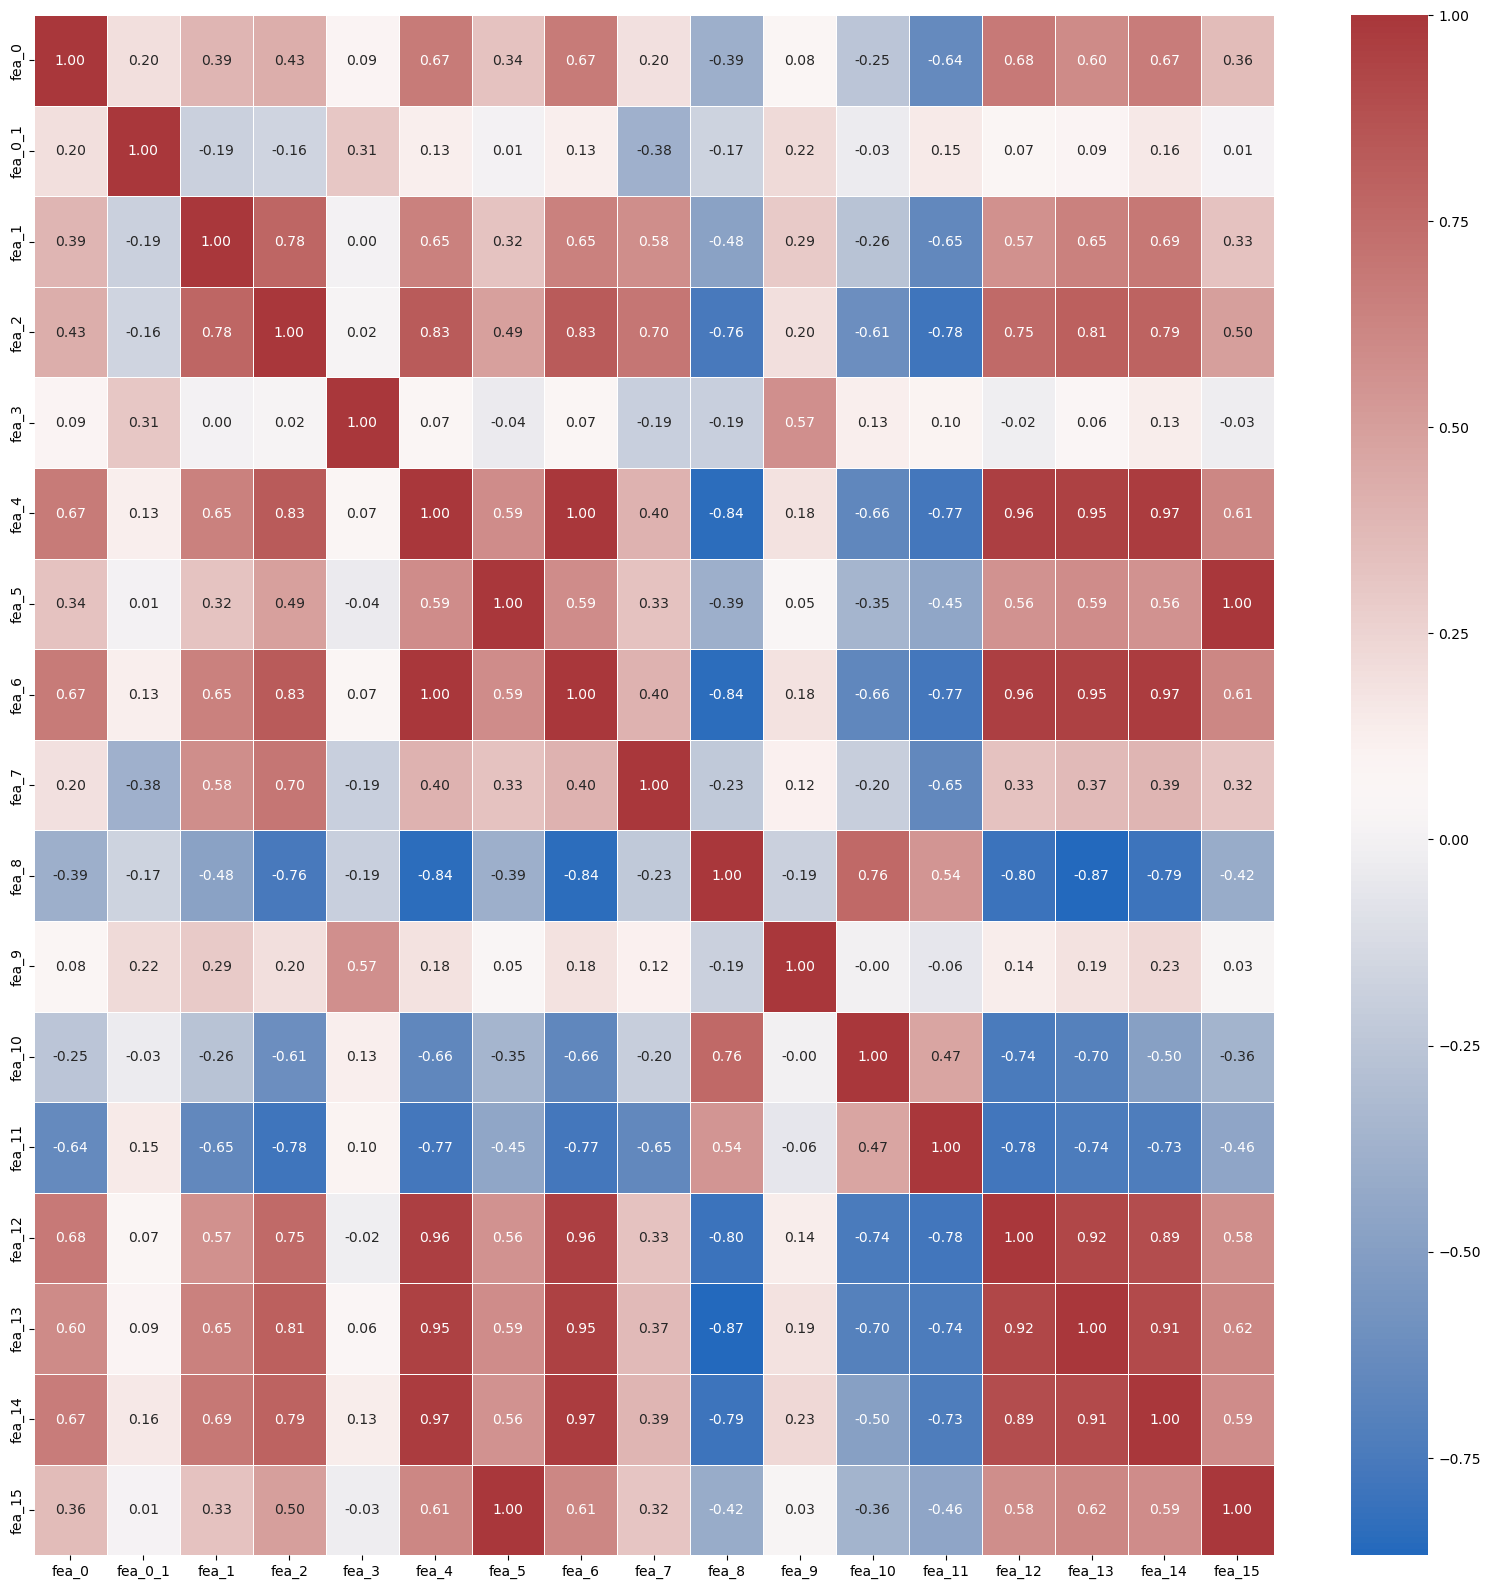

In [119]:
plt.figure(figsize=(20,20))
sns.heatmap(lvt_metric_df[col_fea].corr(), cmap=sns.color_palette("vlag", as_cmap=True), annot=True, fmt='.2f', linewidths=.5)
plt.show()

In [202]:
features[13]

'Thu nhập bình quân một lao động đang làm việc'

In [197]:
features[0]

'Tỷ suất nhập cư, xuất cư và di cư thuần phân theo địa phương chia theo Tỉnh-Thành phố, Tỷ suất và Năm'

[     2019   2020   2021    Province
 73    8.8   6.26   7.68      ha noi
 75    2.5   2.16   2.31   vinh phuc
 76   21.4  40.92  45.66    bac ninh
 77    2.4   0.95   0.37  quang ninh
 78    2.5   2.46   1.01   hai duong
 ..    ...    ...    ...         ...
 137   9.0  14.44  12.46     can tho
 138   2.3   1.32   1.08   hau giang
 139   1.2   1.02   0.93   soc trang
 140   1.4   3.26   0.31    bac lieu
 141   1.3   0.68   0.82      ca mau
 
 [63 rows x 4 columns],
       2019   2020   2021
 213  0.799  0.799  0.809
 214  0.749  0.751  0.765
 215  0.764  0.768  0.771
 216  0.769  0.769  0.778
 217  0.728  0.735  0.747
 ..     ...    ...    ...
 271  0.724  0.719  0.723
 272  0.664  0.674  0.686
 273  0.640  0.647  0.655
 274  0.648  0.652  0.659
 275  0.661  0.668  0.672
 
 [63 rows x 3 columns]]

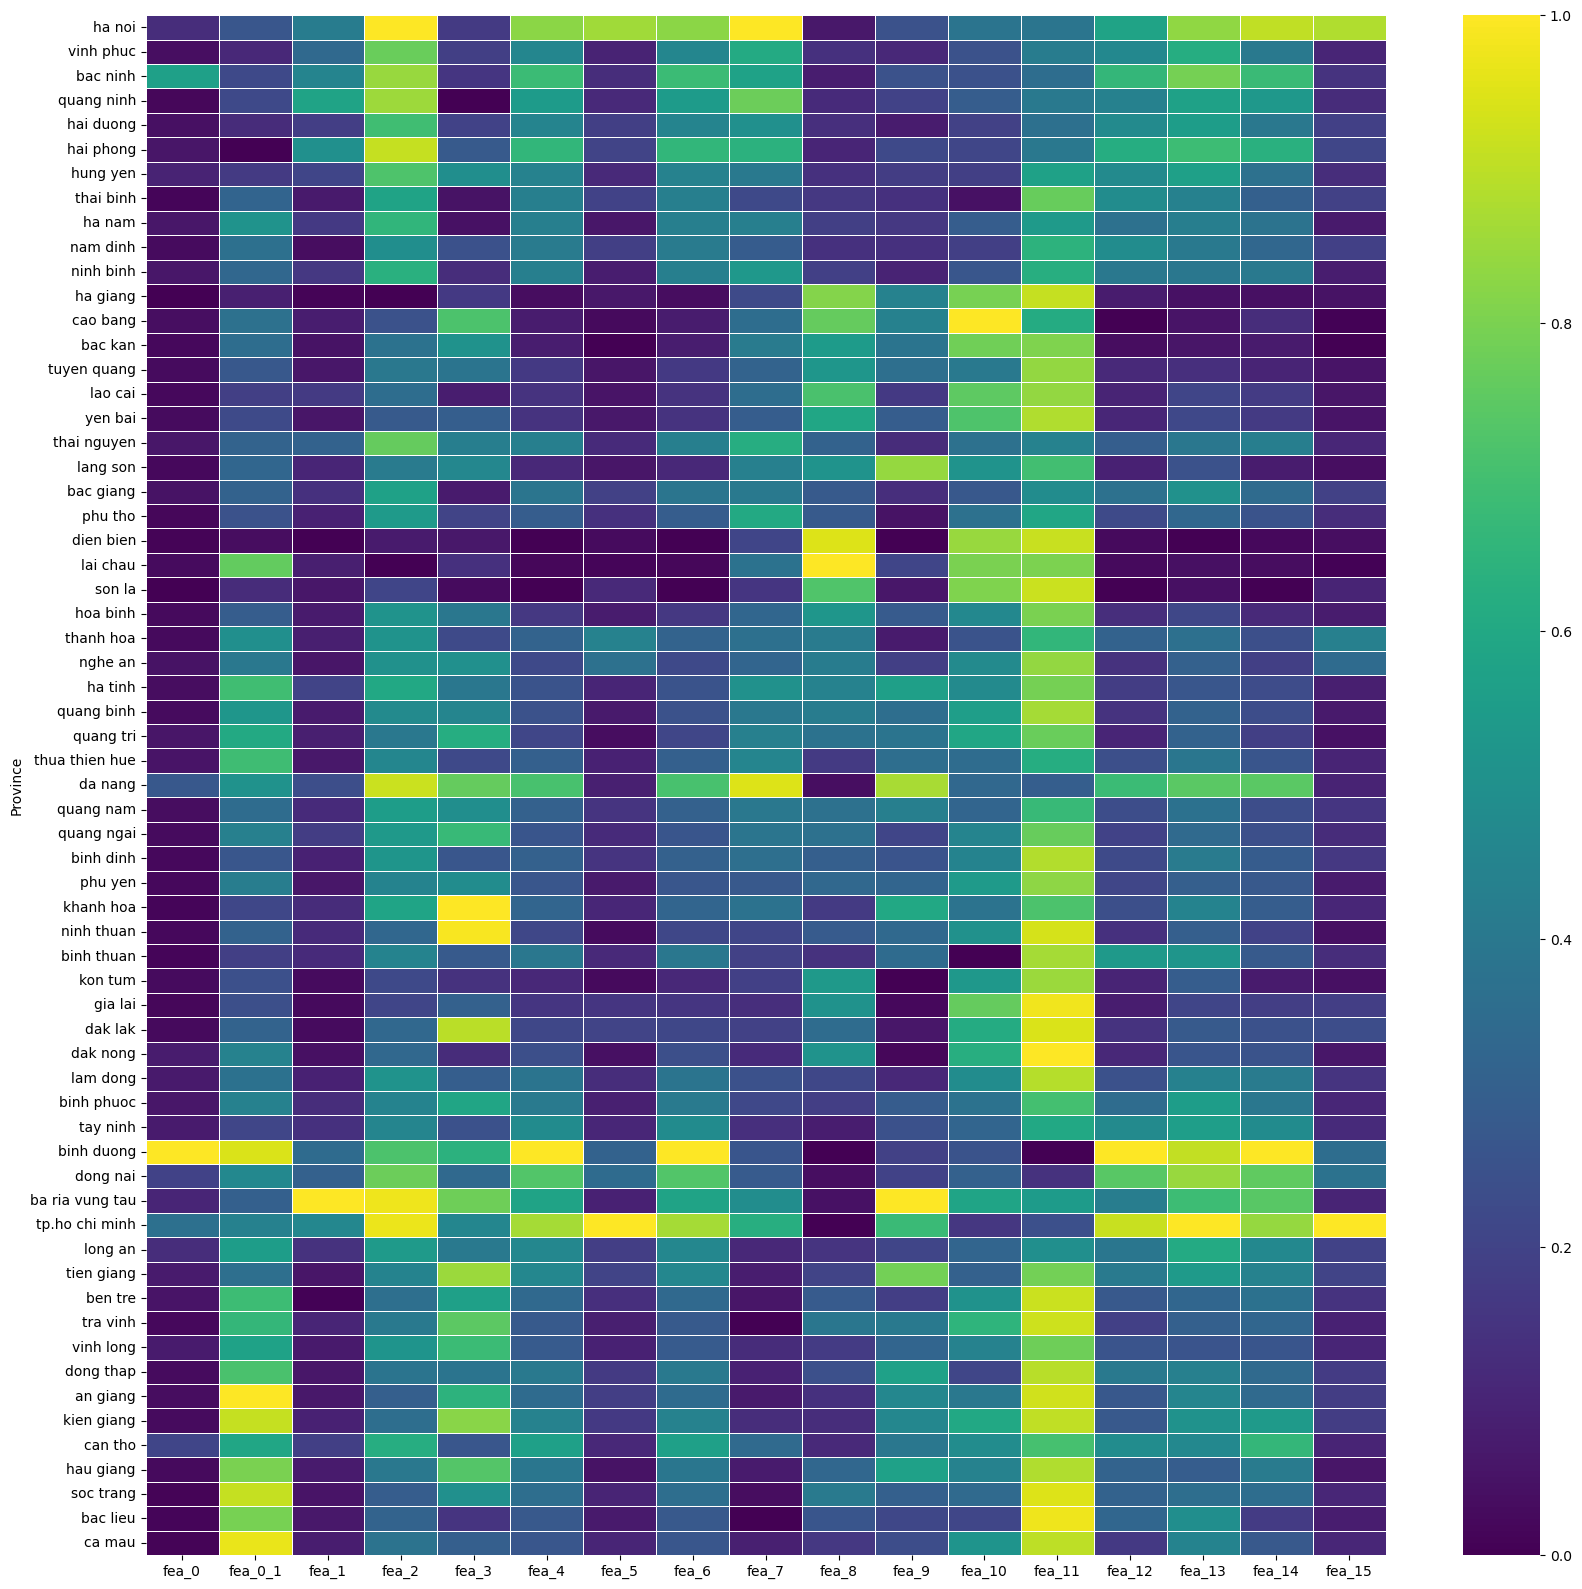

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(lvt_metric_df, cmap='viridis', annot=False, fmt='.4f', linewidths=.5)
plt.show()

In [128]:
features[2]

'Chỉ số phát triển con người phân theo địa phương'

In [134]:
features[[1,2,4,6,7,12,13,14]]

array(['Năng suất lao động phân theo địa phương. Đơn vị tính Triệu đồngngười',
       'Chỉ số phát triển con người phân theo địa phương',
       'Thu nhập bình quân đầu người một tháng theo giá hiện hành phân theo địa phương chia theo Địa phương',
       'Thu nhập bình quân đầu người một tháng theo giá hiện hành phân theo trungn bình 5 nhóm thu nhập và phân theo địa phương chia theo Địa phương, Nhóm thu nhập và Năm',
       'Tỷ lệ lao động từ 15 tuổi trở lên đã qua đào tạo phân theo địa phương. Đơn vị tính',
       'Thu nhập bình quân đầu người một tháng (Nghìn đồng) - Nhóm thu nhập thấp nhất',
       'Thu nhập bình quân một lao động đang làm việc',
       'Thu nhập bình quân đầu người một tháng (Nghìn đồng) - Nhóm thu nhập cao nhất'],
      dtype=object)

In [356]:
lvt_metric_df_weighted = lvt_metric_df[col_fea] * weights
lvt_metric_df['score'] = lvt_metric_df_weighted.mean(axis=1)
scaler = MinMaxScaler()
lvt_metric_df['score'] = scaler.fit_transform(lvt_metric_df['score'].values.reshape(-1,1))

In [376]:
lvt_metric_df[['Province', 'score']].to_csv('lvt_metric_result.csv', index=False)

C:\Users\acer\AppData\Local\Temp\ipykernel_13156\4231953095.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lvt_metric_df.Province, rotation=90)


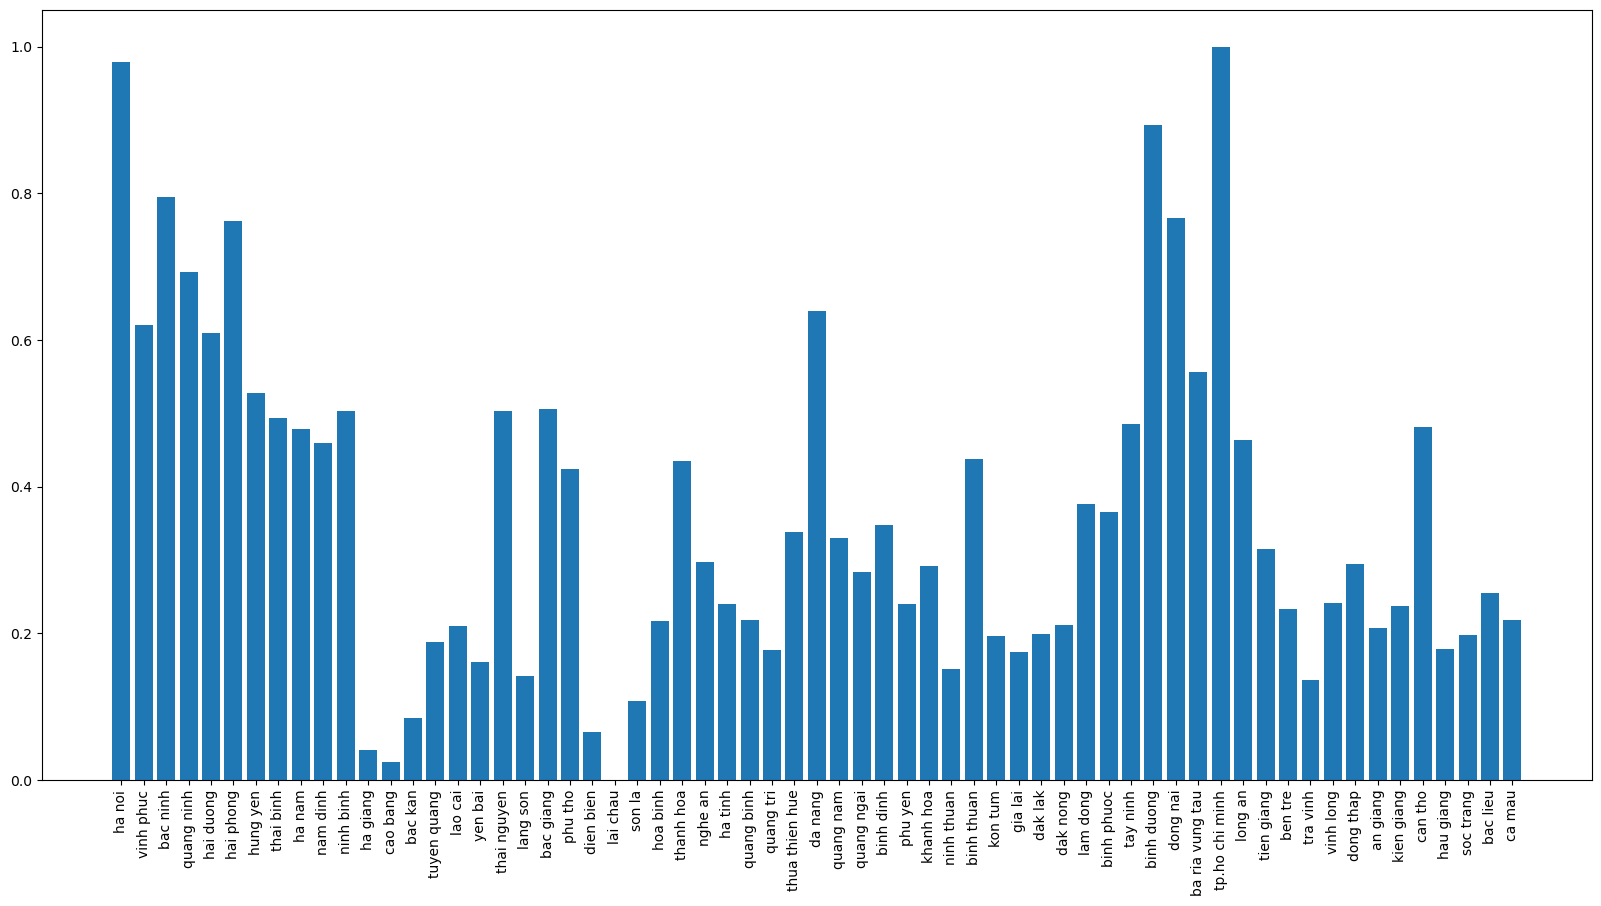

In [372]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(lvt_metric_df.Province, lvt_metric_df.score)
ax.set_xticklabels(lvt_metric_df.Province, rotation=90)

plt.show()

In [374]:
find_cluster('lai chau')

'TDMNPB'

In [377]:
score_df = lvt_metric_df[['Province', 'score']]

In [380]:
score_df[score_df.score > 0.4]

,Province,score
0,ha noi,0.978969
1,vinh phuc,0.620354
2,bac ninh,0.795538
3,quang ninh,0.692520
4,hai duong,0.609380
5,hai phong,0.762501
6,hung yen,0.528047
7,thai binh,0.492840
8,ha nam,0.478487
9,nam dinh,0.459624


### Metircs by years

In [151]:
a_0 = di_cu_province[di_cu_province.Sub_Feature == 'Tỷ suất nhập cư'][['2019', '2020', '2021']]
# a_0_1 = di_cu_province[di_cu_province.Sub_Feature == 'Tỷ suất xuất cư'][['2016', '2017', '2018']].values
# sc_1 = nsld_province[['Sơ bộ 2021', 'Sơ bộ 2022']].mean(axis=1).tolist()
a_2 = hdi[['2019', '2020', '2021']]
# sc_3 = tvl[tvl.Province.isin(province_name_preprocessed)]['2021'].tolist()
a_4 = tnbqdn[tnbqdn.Province.isin(province_name_preprocessed)][['2019', '2020', '2021']]
a_5 = llld[llld.Province.isin(province_name_preprocessed)][['2019', '2020', '2021']]
a_6 = ttbqdn_v1[ttbqdn_v1.Province.isin(province_name_preprocessed)][['2019', '2020', '2021']]
# sc_7 = tlld_15t[tlld_15t.Province.isin(province_name_preprocessed)]['2021'].tolist()
# sc_8 = tlhn[tlhn.Province.isin(province_name_preprocessed)][['2012', '2013', '2014', '2015', '2016']].mean(axis=1).tolist()
# sc_9 = tltn[tltn.Province.isin(province_name_preprocessed)]['2021'].tolist()
a_10 = gini[gini.Province.isin(province_name_preprocessed)][['2019', '2020', '2021']]
# sc_11 = tlld_ct[tlld_ct.Province.isin(province_name_preprocessed)]['2021'].tolist()
a_12 = tnbqdn_thapnhat[tnbqdn_thapnhat.Province.isin(province_name_preprocessed)][['2019', '2020', '2021']]
a_13 = tnbq_motld[tnbq_motld.Province.isin(province_name_preprocessed)][['2019', '2020', '2021']]
a_14 = tnbqdn_caonhat[tnbqdn_caonhat.Province.isin(province_name_preprocessed)][['2019', '2020', '2021']]
# sc_15 = ld_cvl[ld_cvl.Province.isin(province_name_preprocessed)]['2021'].tolist()

In [169]:
def create_df_by_year(features, year='2019'):
    a = []
    for feature in features:
        value = feature[year].values.tolist()
        a.append(value)
    ## create df
    df = pd.DataFrame(a).T
    # df.columns = features
    df.set_index(lvt_metric_df.index.copy(), inplace=True)
    return df

In [215]:
features_df = [a_0, a_13]
tmp_2019 = create_df_by_year(features_df, year='2019')
tmp_2020 = create_df_by_year(features_df, year='2020')

In [211]:
def scale_feature(df):
    col_fea = df.columns
    # lvt_metric_df[col_fea] = lvt_metric_df[col_fea] * weights
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[col_fea] = scaler.fit_transform(df[col_fea])
    return df

In [226]:
tmp_2019

,0,1
Province,,
ha noi,8.8,7655.2
vinh phuc,2.5,6225.7
bac ninh,21.4,7345.4
quang ninh,2.4,5868.7
hai duong,2.5,5719.9
...,...,...
can tho,9.0,4592.7
hau giang,2.3,4262.0
soc trang,1.2,4458.3
